# Imports

In [ ]:
%%capture --no-stderr
#%%capture [--no-stderr] [--no-stdout] [--no-display] [output]  # just for reference...

# Clone CaImAn from Github
#!pip install h5py==2.10.0

# Install relevant packages
#!git clone https://github.com/flatironinstitute/CaImAn.git

%cd /content/CaImAn
!pip install -r requirements.txt

# Install CaImAn package
!pip install -e .

#!git checkout e695785
# Install CaImAn manager for relevant datasets
!python caimanmanager.py install --inplace

!pip install -q moviepy
!apt install imagemagick
#!pip install imageio==2.5

In [3]:
pip install matplotlib_venn


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib_venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45437 sha256=7a99c8b307e9f27c8290c5a63fc963ad3dc8ea8b7f51249a4e24526651e2540d
  Stored in directory: c:\users\aethercheeta\appdata\local\pip\cache\wheels\51\7e\04\79020d177ea85e21043f09b451e3a7d093f919ac874cadd4b2
Successfully built matplotlib_venn
Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from collections import Counter
import ipywidgets as widgets
import IPython.display as ipd
import numpy as np
import pandas as pd
import h5py
import cv2
import time
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tslearn
from scipy.stats import skew, kurtosis
import matplotlib.gridspec as gridspec

#caiman
import caiman as cm
from caiman.motion_correction import motion_correct_oneP_rigid, motion_correct_oneP_nonrigid, MotionCorrect
from caiman.source_extraction.cnmf import cnmf as cnmf
from caiman.source_extraction.cnmf import params as params
from caiman.utils.utils import download_demo
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour,nb_inspect_correlation_pnr
from caiman.utils import visualization
from caiman.summary_images import local_correlations_movie_offline


# PreTrauma and PosTrauma Data import

In [12]:

dispositivo=int(input('Qual o dispositivo de aquisição? '))
if dispositivo==1:
    f0='/content/drive/MyDrive/GabrielQueiroz/CAIMAN-ANALYSIS/Analysis Resulsts(hdf5)/Animal 1/analysis_results_pre.hdf5'
    f1='/content/drive/MyDrive/GabrielQueiroz/CAIMAN-ANALYSIS/Analysis Resulsts(hdf5)/Animal 1/analysis_results_pos.hdf5'
    posi='/content/drive/MyDrive/GabrielQueiroz/CAIMAN-ANALYSIS/Analysis Resulsts(hdf5)/Animal 1/Positions.npy'
    print(f'Caminho a ser analisado:{f0} {f1}')
elif dispositivo==2:
    f0=r'C:/Users/IC/Documents/PythonCampScript/pretraumaResults/analysis_results_pre.hdf5'
    f1=r'C:/Users/IC/Documents/PythonCampScript/postraumaResults/analysis_results_pos.hdf5'
    posi=r'C:/Users/IC/Documents/PythonCampScript/Positions.npy'
    #PnrPre = plt.imread(r'F:/IC/caimandata/prePnrResult.jpg')#/content/drive/MyDrive/GabrielQueiroz/CAIMAN-ANALYSIS/Analysis Resulsts(hdf5)/Animal 1/prePnrResult.jpg"C:/Users\IC/Documents/PythonCampScript/pretraumaResults/prePnrResult.jpg
    #PnrPos = plt.imread(r'F:/IC/caimandata/posPnrResult.jpg')
    print(f'Caminho a ser analisado:{f0} {f1}')
elif dispositivo ==3:
    f0=r'F:/IC/caimandata/analysis_results_pre.hdf5'
    f1=r'F:/IC/caimandata/analysis_results_pos.hdf5'
    posi=r'F:/IC/caimandata/Positions.npy'
    PnrPre = plt.imread(r'F:/IC/caimandata/prePnrResult.jpg')#/content/drive/MyDrive/GabrielQueiroz/CAIMAN-ANALYSIS/Analysis Resulsts(hdf5)/Animal 1/prePnrResult.jpg"C:/Users\IC/Documents/PythonCampScript/pretraumaResults/prePnrResult.jpg
    PnrPos = plt.imread(r'F:/IC/caimandata/posPnrResult.jpg')#"/content/drive/MyDrive/GabrielQueiroz/CAIMAN-ANALYSIS/Analysis Resulsts(hdf5)/Animal 1/posPnrResult.jpg"C:/Users\IC/Documents/PythonCampScript/postraumaResults/posPnrResult.jpg
    print(f'Caminho a ser analisado:{f0} {f1}')
elif dispositivo==4:
    f0=r'C:/Users/gabri/Desktop/Prog/LAbp/NeuroProg/Pesquisa/analysis_results_pre.hdf5'#'C:/Users/gabri/Desktop/Prog/LAbp/NeuroProg/Pesquisa/analysis_results_pre.hdf5'
    f1=r'C:/Users/gabri/Desktop/Prog/LAbp/NeuroProg/Pesquisa/analysis_results_pos.hdf5'
    posi=r'C:/Users/gabri/Desktop/Prog/LAbp/NeuroProg/Pesquisa/Positions.npy'
    print(f'Caminho a ser analisado:{f0} {f1}')
else:
    f0=r'D:/Master_Gabriel/Progaming/Calciumdata/Animal1/metadata/Animal 1/analysis_results_pre.hdf5'#'C:/Users/gabri/Desktop/Prog/LAbp/NeuroProg/Pesquisa/analysis_results_pre.hdf5'
    f1=r'D:/Master_Gabriel/Progaming/Calciumdata/Animal1/metadata/Animal 1/analysis_results_pos.hdf5'
    posi=r'D:/Master_Gabriel/Progaming/Calciumdata/Animal1/metadata/Animal 1/Positions.npy'
    PnrPre = plt.imread(r'D:/Master_Gabriel/Progaming/Calciumdata/Animal1/metadata/Animal 1/prePnrResult.jpg')
    PnrPos = plt.imread(r'D:/Master_Gabriel/Progaming/Calciumdata/Animal1/metadata/Animal 1/posPnrResult.jpg')
    print(f'Caminho a ser analisado:{f0} {f1}')


protocol=np.array(['2','', '10','', '17','', '4','', '12','', '18','', '6','', '14','','19','', '8','', '16','', '20',''])
protocol=protocol.astype(str)

def Dataimport(PrePath,PosPath):
    hdf5_pre = PrePath
    hdf5_pos = PosPath
    fpre=h5py.File(hdf5_pre, "r")
    fpos=h5py.File(hdf5_pos, "r")
    return fpre,fpos
def Positionplot(posi):
  Position=np.load(posi,allow_pickle=True)
  return Position


def convfunc(f1,f2,sf):
    if len(f1)!=len(f2):
        if len(f1)>len(f2):
            f2=np.append(f2,0)
    NewSignal=(f1-(f2*sf))
    return NewSignal

def Rawplot(Pre_Id,Pos_Id,PrePath,PosPath):
    fpre,fpos=Dataimport(PrePath,PosPath)
    cm = 1/2.54
    protocol=np.array(['2','S', '10','S', '17','S', '4','S', '12','S', '18','S', '6','S', '14','S','19','S', '8','S', '16','S', '20','S'])
    #RawTracesPlot
    Pre_idx=fpre['estimates']['A']['indices']
    Pos_idx=fpos['estimates']['A']['indices']
    Pre_Trace=fpre['estimates']['C'][Pre_Id]#get the Raw trace ALL
    Pos_Trace=fpos['estimates']['C'][Pos_Id]#get the Raw trace ALL
    Pos_Trace = np.append(Pos_Trace, np.full((np.shape(Pos_Trace)[0], 1), 0), axis=1)
    #print((fpre['estimates']['A']))#len#print(['estimates']['S'])
    Pre_Deco=(fpre['estimates']['S'][Pre_Id])#get the deconv  S trace ALL
    Pos_Deco=(fpos['estimates']['S'][Pos_Id])#get the deconv  S trace ALL
    CodP=fpos['estimates']['A']#get the Neuronposi trace ALL
    Pre_x=np.linspace(0,24,len(Pre_Trace[963::5]))#Creating the matching array in the
    Pos_x=np.linspace(0,24,len(Pos_Trace[164::5]))#
    YtiD=np.arange(0,Pre_Deco.max()+15,50)#maxtick
    Ttick=np.arange(0,12,0.5)

    #Finding param
    PreRawMean=Pre_Trace.max()
    PosRawMean=Pos_Trace.max()
    Pre_Trace=Pre_Trace-Pre_Trace.min()+0.1
    Pos_Trace=Pos_Trace-Pos_Trace.min()+0.1
    if Pre_Trace.max()<Pos_Trace.max():
      Yti=np.arange(0,Pos_Trace.max()+15,50)#maxtick
      aux=PosRawMean/PreRawMean
      NewConvTrace=convfunc(Pre_Trace,Pos_Trace,aux)#New Conv Trace
      print(f'Pre Trauma max value: {PreRawMean} \n Pos Trauma Max value: {PosRawMean} \n Scaling Factor: {aux}')
      fig,ax=plt.subplots(4,1,figsize=(25,22))

      #Griding
      ax[0].grid()
      ax[1].grid()
      ax[2].grid()
      ax[3].grid()
      #ax[4].grid()
      #ax[4].set_xlim(1,12)
      #ax[4].set_xticks(Ttick)#Tickrate X axis
      ax[0].set_xlim(1,12)
      ax[1].set_xlim(1,12)
      ax[2].set_xlim(1,12)
      ax[3].set_xlim(1,12)
      ax[0].set_xticks(Ttick)#Tickrate X axis
      ax[1].set_xticks(Ttick)#Tickrate X axis
      ax[2].set_xticks(Ttick)#Tickrate X axis
      ax[3].set_xticks(Ttick)#Tickrate X axis
      ax[0].set_xticklabels(protocol)
      ax[1].set_xticklabels(protocol)
      ax[2].set_xticklabels(protocol)
      ax[3].set_xticklabels(protocol)
      #ax[4].set_xlabel('Time [min]')

      #Tickrate Y axis
      ax[0].set_ylim(-25,Pre_Trace.max()+15)
      ax[1].set_ylim(-25,Pre_Trace.max()+15)
      ax[2].set_ylim(-25,Pre_Trace.max()+15)
      ax[3].set_ylim(-25,Pre_Trace.max()+15)
      ax[0].set_yticks(Yti)
      ax[1].set_yticks(Yti)
      ax[2].set_yticks(Yti)
      ax[3].set_yticks(Yti)
      ax[0].set_ylabel('Florescence [Au]')
      ax[1].set_ylabel('Florescence [Au]')
      ax[2].set_ylabel('Florescence [Au]')
      ax[3].set_ylabel('Florescence [Au]')
      #ax[4].set_ylabel('Florescence [Au]')
      #ax[4].set_yticks(Yti)
      #titles
      ax[0].set_title(f'Neuron index {Pre_Id}')
      ax[1].set_title(f'Neuron index {Pos_Id}')
      ax[2].set_title(f'Neurons indexes {Pre_Id} and {Pos_Id}')
      ax[3].set_title(f'Neurons indexes {Pre_Id} and {Pos_Id} with a scaling factor of {aux.round(2)}')
      #ax[4].set_title(f'Difference between activitie between neurons {Pre_Id} and {Pos_Id} scaled ')
      #Plot
      ax[0].plot(Pre_x,Pre_Trace[963::5],c='#58A31A')
      ax[1].plot(Pos_x,Pos_Trace[164::5],c='#F05926')
      ax[2].plot(Pre_x,Pre_Trace[963::5],c='#58A31A')
      ax[2].plot(Pos_x,Pos_Trace[164::5],c='#F05926')
      ax[3].plot(Pre_x,Pre_Trace[963::5]*aux,c='#58A31A')
      ax[3].plot(Pos_x,Pos_Trace[164::5],c='#F05926')
      #ax[4].plot(Pre_x,np.zeros([len(Pre_x)]),c='black')
      #ax[4].plot(Pos_x,(Pos_Trace*aux),c='#58A31A')
      #ax[4].plot(Pre_x,NewConvTrace,c='#566FF0')
      for i in range(0, 24, 1):
          if i % 2 == 0:
              ax[0].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
              ax[1].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
              ax[2].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
              ax[3].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
      plt.subplots_adjust(wspace=1.5,hspace=1.5)

      #plt.savefig(f"/content/drive/MyDrive/GabrielQueiroz/CAIMAN-ANALYSIS/Preliminar_figures/RawComparativetraces{int(Pre_Id)}_{int(Pos_Id)}.svg",format='svg')
      plt.show()
    else:
      Yti=np.arange(0,Pre_Trace.max()+15,50)#maxtick
      aux=PreRawMean/PosRawMean
      NewConvTrace=convfunc(Pre_Trace,Pos_Trace,aux)#New Conv Trace
      print(f'Pre Trauma max value: {PreRawMean} \n Pos Trauma Max value: {PosRawMean} \n Scaling Factor: {aux}')
      fig,ax=plt.subplots(4,1,figsize=(25,22))
      #Griding
      ax[0].grid()
      ax[1].grid()
      ax[2].grid()
      ax[3].grid()
      #ax[4].grid()
      #Tickrate X axis
      ax[0].set_xlim(1,12)
      ax[1].set_xlim(1,12)
      ax[2].set_xlim(1,12)
      ax[3].set_xlim(1,12)
      #ax[4].set_xlim(1,12)
      ax[0].set_xticks(Ttick)#Tickrate X axis
      ax[1].set_xticks(Ttick)#Tickrate X axis
      ax[2].set_xticks(Ttick)#Tickrate X axis
      ax[3].set_xticks(Ttick)#Tickrate X axis
      ax[0].set_xticklabels(protocol)
      ax[1].set_xticklabels(protocol)
      ax[2].set_xticklabels(protocol)
      ax[3].set_xticklabels(protocol)
      #ax[4].set_xticks(Ttick)#Tickrate X axis
      ax[0].set_xlabel('Frequency [Hz]')
      ax[1].set_xlabel('Frequency [Hz]')
      ax[2].set_xlabel('Frequency [Hz]')
      ax[3].set_xlabel('Frequency [Hz]')
      #ax[4].set_xlabel('Time [min]')

      #Tickrate Y axis
      ax[0].set_ylim(-25,Pre_Trace.max()+15)
      ax[1].set_ylim(-25,Pre_Trace.max()+15)
      ax[2].set_ylim(-25,Pre_Trace.max()+15)
      ax[3].set_ylim(-25,Pre_Trace.max()+15)
      ax[0].set_yticks(Yti)
      ax[1].set_yticks(Yti)
      ax[2].set_yticks(Yti)
      ax[3].set_yticks(Yti)
      ax[0].set_ylabel('Florescence [Au]')
      ax[1].set_ylabel('Florescence [Au]')
      ax[2].set_ylabel('Florescence [Au]')
      ax[3].set_ylabel('Florescence [Au]')
      #ax[4].set_ylabel('Florescence [Au]')
      #ax[4].set_yticks(Yti)
      #titles
      ax[0].set_title(f'Neuron index {Pre_Id}')
      ax[1].set_title(f'Neuron index {Pos_Id}')
      ax[2].set_title(f'Neurons indexes {Pre_Id} and {Pos_Id}')
      ax[3].set_title(f'Neurons indexes {Pre_Id} and {Pos_Id} with a scaling factor of {aux.round(2)}')
      #ax[4].set_title(f'Difference between activitie between neurons {Pre_Id} and {Pos_Id} scaled ')
      #Plot
      ax[0].plot(Pre_x,Pre_Trace[963::5],c='#58A31A')
      ax[1].plot(Pos_x,Pos_Trace[164::5],c='#F05926')
      ax[2].plot(Pre_x,Pre_Trace[963::5],c='#58A31A')
      ax[2].plot(Pos_x,Pos_Trace[164::5],c='#F05926')
      ax[3].plot(Pre_x,Pre_Trace[963::5],c='#58A31A')
      ax[3].plot(Pos_x,Pos_Trace[164::5]*aux,c='#F05926')
      #ax[4].plot(Pre_x,np.zeros([len(Pre_x)]),c='black')
      #ax[4].plot(Pos_x,(Pos_Trace*aux),c='#58A31A')
      #ax[4].plot(Pre_x,NewConvTrace,c='#566FF0')
      for i in range(0, 24, 1):
          if i % 2 == 0:
              ax[0].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
              ax[1].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
              ax[2].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
              ax[3].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
      plt.subplots_adjust(wspace=1.75,hspace=0.4)

      #plt.savefig(f"/content/drive/MyDrive/GabrielQueiroz/CAIMAN-ANALYSIS/Preliminar_figures/RawComparativetraces{int(Pre_Id)}_{int(Pos_Id)}.svg",format='svg')
      plt.show()

def Decplot(Pre_Id,Pos_Id,PrePath,PosPath):
    fpre,fpos=Dataimport(PrePath,PosPath)
    #DeconvolTracesPlot
    Pre_idx=fpre['estimates']['A']['indices']
    Pos_idx=fpos['estimates']['A']['indices']
    Pre_Trace=fpre['estimates']['C'][Pre_Id]#get the Raw trace ALL
    Pos_Trace=fpos['estimates']['C'][Pos_Id]#get the Raw trace ALL
    #print((fpre['estimates']['A']))#len#print(['estimates']['S'])
    Pre_Deco=(fpre['estimates']['S'][Pre_Id])#get the deconv  S trace ALL
    Pos_Deco=(fpos['estimates']['S'][Pos_Id])#get the deconv  S trace ALL
    Pos_Deco=np.append(Pos_Deco,0)
    CodP=fpos['estimates']['A']#get the Neuronposi trace ALL
    Pre_x=np.linspace(0,24,len(Pre_Trace))#Creating the matching array in the
    Pos_x=np.linspace(0,24,len(Pos_Trace)+1)#
    YtiD=np.arange(0,Pre_Deco.max()+5,25)#maxtick
    Ttick=np.arange(0,24,0.5)
    #Finding some parameters
    PreDecoMean=Pre_Deco.mean()
    PosDecoMean=Pos_Deco.mean()
    aux=PreDecoMean/PosDecoMean
    NewConvDeco=convfunc(Pre_Deco,Pos_Deco,aux)#New Conv Trace

    print(f'Pre Trauma max value: {PreDecoMean} \n Pos Trauma Max value: {PosDecoMean} \n Scaling Factor: {aux}')
    fig,ax=plt.subplots(5,1,figsize=(25,22))
    #Grinding
    ax[0].grid()
    ax[1].grid()
    ax[2].grid()
    ax[3].grid()
    ax[4].grid()
    #Tickrate X axis
    ax[0].set_xlim(1,12)
    ax[1].set_xlim(1,12)
    ax[2].set_xlim(1,12)
    ax[3].set_xlim(1,12)
    ax[4].set_xlim(1,12)
    ax[0].set_xticks(Ttick)#Tickrate X axis
    ax[1].set_xticks(Ttick)#Tickrate X axis
    ax[2].set_xticks(Ttick)#Tickrate X axis
    ax[3].set_xticks(Ttick)#Tickrate X axis
    #ax[4].set_xticks(Ttick)#Tickrate X axis
    #xlabel
    ax[0].set_xticklabels(protocol)
    ax[1].set_xticklabels(protocol)
    ax[2].set_xticklabels(protocol)
    ax[3].set_xticklabels(protocol)
    #ax[4].set_xticks(Ttick)#Tickrate X axis
    ax[0].set_xlabel('Frequency [Hz]')
    ax[1].set_xlabel('Frequency [Hz]')
    ax[2].set_xlabel('Frequency [Hz]')
    ax[3].set_xlabel('Frequency [Hz]')
    #Tickrate Y axis
    ax[0].set_ylim(-25,Pre_Deco.max()+5)
    ax[1].set_ylim(-25,Pre_Deco.max()+5)
    ax[2].set_ylim(-25,Pre_Deco.max()+5)
    ax[3].set_ylim(-25,Pre_Deco.max()+5)
    #ax[4].set_ylim(-25,80)
    ax[0].set_yticks(YtiD)
    ax[1].set_yticks(YtiD)
    ax[2].set_yticks(YtiD)
    #ylabel
    ax[0].set_ylabel('Florescence [Au]')
    ax[1].set_ylabel('Florescence [Au]')
    ax[2].set_ylabel('Florescence [Au]')
    ax[3].set_ylabel('Florescence [Au]')
    ax[4].set_ylabel('Florescence [Au]')
    #titles
    ax[0].set_title(f'Neuron index {Pre_Id}')
    ax[1].set_title(f'Neuron index {Pos_Id} without scale')
    ax[2].set_title(f'Neurons indexes {Pre_Id} and {Pos_Id} without scale')
    ax[3].set_title(f'Neurons indexes {Pre_Id} and {Pos_Id} with a scaling factor of {aux.round(2)}')
    #ax[4].set_title(f'Difference between activitie between neurons {Pre_Id} and {Pos_Id} scaled ')


    #Plot
    ax[0].plot(Pre_x,Pre_Deco,c='#58A31A')
    ax[1].plot(Pos_x,Pos_Deco,c='#F05926')#F05926
    ax[2].plot(Pre_x,Pre_Deco,c='#58A31A')
    ax[2].plot(Pos_x,Pos_Deco,c='#58A31A')
    ax[3].plot(Pre_x,Pre_Deco,c='#F05926')
    ax[3].plot(Pos_x,Pos_Deco*aux,c='#58A31A')
    #ax[4].plot(Pre_x,NewConvDeco,c='#566FF0')
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    #plt.savefig(f"C:/Users/IC/Documents/PythonCampScript/Preliminarfig/ComparativeDecotraces{Pre_Id},{Pos_Id}",format="eps")

def traces(bool,index,tamanho):
    if (bool==False) and (tamanho==False):
        Trace=Pre_Trace[index][963::]
    elif bool==True and tamanho==False:
        Trace=Pos_Trace[index][164::]
    elif bool==False and tamanho==True:
        Trace=Pre_Trace[index][963::10]
    elif bool==True and tamanho==True:
        Trace=Pos_Trace[index][164::10]
    return Trace

def plotcounto(index,bool,img,ax):
    if bool==0:
        if ax!=0:
            ax.plot(Pre_CellsCoordinates[index].T[0],Pre_CellsCoordinates[index].T[1],c='g')
            ax.imshow(img,cmap='gray')
        else:
            plt.plot(Pre_CellsCoordinates[index].T[0],Pre_CellsCoordinates[index].T[1],c='g')

            plt.imshow(img,cmap='gray')
    elif bool==1:
        if ax!=0:
           ax.plot(Pos_CellsCoordinates[index].T[0],Pos_CellsCoordinates[index].T[1],c='g')
           ax.imshow(img,cmap='gray')
        else:

            plt.plot(Pos_CellsCoordinates[index].T[0],Pos_CellsCoordinates[index].T[1],c='g')
            plt.imshow(img,cmap='gray')
    else:
        if ax!=0:
            ax.plot(Pre_CellsCoordinates[index[0]].T[0],Pre_CellsCoordinates[index[0]].T[1],c='g')
            ax.plot(Pos_CellsCoordinates[index[1]].T[0],Pos_CellsCoordinates[index[1]].T[1],c='r')
            ax.imshow(img,cmap='gray')

        else:
            plt.plot(Pre_CellsCoordinates[index[0]].T[0],Pre_CellsCoordinates[index[0]].T[1],c='g')
            plt.plot(Pos_CellsCoordinates[index[1]].T[0],Pos_CellsCoordinates[index[1]].T[1],c='r')
            plt.imshow(img,cmap='gray')



Caminho a ser analisado:D:/Master_Gabriel/Progaming/Calciumdata/Animal1/metadata/Animal 1/analysis_results_pre.hdf5 D:/Master_Gabriel/Progaming/Calciumdata/Animal1/metadata/Animal 1/analysis_results_pos.hdf5


In [13]:
def traces(bool,index,tamanho):
    if (bool==False) and (tamanho==False):
        Trace=Pre_Trace[index][963::]
    elif bool==True and tamanho==False:
        Trace=Pos_Trace[index][164::]
    elif bool==False and tamanho==True:
        Trace=Pre_Trace[index][963::10]
    elif bool==True and tamanho==True:
        Trace=Pos_Trace[index][164::10]
    return Trace

In [14]:

fpre,fpos=Dataimport(f0,f1)
Position=Positionplot(posi)
global Pre_Trace,Pos_Trace,Pre_idx,Pos_idx,Pre_x,Pos_x
Ttick=np.arange(0,12,0.5)
Pre_Trace=fpre['estimates']['C'][::]#[Pre_Idx]#get the Raw trace ALL
Pre_idx=fpre['estimates']['idx_components'][:]
Pos_idx=fpos['estimates']['idx_components'][:]
Pos_Trace=fpos['estimates']['C'][::]#[Pos_Idx]#get the Raw trace ALL
Pre_Trace=np.array(Pre_Trace)
Pos_Trace=np.array(Pos_Trace)
Pre_Trace=Pre_Trace/Pre_Trace.max(axis=1)[:,None]
Pos_Trace=Pos_Trace/Pos_Trace.max(axis=1)[:,None]

Pre_idx=np.array(Pre_idx)
Pos_idx=np.array(Pos_idx)
Pos_Trace = np.append(Pos_Trace, np.full((np.shape(Pos_Trace)[0], 1), 0), axis=1)
Pre_x=np.linspace(0,12,len(Pre_Trace[0][963::]))
Pos_x=np.linspace(0,12,len(Pos_Trace[0][164::]))


## All neurons used for cluster
APre_X=Pre_Trace
APos_X=Pos_Trace
## CaImAn Neurons used for Cluster
CPre_X=Pre_Trace[Pre_idx]
CPos_X=Pos_Trace[Pos_idx]
##
Pre_Position=(Position[0][0])
Pos_Position=(Position[1][0])

GrayPrnPre = cv2.cvtColor(PnrPre, cv2.COLOR_BGR2GRAY)
GrayPrnPos = cv2.cvtColor(PnrPos, cv2.COLOR_BGR2GRAY)

Pre_Dimensions = (np.shape(GrayPrnPre))#images
Pre_CenterOfMass = np.array([_['CoM'] for _ in visualization.get_contours(Pre_Position, Pre_Dimensions)])
Pre_CellsCoordinates = [_['coordinates'] for _ in visualization.get_contours(Pre_Position, Pre_Dimensions)]

for index in range(len(Pre_Trace)):#cnm.estimates.C
    globals()[f'idx{index}_coord'] = Pre_CellsCoordinates[index]
idx0_coord.shape

Pos_Dimensions = (np.shape(GrayPrnPos))#images
Pos_CenterOfMass = np.array([_['CoM'] for _ in visualization.get_contours(Pos_Position, Pos_Dimensions)])
Pos_CellsCoordinates = [_['coordinates'] for _ in visualization.get_contours(Pos_Position, Pos_Dimensions)]

for index in range(len(Pos_Trace)):#cnm.estimates.C
    globals()[f'idx{index}_coord1'] = Pos_CellsCoordinates[index]
idx0_coord1.shape



(37, 2)

In [ ]:
matches[repeated_positions[5]]

(83, 59)

[{'coordinates': array([[        nan,         nan],
         [ 6.        , 10.82890262],
         [ 5.        , 10.83813564],
         [ 4.        , 10.52879831],
         [ 3.47120169, 10.        ],
         [ 4.        ,  9.29986644],
         [ 4.1941367 ,  9.        ],
         [ 5.        ,  8.3338688 ],
         [ 6.        ,  8.75712203],
         [ 6.24287797,  9.        ],
         [ 6.78197359, 10.        ],
         [ 6.        , 10.82890262],
         [        nan,         nan]]),
  'CoM': array([9.75275827, 5.10177294]),
  'neuron_id': 1,
  'bbox': [8.0, 11.0, 3.0, 7.0]},
 {'coordinates': array([[        nan,         nan],
         [25.        , 30.25730212],
         [24.        , 30.44515328],
         [23.35938652, 30.        ],
         [23.        , 29.75919514],
         [22.81384777, 30.        ],
         [22.50914951, 31.        ],
         [22.        , 31.55861411],
         [21.        , 31.52852214],
         [20.        , 31.51231157],
         [19.53022116, 

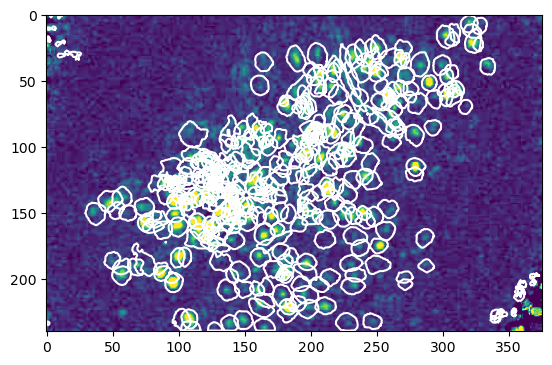

In [ ]:
plot_contours(Pre_Position,(GrayPrnPre), thr=.9, display_numbers=False)
#plot_contours(Pos_Position,(GrayPrnPos), thr=.9, display_numbers=False,colors='green')
#nb_plot_contour(Pre_Position,GrayPrnPre,np.shape(GrayPrnPre)[0] , 376, thr=.9)

In [15]:
lenght=np.array([])
lenght1=np.array([])

for i in range(len(Pre_Trace)):
    lenght=np.append(lenght,len(Pre_CellsCoordinates[i]))
idealpre=(lenght.std()+lenght.mean())
for j in range(len(Pos_Trace)):
    lenght1=np.append(lenght1,len(Pos_CellsCoordinates[j]))
idealpos=(lenght1.std()+lenght1.mean())
for i in matches:
    if len(Pre_CellsCoordinates[i[0]])>ideal and len(Pre_CellsCoordinates[i[0]])<ideal+lenght.std():
        print(f'Neuron {i},{len(Pre_CellsCoordinates[i[0]])} has more than the ideal number of pixels')
        for k in range(len(globals()[f'idx{i[0]}_coord'])):
            xa=globals()[f'idx{i[0]}_coord'][k][0]
            ya=globals()[f'idx{i[0]}_coord'][k][1]
            plt.scatter(xa,ya,s=0.75,c='black')

    elif len(Pre_CellsCoordinates[i[0]])<ideal and len(Pre_CellsCoordinates[i[0]])>ideal-lenght.mean():
        for k in range(len(globals()[f'idx{i[0]}_coord'])):
            xa=globals()[f'idx{i[0]}_coord'][k][0]
            ya=globals()[f'idx{i[0]}_coord'][k][1]
            plt.scatter(xa,ya,s=0.75,c='blue')
        print(f'Neuron {i},{len(Pre_CellsCoordinates[i[0]])} has less than the ideal number of pixels')
plt.imshow(PnrPre)


def calculate_polygon_area(x_coords, y_coords):
    n = len(x_coords)
    area = 0.0
    for i in range(n):
        j = (i + 1) % n
        area += x_coords[i] * y_coords[j]
        area -= x_coords[j] * y_coords[i]
    area = abs(area) / 2.0
    return area

NameError: name 'matches' is not defined

In [ ]:
Pre_Trace=Pre_Trace/Pre_Trace.max(axis=1)[:,None]
Pos_Trace=Pos_Trace/Pos_Trace.max(axis=1)[:,None]

Pre_Trace = Pre_Trace[~np.isnan(Pre_Trace).any(axis=1)]
Pos_Trace = Pos_Trace[~np.isnan(Pos_Trace).any(axis=1)]

# checking overlap and clusterization

### Running the overlaps

181
142
277
[  7  11  13  19  20  21  24  31  34  35  39  41  42  45  51  54  59  61
  68  71  73  76  90  91  92  94  95  97  99 103 104 107 108 108 110 111
 111 112 113 117 117 118 120 121 121 122 122 122 123 123 124 124 126 127
 128 129 129 131 131 132 133 134 134 134 136 138 139 139 141 141 141 141
 144 145 145 146 148 149 150 151 153 154 155 156 159 159 159 161 165 170
 173 174 181 185 186 187 192 204 205 211 216 217 220 226 227 228 234 234
 239 246 251 259 259 264 268 269 270 271 272 273 274 276 277 277 278 279
 281 282 286 287 289 290 292 296 297 298 299 301 302 308 311 311 312 314
 315 318 319 320 322 326 327 328 332 333 334 334 335 338 342 342 343 344
 345 346 347 348 349 349 352 353 355 357 358 360 365 366 366 373 377 379
 384 385 390 394 395 399 403 411 413 415 415 416 419 420 427 428 429 437
 442 442 444 445 450 457 470 478 479 483 492 493 493  45  45  45  51  73
  90  90  92  92  92 103 103 111 111 111 111 120 120 120 126 155 155 159
 159 159 159 159 159 159 159 159 161 21

IndexError: index 470 is out of bounds for axis 0 with size 422

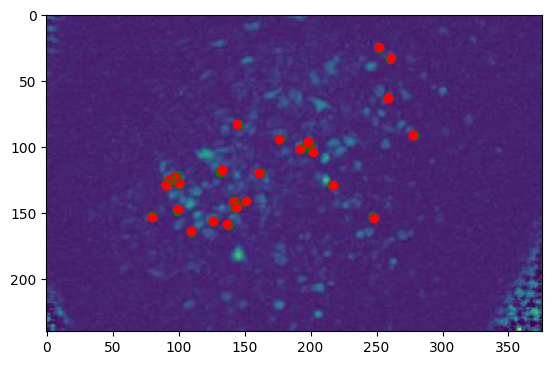

In [18]:
abvstd=np.array([])
posabvstd=np.array([])
abvmean=np.array([])
posabvmean=np.array([])
ind=np.array([])

Pre_Idx=np.array([])
Pos_pIdx=np.array([])
Possible_Matches=np.array([])
PossiblePre_idx=np.array([])
PossiblePos_idx=np.array([])
NewaPossible_Matches=np.array([])
PreClusterMax=np.array([])
PreClusterSum=np.array([])
PreClusterMean=np.array([])
PreClusterStd=np.array([])
PreClusterVelocity=np.array([])

PosClusterMax=np.array([])
PosClustersSum=np.array([])
PosClusterMean=np.array([])
PosClusterStd=np.array([])
PosClusterVelocity=np.array([])

AllMean=np.array([])
Postimes=np.arange(0,len(Pos_Trace[0][168::10]),1)
Pretimes=np.arange(0,len(Pre_Trace[0][963::10]),1)


for i in range(len(Pre_CenterOfMass)):
  for j in range(len(Pos_CenterOfMass)):
    if abs(Pre_CenterOfMass[i][0]-Pos_CenterOfMass[j][0])<=2 and abs(Pre_CenterOfMass[i][1]-Pos_CenterOfMass[j][1])<=5:
      #plt.scatter(Pre_CenterOfMass[i][1],Pre_CenterOfMass[i][0],c='g')
      #plt.scatter(Pos_CenterOfMass[j][1],Pos_CenterOfMass[j][0],c='r')
      Pre_Idx=np.append(Pre_Idx,i)
      Pos_pIdx=np.append(Pos_pIdx,j)
      Possible_Matches=np.stack((Pre_Idx,Pos_pIdx),axis=1)
#plt.imshow(PnrPos)

Pre_Idx=Pre_Idx.astype(int)
Pos_pIdx=Pos_pIdx.astype(int)

for i in Possible_Matches:
  PossiblePre_idx=np.append(PossiblePre_idx,i[0])
  PossiblePos_idx=np.append(PossiblePos_idx,i[1])
print(len(np.unique(PossiblePre_idx)))
print(len(np.unique(PossiblePos_idx)))
for i in (((PossiblePre_idx))):
  i=int(i)
  for j in (((PossiblePos_idx))):
    j=int(j)
    if abs(Pre_CenterOfMass[i][0]-Pos_CenterOfMass[j][0])<=1.5 and abs(Pre_CenterOfMass[i][1]-Pos_CenterOfMass[j][1])<=1.5 :
      if abs(Pre_CenterOfMass[i][0]-Pos_CenterOfMass[j][0])<=1 and abs(Pre_CenterOfMass[i][1]-Pos_CenterOfMass[j][1])<=1.25 :
        if (Pre_CenterOfMass[i][1]<=325  and Pre_CenterOfMass[i][1]>=25):
          #print(f"Pre x {Pre_CenterOfMass[i][0]} Pos x {Pos_CenterOfMass[j][0]}")
          plt.scatter(Pre_CenterOfMass[i][1],Pre_CenterOfMass[i][0],c='g')
          plt.scatter(Pos_CenterOfMass[j][1],Pos_CenterOfMass[j][0],c='r')
          #print(f"idx pre: {i}, possible matches: {j}\n")
          Pre_Idx=np.append(Pre_Idx,int(i))
          Pos_pIdx=np.append(Pos_pIdx,int(j))
          NewaPossible_Matches=np.vstack((Pre_Idx,Pos_pIdx))
print(len(NewaPossible_Matches[0]))
plt.imshow(PnrPos)
NewaPossible_Matches=NewaPossible_Matches.astype(int)

matches = [(NewaPossible_Matches[0][i], NewaPossible_Matches[1][i]) for i in range(len(NewaPossible_Matches[0]))]
match_counts = Counter(matches)
repeated_values = [value for value, count in match_counts.items() if count > 1]#values that are  repeated
repeated_positions = [position for position, match in enumerate(matches) if match in repeated_values]

not_repeated_values = [value for value, count in match_counts.items() if count == 1]#values that are not repeated
not_repeated_positions = [position for position, match in enumerate(matches) if match in not_repeated_values]

matches_array = np.array([np.array(t) for t in matches])
indices_0 = np.array([])
indices_1 = np.array([])
for i in range(len(matches_array)):
    indices_0=np.append(indices_0,matches_array[i][0])
    indices_1=np.append(indices_1,matches_array[i][1])
indices_0=indices_0.astype(int)
indices_1=indices_1.astype(int)

PosI=[]

print(indices_0)
for l,i in enumerate(indices_0):
    prestd=1*(Pre_Trace[indices_0[i]]).std()
    premean = 1*(Pre_Trace[indices_0[i]]).mean()

    posmean=1*(Pos_Trace[indices_1[l]]).mean()
    posstd=1*(Pos_Trace[indices_1[l]]).std()

    abvmean=np.append(abvmean,len(np.where(Pre_Trace[i]>premean)[0])/len(Pre_Trace[i]))
    posabvmean=np.append(posabvmean,len(np.where(Pos_Trace[indices_1[l]]>posmean)[0])/len(Pos_Trace[indices_1[l]]))

    abvstd=np.append(abvstd,len(np.where(Pre_Trace[i]>prestd)[0])/len(Pre_Trace[i]))
    posabvstd=np.append(posabvstd,len(np.where(Pos_Trace[l]>posstd)[0])/len(Pos_Trace[l]))


Amean=np.vstack((abvmean,posabvmean)).T
Astd=np.vstack((abvstd,posabvstd,indices_0,indices_1)).T

def clean_data(Astd_df,Amean_df):
    Astd_df=pd.DataFrame(Astd_df)
    # Drop duplicate rows across all columns
    Astd_df = Astd_df.drop_duplicates()
    # Round columns 0, 1 (Number of decimals: 3)
    Astd_df = Astd_df.round({0: 3, 1: 3})
    # Filter rows based on column: 0
    Astd_df = Astd_df[(Astd_df[0] >= 0) & (Astd_df[0] < 1)]
    Astd_df = Astd_df[(Astd_df[1] >= 0) & (Astd_df[1] < 1)]

    Amean_df=pd.DataFrame(Amean_df)
    # Drop duplicate rows across all columns
    Amean_df = Amean_df.drop_duplicates()
    # Round columns 0, 1 (Number of decimals: 3)
    Amean_df = Amean_df.round({0: 3, 1: 3})
    # Filter rows based on column: 0
    Amean_df = Amean_df[(Amean_df[0] >= 0) & (Amean_df[0] < 1)]
    Amean_df = Amean_df[(Amean_df[1] >= 0) & (Amean_df[1] < 1)]
    return Amean_df,Astd_df

Amean_df_clean,Astd_df_clean = clean_data(Astd,Amean)

Astd_df_clean2=pd.read_excel("Astd_df_clean.xlsx")
#Astd_df_clean.to_excel("Astd_df_clean.xlsx")
#plt.savefig(f"C:/Users/gabri/Desktop/Prog/LAbp/NeuroProg/Pesquisa/PrePosMatch.svg",format='svg')

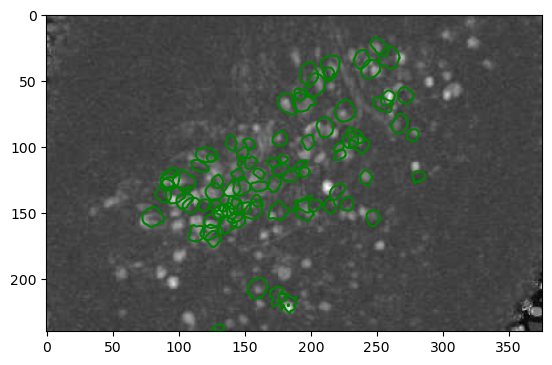

In [ ]:
cle=Astd_df_clean.drop_duplicates(3)
cle=cle.loc[cle.groupby(0)[1].idxmax()]
allofthem=pd.merge(Astd_df_clean,cle,how='inner')

#cle=cle.drop_duplicates(0)
for i in allofthem.iloc[:,3]:
    plotcounto(int(i),1,GrayPrnPre,0)

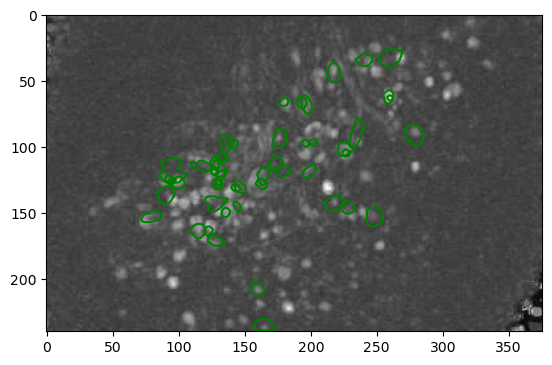

In [ ]:
dup=Astd_df_clean[Astd_df_clean.duplicated(0,keep=False)]
#print(len(dup))
new=dup.loc[dup.groupby(0)[1].idxmax()]
#print((new))
for i in new.iloc[:,2]:
    plotcounto(int(i),0,GrayPrnPre,0)
#traces(0,int(new.iloc[0,2]),0)

In [ ]:

for i in range(1, len(Astd_df_clean)-1):
    current_number = Astd_df_clean.iloc[i, 0]
    next_number = Astd_df_clean.iloc[i+1, 0]
    while current_number == next_number:
        if Astd_df_clean.iloc[current_number, 1] > Astd_df_clean.iloc[next_number+1, 1]:
            print(f"The next number {i+1} is equal to the current number {i} and the std of the current number is higher than the next number")
        else:
            print(f"The next number {i+1} is not equal to the current number {i}")
            break


ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [ ]:
len(Astd_df_clean[1])-1

215

In [ ]:
for i in range(len(Astd_df_clean2)-1):
    if Astd_df_clean2.iloc[i,0]==Astd_df_clean2.iloc[i+1,0]:
        if Astd_df_clean2.iloc[i,1]>Astd_df_clean2.iloc[i,1]:
            mer=Astd_df_clean2.drop(i+1,inplace=True)
        else:
            mer=Astd_df_clean2.drop(i,inplace=True)
display(mer)

0      1
0    0.135  0.198
1    0.112  0.288
2    0.102  0.315
3    0.177  0.326
4    0.236  0.428
..     ...    ...
240  0.354  0.095
241  0.354  0.187
242  0.354  0.187
243  0.053  0.102
244  0.356  0.081

[245 rows x 2 columns]

In [ ]:
# Assuming you have a pandas DataFrame called df
for i in range(len(mer)-1):
    if mer.iloc[i, 0] == mer.iloc[i+1, 0] and (mer.iloc[i, 1] < mer.iloc[i+1, 1] ):
        mer.drop(mer.index[i], inplace=True)
    elif mer.iloc[i, 0] == mer.iloc[i+1, 0] and (mer.iloc[i, 1] > mer.iloc[i+1, 1] ):
        mer.drop(mer.index[i+1], inplace=True)

    print(f"Row {i} and Row {i+1} have the same values in column {0} and column {1}")

Row 0 and Row 1 have the same values in column 0 and column 1
Row 1 and Row 2 have the same values in column 0 and column 1
Row 2 and Row 3 have the same values in column 0 and column 1
Row 3 and Row 4 have the same values in column 0 and column 1
Row 4 and Row 5 have the same values in column 0 and column 1
Row 5 and Row 6 have the same values in column 0 and column 1
Row 6 and Row 7 have the same values in column 0 and column 1
Row 7 and Row 8 have the same values in column 0 and column 1
Row 8 and Row 9 have the same values in column 0 and column 1
Row 9 and Row 10 have the same values in column 0 and column 1
Row 10 and Row 11 have the same values in column 0 and column 1
Row 11 and Row 12 have the same values in column 0 and column 1
Row 12 and Row 13 have the same values in column 0 and column 1
Row 13 and Row 14 have the same values in column 0 and column 1
Row 14 and Row 15 have the same values in column 0 and column 1
Row 15 and Row 16 have the same values in column 0 and colu

IndexError: index 433 is out of bounds for axis 0 with size 433

In [ ]:
display(mer)

0      1
0    0.135  0.198
1    0.109  0.229
2    0.109  0.229
3    0.112  0.288
4    0.112  0.288
..     ...    ...
530  0.125  0.334
531  0.150  0.142
532  0.356  0.307
533  0.356  0.307
535  0.356  0.081

[433 rows x 2 columns]

In [ ]:
def plot_data(Astd_df_clean,Amean_df_clean):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    # Plot data
    ax.hist(Astd_df_clean[1],  label='Std')
    ax.hist(Amean_df_clean[1], label='Mean')
    # Add labels
    #ax.set_xlabel('Pre')
    #ax.set_ylabel('Pos')
    # Add legend
    ax.legend()
    # Show plot
    plt.show()
    return fig,ax
plot_data(Astd_df_clean,Amean_df_clean)

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [ ]:

for i in range(len(Astd_df_clean2)-1):
    if Astd_df_clean2.iloc[i,0]==Astd_df_clean2.iloc[i+1,0]:
        if Astd_df_clean2.iloc[i,1]>Astd_df_clean2.iloc[i,1]:
            mer=Astd_df_clean2.drop(i+1,inplace=True)
            mer.join(Astd_df_clean2.iloc[i,1])

        else:
            mer=Astd_df_clean2.drop(i,inplace=True)

TypeError: object of type 'int' has no len()

In [ ]:
allofthem

0      1      2      3
0   0.135  0.198   10.0    3.0
1   0.112  0.288   16.0   18.0
2   0.102  0.315   17.0   13.0
3   0.177  0.326   18.0   17.0
4   0.236  0.428   22.0   12.0
..    ...    ...    ...    ...
82  0.133  0.153  369.0  340.0
83  0.120  0.256  376.0  348.0
84  0.356  0.124  417.0   70.0
85  0.074  0.000  419.0  232.0
86  0.150  0.142  416.0   26.0

[87 rows x 4 columns]

In [ ]:
cle

0      1      2      3
40   0.030  0.079  107.0   46.0
111  0.047  0.161  251.0  193.0
108  0.049  0.200  247.0  192.0
139  0.053  0.176  305.0  249.0
98   0.067  0.687  215.0  151.0
..     ...    ...    ...    ...
11   0.342  0.296   35.0   11.0
169  0.356  0.124  417.0   70.0
71   0.364  0.276  154.0   93.0
73   0.408  0.340  155.0   84.0
55   0.422  0.095  122.0   98.0

[87 rows x 4 columns]

In [ ]:
cle.loc[:,2]

40     107.0
111    251.0
108    247.0
139    305.0
98     215.0
       ...  
11      35.0
169    417.0
71     154.0
73     155.0
55     122.0
Name: 2, Length: 87, dtype: float64

In [ ]:
good=[int(index) for index in cle.iloc[:,2]]
good1=[int(index) for index in cle.iloc[:,3]]

good=np.array(good)

good1=np.array(good1)
type(good)
print(len(good))
type(good[0])
timepre=[]
timepos=[]
for i in range(len(good)):
    timepre.append(Pre_Trace[good[i]])
    timepos.append(Pos_Trace[good1[i]])
np.std(timepre)
# Generate sample time series data
pretime_series =timepre  # 100 time series with 10 data points each
postime_series =timepos



# Reshape the time series data to fit the input format of KMeans


# Define the number of clusters
n_clusters = 3

# Initialize and fit the KMeans model
prekmeans = KMeans(n_clusters=n_clusters)
prekmeans.fit(pretime_series)
#
poskmeans = KMeans(n_clusters=n_clusters)
poskmeans.fit(postime_series)
# Get the cluster labels for each time series
precluster_labels = prekmeans.labels_
poscluster_labels = poskmeans.labels_

# Print the cluster labels for each time series
for i, label in enumerate(precluster_labels):
    print(f"Time series {i+1}: Cluster {label+1}")
#plt.scatter(np.arange(0,len(cluster_labels)),cluster_labels)
plt.show()

87
Time series 1: Cluster 3
Time series 2: Cluster 3
Time series 3: Cluster 3
Time series 4: Cluster 3
Time series 5: Cluster 3
Time series 6: Cluster 3
Time series 7: Cluster 3
Time series 8: Cluster 1
Time series 9: Cluster 3
Time series 10: Cluster 1
Time series 11: Cluster 3
Time series 12: Cluster 3
Time series 13: Cluster 3
Time series 14: Cluster 3
Time series 15: Cluster 3
Time series 16: Cluster 3
Time series 17: Cluster 3
Time series 18: Cluster 3
Time series 19: Cluster 3
Time series 20: Cluster 3
Time series 21: Cluster 3
Time series 22: Cluster 3
Time series 23: Cluster 3
Time series 24: Cluster 3
Time series 25: Cluster 3
Time series 26: Cluster 3
Time series 27: Cluster 3
Time series 28: Cluster 3
Time series 29: Cluster 3
Time series 30: Cluster 3
Time series 31: Cluster 3
Time series 32: Cluster 3
Time series 33: Cluster 3
Time series 34: Cluster 2
Time series 35: Cluster 3
Time series 36: Cluster 3
Time series 37: Cluster 3
Time series 38: Cluster 3
Time series 39: Cl

c:\Users\IC\anaconda3\envs\caiman\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\IC\anaconda3\envs\caiman\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
poscluster_labels
#plotcounto(matches[18],3,GrayPrnPre,0)

array([1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 2, 1,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 2])

In [ ]:
print(Ttick)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5]


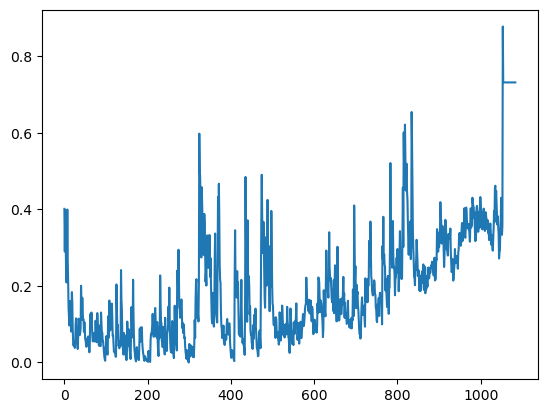

In [ ]:

plt.plot(poskmeans.cluster_centers_[2][164::10]-poskmeans.cluster_centers_[2][164::10].min())

In [ ]:
fig=plt.figure(figsize=(25,22))
gs=gridspec.GridSpec(2, 4)
ax0=plt.subplot(gs[0,0:2])
ax1=plt.subplot(gs[0,2:4])
ax2=plt.subplot(gs[1,0:1])
ax3=plt.subplot(gs[1,1:2])
ax4=plt.subplot(gs[1,2:3])
ax0.plot(Pre_x,Pre_Trace[matches[18][0]][963::],c='g')
ax1.plot(Pos_x,Pos_Trace[matches[18][1]][164::],c='r')
plotcounto(matches[18],3,GrayPrnPre,ax2)
plotcounto(matches[19],3,GrayPrnPos,ax3)
plotcounto(matches[20],3,GrayPrnPos,ax4)


In [ ]:
poskmeans.inertia_

18005.763393232803

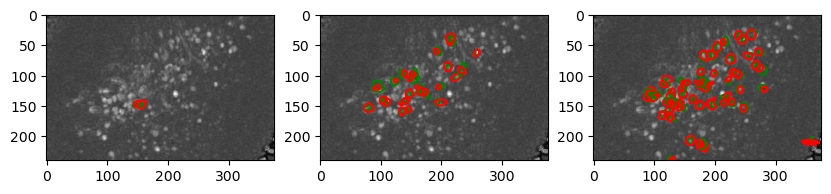

In [ ]:
%matplotlib inline

fig=plt.figure(figsize=(10,10))
gs=gridspec.GridSpec(3,3)
Cluster0n=good[np.where(precluster_labels==0)]## Neurons in the cluster 0
Cluster1n=good[np.where(precluster_labels==1)]## Neurons in the cluster 1
Cluster2n=good[np.where(precluster_labels==2)]## Neurons in the cluster 2
Cluster0b=good1[np.where(poscluster_labels==0)]
Cluster1b=good1[np.where(poscluster_labels==1)]
Cluster2b=good1[np.where(poscluster_labels==2)]

ClusterMatch0=[]
ClusterMatch1=[]
ClusterMatch2=[]

ClusterMatch0b=[]
ClusterMatch1b=[]
ClusterMatch2b=[]

for i in range(len(Cluster0n)):
    ClusterMatch0.append(np.where(Cluster0n[i] == matches)[0][0])#Match position
for i in range(len(Cluster1n)):
    ClusterMatch1.append(np.where(Cluster1n[i] == matches)[0][0])
for i in range(len(Cluster2n)):
    ClusterMatch2.append(np.where(Cluster2n[i] == matches)[0][0])

for i in range(len(Cluster0b)):
    ClusterMatch0b.append(np.where(Cluster0b[i] == matches)[0][0])#Match position
for i in range(len(Cluster1b)):
    ClusterMatch1b.append(np.where(Cluster1b[i] == matches)[0][0])
for i in range(len(Cluster2b)):
    ClusterMatch2b.append(np.where(Cluster2b[i] == matches)[0][0])



cl1=fig.add_subplot(gs[0,0])
cl2=fig.add_subplot(gs[0,1])
cl3=fig.add_subplot(gs[0,2])
for j in ClusterMatch0:
    plotcounto(matches[j],3,GrayPrnPre,cl1)
for l in ClusterMatch1:
    plotcounto(matches[l],3,GrayPrnPre,cl2)
for z in ClusterMatch2:
    plotcounto(matches[z],3,GrayPrnPre,cl3)




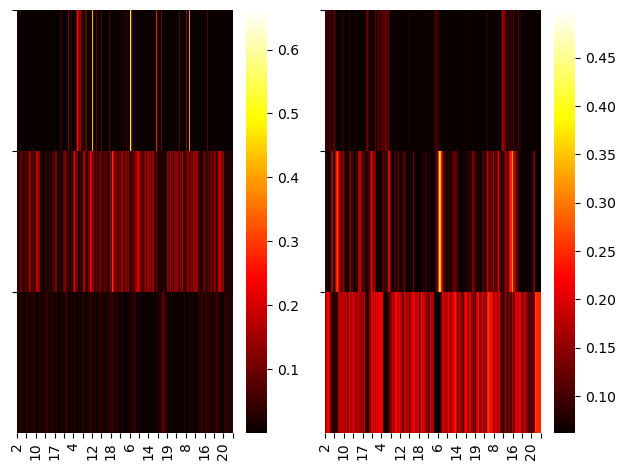

In [ ]:
fig=plt.figure()
hgs=gridspec.GridSpec(1,2)
ht12=fig.add_subplot(hgs[0,0])
htpos=fig.add_subplot(hgs[0,1])

sns.heatmap(prekmeans.cluster_centers_,vmin=prekmeans.cluster_centers_.mean(),cmap='hot',ax=ht12)
sns.heatmap(poskmeans.cluster_centers_-poskmeans.cluster_centers_.min(),vmin=(poskmeans.cluster_centers_-poskmeans.cluster_centers_.min()).std(),cmap='hot',ax=htpos)
cl1.set_title('Cluster 1')
cl2.set_title('Cluster 2')
cl3.set_title('Cluster 3')
#ht12.set_title('Pre Trauma Heatmap')
#ht12.set_xlabel('Frequency [kHz]')
#ht12.set_ylabel('Clusters')
ht12.set_yticks(np.arange(0,3,1))
#ht12.set_yticklabels(['Cluster 1','Cluster 2','Cluster 3'])
ht12.set_xticks(np.linspace(0,14000,int(14000/583)))
ht12.set_xticklabels(protocol)
#htpos.set_title('Pos Trauma Heatmap')
#htpos.set_xlabel('Frequency [kHz]')
#htpos.set_ylabel('Clusters')
htpos.set_yticks(np.arange(0,3,1))
#htpos.set_yticklabels(['Cluster 1','Cluster 2','Cluster 3'])
htpos.set_xticks(np.linspace(0,11000,int(11000/458)))
htpos.set_xticklabels(protocol)

plt.tight_layout()
plt.savefig(f'F:/IC/caimandata/clusterwse.png',format='png')
plt.show()

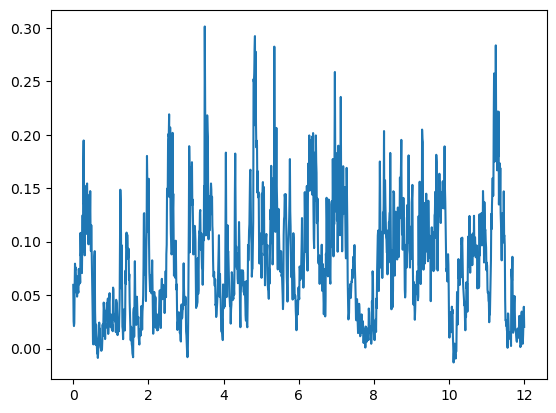

In [ ]:
plt.plot(np.linspace(0,12,len(prekmeans.cluster_centers_[1][963::10])),prekmeans.cluster_centers_[1][963::10])

In [ ]:
ad=[i.std() for i in prekmeans.cluster_centers_]
np.sum(ad)





0.19630769362670056

In [ ]:
poskmeans.cluster_centers_-poskmeans.cluster_centers_.min()

array([[0.03581073, 0.04989333, 0.0567313 , ..., 0.00238613, 0.        ,
        0.05348748],
       [0.07430358, 0.08091552, 0.09167426, ..., 0.02086222, 0.01914742,
        0.05348748],
       [0.17224066, 0.18448808, 0.19169534, ..., 0.21252641, 0.20037983,
        0.05348748]])

In [ ]:
Cluster2n

array([107, 251, 247, 305, 215,  67,  62, 419, 191,  33, 321,  30, 243,
        83,  64, 302,  17, 211, 203, 108,  16, 256, 281, 150, 132, 336,
       252, 376, 267, 129, 110, 289, 288, 242, 219, 369, 250,  10, 356,
        99, 315, 149, 142, 416, 237, 162, 159, 360, 167, 333, 238, 329,
        86, 120, 144, 175,  22, 245, 143, 128])

In [ ]:
print(f"Cluster 1: {len(Cluster1n)}\n Cluster 2: {len(Cluster2n)}\n Cluster 3: {len(Cluster3n)}")

NameError: name 'Cluster3n' is not defined

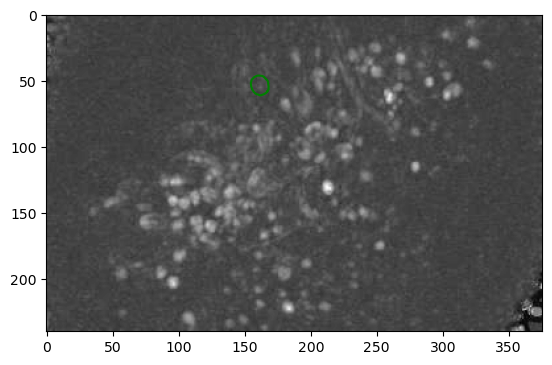

In [ ]:
plt.plot(Pre_CellsCoordinates[13].T[0],Pre_CellsCoordinates[13].T[1],c='g')
plt.imshow(GrayPrnPre,cmap='gray')

In [ ]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

# Create a time series dataset
data = Pre_Trace[matches[1][0]][963::]  # Time series data
#pd.Series([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Fit an ARIMA model
model = sm.tsa.ARIMA(data, order=(1, 0, 0))  # ARIMA(p, d, q)
results = model.fit()

# Print the model summary
print(results.summary())

c:\Users\IC\anaconda3\envs\caiman\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                13037
Model:                 ARIMA(1, 0, 0)   Log Likelihood              138687.074
Date:                qua, 19 jun 2024   AIC                        -277368.148
Time:                        11:26:02   BIC                        -277345.721
Sample:                             0   HQIC                       -277360.655
                              - 13037                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000   1.43e-14      7e+13      0.000       1.000       1.000
ar.L1       5.142e-20   6.89e-20      0.746      0.456   -8.36e-20    1.86e-19
sigma2      1.097e-11   1.69e-11      0.650      0.5

c:\Users\IC\anaconda3\envs\caiman\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\IC\anaconda3\envs\caiman\lib\site-packages\statsmodels\stats\stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
c:\Users\IC\anaconda3\envs\caiman\lib\site-packages\statsmodels\stats\stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)


In [ ]:
np.save('F:/IC/caimandata/PrePosMatch.npy',matches)
np.save('F:/IC/caimandata/PreIndx.npy',Pre_idx)
np.save('F:/IC/caimandata/PosIndx.npy',Pos_idx)
np.save('F:/IC/caimandata/PreTrace.npy',Pre_Trace)
np.save('F:/IC/caimandata/PosTrace.npy',Pos_Trace)
np.save('F:/IC/caimandata/PreCoM.npy',Pre_CenterOfMass)
np.save('F:/IC/caimandata/PosCoM.npy',Pos_CenterOfMass)
#np.save('F:/IC/caimandata/PreCoord.npy',Pre_CellsCoordinates)
#np.save('F:/IC/caimandata/PosCoord.npy',Pos_CellsCoordinates)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (422,) + inhomogeneous part.

In [ ]:
display(Astd_df_clean)

0      1
2    0.135  0.198
3    0.109  0.229
4    0.112  0.288
5    0.102  0.315
6    0.177  0.326
..     ...    ...
225  0.167  0.175
226  0.125  0.396
230  0.150  0.267
231  0.356  0.058
232  0.356  0.227

[215 rows x 2 columns]

neurons 97 has 103 coordinates and 43 coordinates
neurons 97 has 103 coordinates and 23 coordinates
neurons 102 has 141 coordinates and 55 coordinates
neurons 102 has 141 coordinates and 51 coordinates
neurons 102 has 141 coordinates and 25 coordinates
neurons 103 has 103 coordinates and 27 coordinates
neurons 154 has 95 coordinates and 41 coordinates
neurons 421 has 107 coordinates and 35 coordinates
neurons 97 has 103 coordinates and 23 coordinates
neurons 97 has 103 coordinates and 23 coordinates


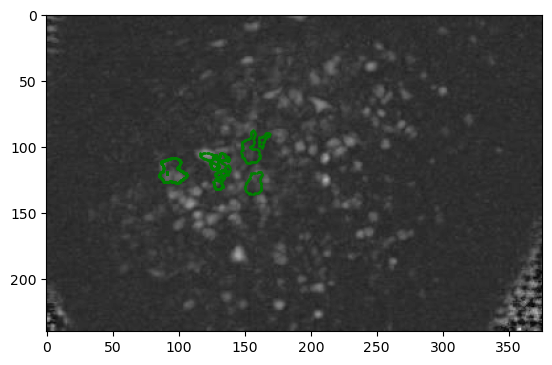

In [ ]:
for l,i in enumerate(matches):

    if len(Pre_CellsCoordinates[i[0]])>90:
        print(f'neurons {i[0]} has {len(Pre_CellsCoordinates[i[0]])} coordinates and {len(Pos_CellsCoordinates[i[1]])} coordinates')
        plotcounto(i[0],0,GrayPrnPos)

Pre85 Pos39
X diff: 0.6066134246730144  Y diff: 64.39236912142437
Pre85 Pos61
X diff: -0.9555835037326972  Y diff: 129.80358232325813
Pre85 Pos83
X diff: -0.48281788789584823  Y diff: -32.87063341981556
Pre85 Pos91
X diff: 0.1849676473509021  Y diff: -44.070282394905234
Pre85 Pos39
X diff: 0.6066134246730144  Y diff: 64.39236912142437
Pre85 Pos39
X diff: 0.6066134246730144  Y diff: 64.39236912142437
Pre85 Pos39
X diff: 0.6066134246730144  Y diff: 64.39236912142437
Pre85 Pos39
X diff: 0.6066134246730144  Y diff: 64.39236912142437
Pre85 Pos39
X diff: 0.6066134246730144  Y diff: 64.39236912142437
Pre85 Pos39
X diff: 0.6066134246730144  Y diff: 64.39236912142437
Pre85 Pos39
X diff: 0.6066134246730144  Y diff: 64.39236912142437
Pre85 Pos39
X diff: 0.6066134246730144  Y diff: 64.39236912142437


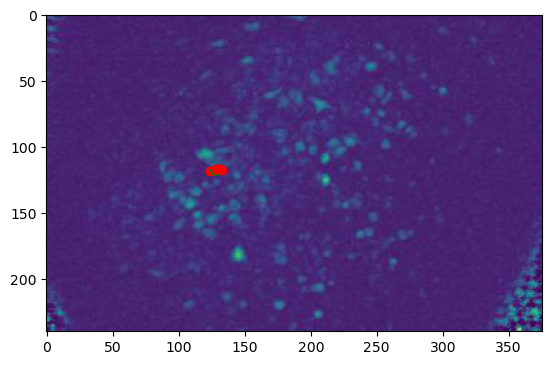

In [ ]:
for i  in np.where(indices_0==85)[0]:
    if Pre_Trace[indices_0[i]].max()/2.5<=Pos_Trace[indices_1[i]].max():
        plt.scatter(Pre_CenterOfMass[indices_0[i]][1],Pre_CenterOfMass[indices_0[i]][0],c='g')
        plt.scatter(Pos_CenterOfMass[indices_1[i]][1],Pos_CenterOfMass[indices_1[i]][0],c='r')
        print(f'Pre{indices_0[i]} Pos{indices_1[i]}')
        print(f'X diff: {Pre_CenterOfMass[indices_0[i]][0]-Pos_CenterOfMass[indices_1[i]][0]}  Y diff: {Pre_CenterOfMass[indices_1[i]][1]-Pos_CenterOfMass[indices_1[i]][1]}')
plt.imshow(PnrPos)

In [ ]:
print(f'{len(np.where(cle[0]<=cle[1])[0])} neurons with a higher activity in the Pos trauma group\n{len(np.where(cle[0]>cle[1])[0])} neurons with less activity in the Pos trauma group\nthis shows an increase of activity in {round(len(np.where(cle[0]<=cle[1])[0])/len(cle[0])*100,2)}% of the neurons')

45 neurons with a higher activity in the Pos trauma group
42 neurons with less activity in the Pos trauma group
this shows an increase of activity in 51.72% of the neurons


In [ ]:
a = np.array([i for i in Astd_df_clean2.index])
possublist_indices=np.array([])
presublist_indices=np.array([])
a = a.astype(int)
for l, i in enumerate(a):
    if len(PreClusters12) > 0 and len(PreClustersNames12) > 0:
        presublist_indices =
        #possublist_indices =np.append(possublist_indices,[index1 for index1, sublist1 in enumerate(PosClusters12) if matches[i][1] in sublist1])
        if len(presublist_indices) > 0:
            print(f'{[presublist_indices]} ')
#print(PreClustersNames12)

[[2]] 
[[8]] 
[[8]] 
[[5]] 
[[8]] 
[[8]] 
[[5]] 
[[1, 5]] 
[[3, 10]] 
[[5]] 
[[1]] 
[[1]] 
[[1]] 
[[1]] 
[[5]] 
[[5]] 
[[5]] 
[[3]] 
[[5]] 
[[1]] 
[[5]] 
[[5]] 
[[5]] 
[[5]] 
[[1]] 
[[1]] 
[[5]] 
[[3]] 
[[8]] 
[[3, 8]] 
[[3]] 
[[9]] 
[[3]] 
[[3, 11]] 
[[5]] 
[[3]] 
[[0, 8]] 
[[5]] 
[[1]] 
[[3]] 
[[3, 8]] 
[[3, 8]] 
[[5]] 
[[1]] 
[[5]] 
[[5]] 
[[3]] 
[[3]] 
[[6]] 
[[8]] 
[[1]] 
[[1]] 
[[1]] 
[[1]] 
[[3, 8]] 
[[3]] 
[[4]] 
[[7]] 
[[2]] 
[[1]] 
[[3, 7]] 
[[2]] 
[[2]] 
[[3]] 
[[5]] 
[[8]] 


In [ ]:
precl=np.array([])
poscl=np.array([])
for i in a:
    presublist_indices=[index for index, sublist in enumerate(PreClusters12) if matches[i][0] in sublist]
    possublist_indices=[index1 for index1, sublist1 in enumerate(PosClusters12) if matches[i][1] in sublist1]
    if len(presublist_indices)>0:
        #print(f'{PreClustersNames12[presublist_indices[0]]} {matches[i]}')
        precl=np.append(precl,PreClustersNames12[presublist_indices[0]])
    if len(possublist_indices)>0:
        #print(f'{PosClustersNames12[possublist_indices[0]]} {matches[i]} ')
        poscl=np.append(poscl,PosClustersNames12[possublist_indices[0]])



In [ ]:

possublist_indices = [index for index, sublist in enumerate(PosClusters12) if matches[i][1] in sublist]

[2]

int(round(1 + 3.22*np.log(len(PreX_pca))))

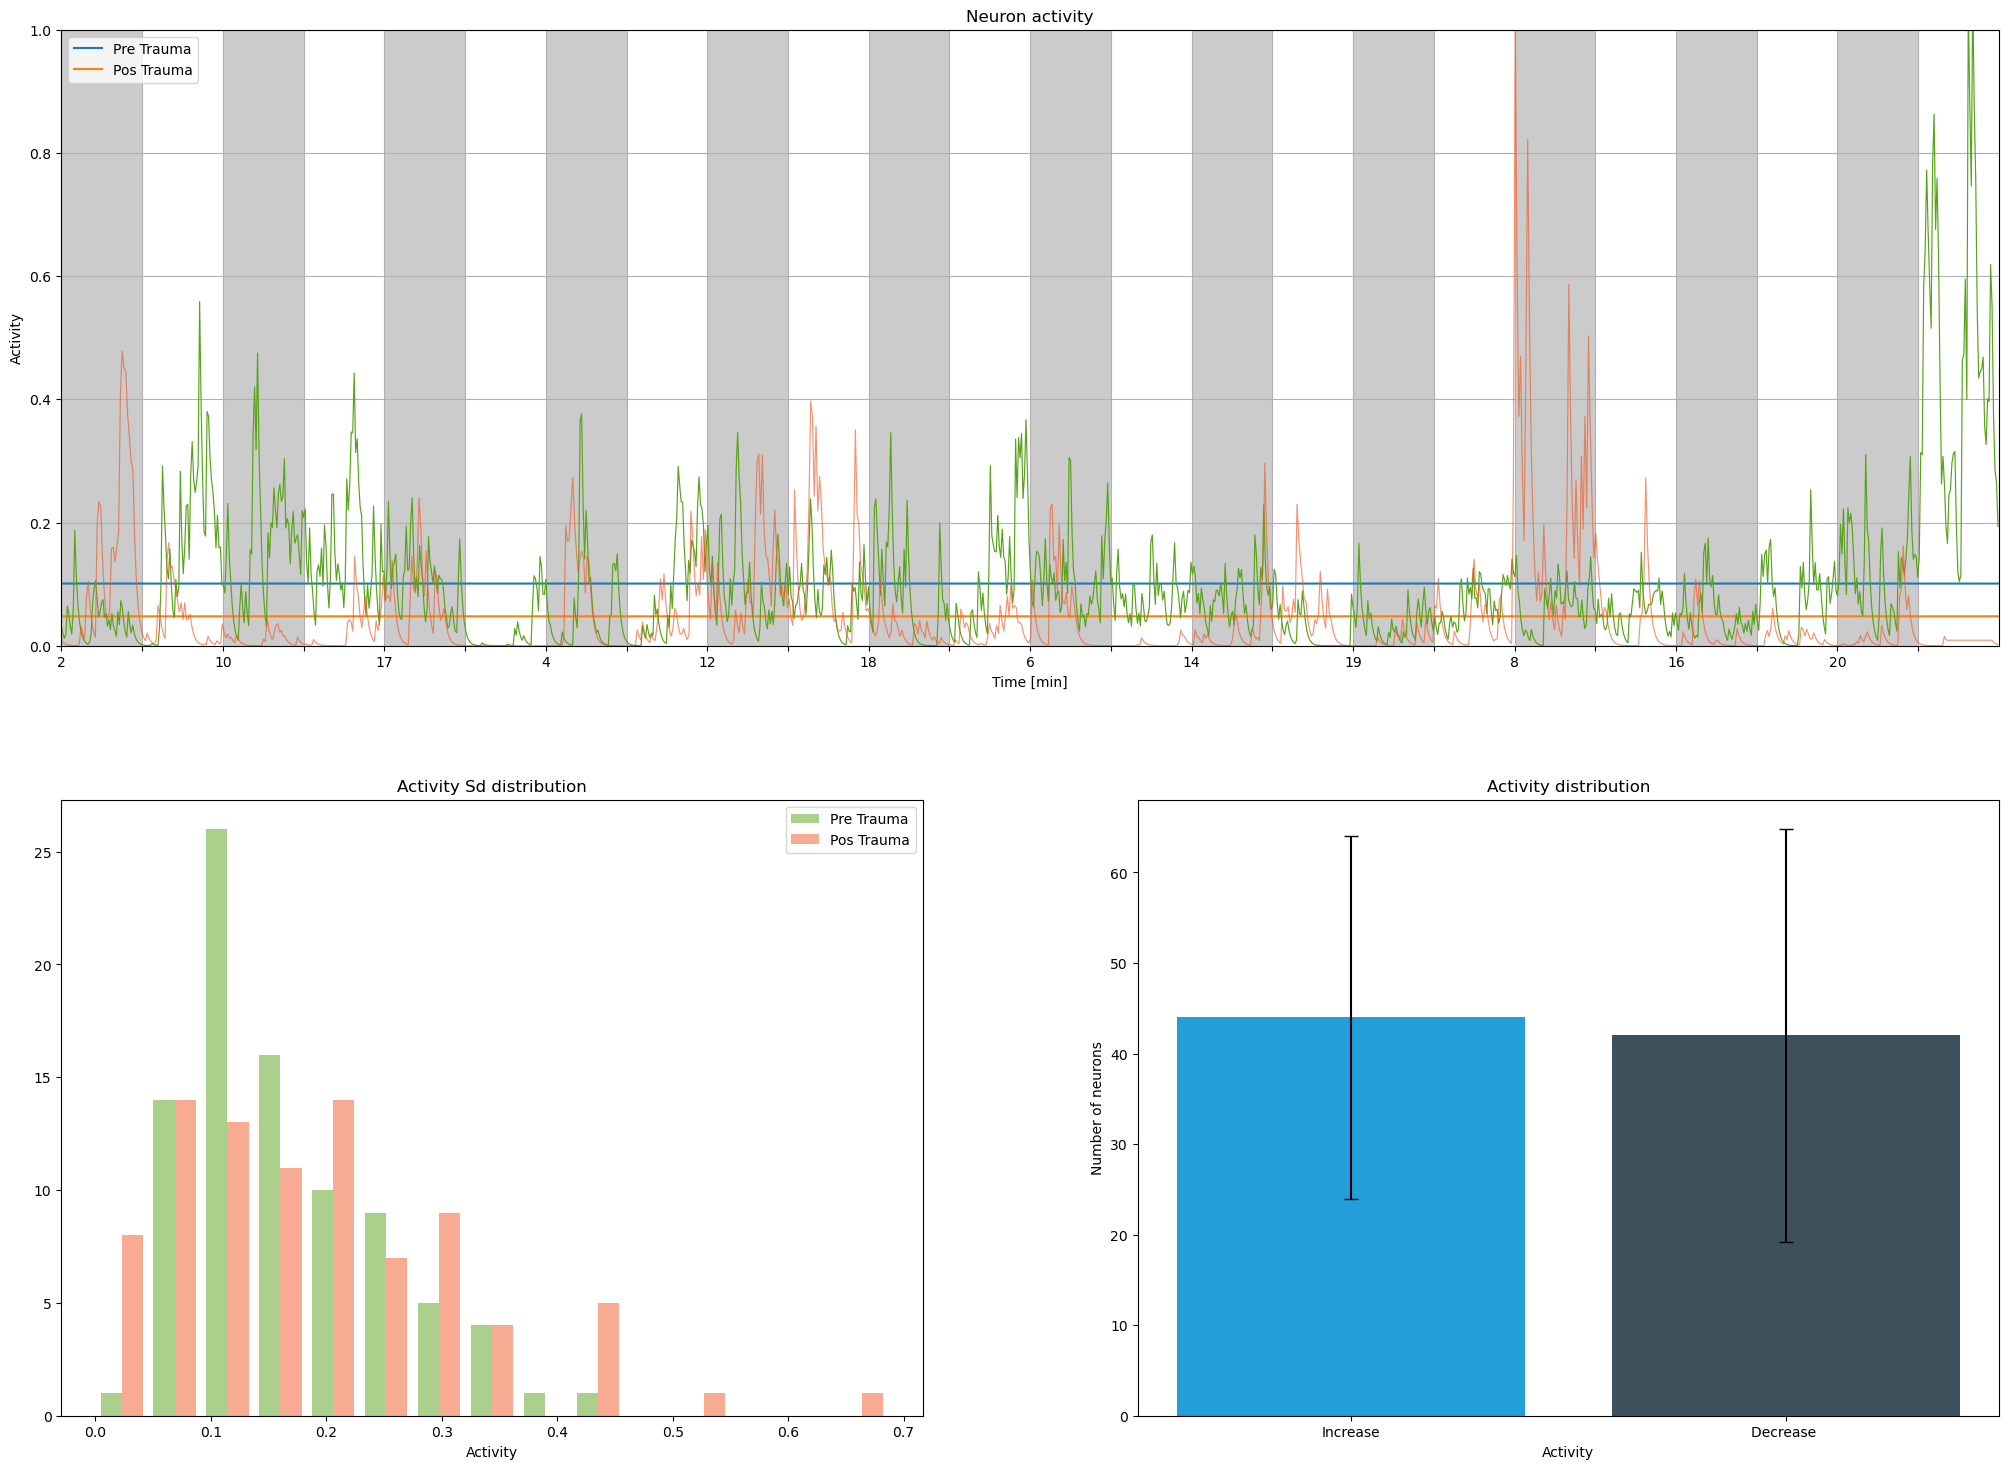

In [ ]:
fig=plt.figure(figsize=(25,18))
gs1 = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs1[1, 0])
ax2 = fig.add_subplot(gs1[1, 1])
ax3 = fig.add_subplot(gs1[0, :])

ax1.hist([(cle[0]),(cle[1])],bins=int(round(1 + 3.22*np.log(len(cle)))),alpha=0.5,label=['Pre Trauma','Pos Trauma'],color=['#58A31A','#F05926'])
ax1.set_title('Activity Sd distribution')
ax1.legend(['Pre Trauma','Pos Trauma'])
ax1.set_xlabel('Activity')#percentage of the time the neuron is above the std



#ax4.hist([np.unique(Amean_df_clean[0]),np.unique(Amean_df_clean[1])],bins=int(round(1 + 3.22*np.log(len(Amean_df_clean)))),alpha=0.5,label=['Pre Trauma','Pos Trauma'],color=['#58A31A','#F05926'])
#ax4.set_title('Activity mean distribution')
#ax4.legend(['Pre Trauma','Pos Trauma'])
#ax4.set_xlabel('Activity')#percentage of the time the neuron is above the std
ax2.set_ylabel('Number of neurons')
# Data for the bars
x = ['Increase', 'Decrease ']
y = [len(np.where(cle[0]<cle[1])[0]), len(np.where(cle[0]>cle[1])[0])]
error=[np.std(np.where(cle[0]<cle[1])[0]),np.std(np.where(cle[0]>cle[1])[0])]

# Plotting the bar plot
ax2.bar(x, y, yerr=error, capsize=5, color=['#239EDB','#3D515C'])
ax2.set_title('Activity distribution')
ax2.set_xlabel('Activity')
ax2.set_ylabel('Number of neurons')


index=10
ax3.plot(Pre_x[::10],(traces(0,indices_0[index],1)-traces(0,indices_0[index],1).min()).mean()*np.ones(len(traces(0,indices_0[index],1))))
ax3.plot(Pos_x[::10],(traces(1,indices_1[index],1)-traces(1,indices_1[index],1).min()).mean()*np.ones(len(traces(1,indices_1[index],1))))
ax3.plot(Pre_x[::10],traces(0,indices_0[index],1)-traces(0,indices_0[index],0).min(),c='#58A31A',alpha=1,lw=0.85)
ax3.plot(Pos_x[::10],traces(1,indices_1[index],1)-traces(1,indices_1[index],0).min(),c='#F05926',alpha=0.65,lw=0.85)

for i in range(0, 24, 1):
    if i % 2 == 0:
        ax3.axvspan(i*.5, i*.5+.5, facecolor='#9999', alpha=0.5)
ax3.set_xlim(0,12)
ax3.legend(['Pre Trauma','Pos Trauma'])
ax3.set_xticks(Ttick)
ax3.set_xticklabels(protocol)
ax3.set_ylim(0,1)
ax3.set_title('Neuron activity')
ax3.set_xlabel('Time [min]')
ax3.set_ylabel('Activity')
ax3.grid()
plt.subplots_adjust(wspace=0.25,hspace=0.25)
plt.savefig(f'f:/IC/caimandata/ActivityDistribution.svg',format='svg')

plt.show()


<Axes: >

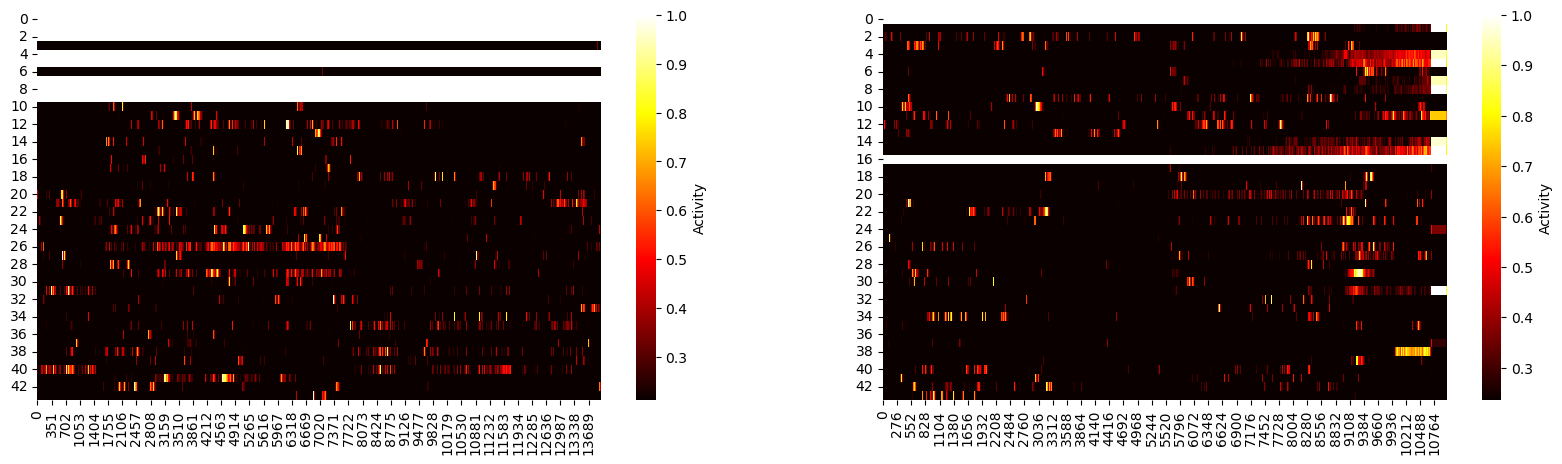

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.heatmap(Pre_Trace[np.argsort(indices_0[np.where(cle[0]<cle[1])[0]])], cmap='hot',vmin=np.abs(Pre_Trace[indices_0[np.where(cle[0]<cle[1])[0]]].std()), cbar_kws={'label': 'Activity'},ax=ax[0])
sns.heatmap(Pos_Trace[np.argsort(indices_1[np.where(cle[0]<cle[1])[0]]),:], cmap='hot',vmin=np.abs(Pos_Trace[indices_1[np.where(cle[0]<cle[1])[0]]].std()), cbar_kws={'label': 'Activity'},ax=ax[1])


In [ ]:
sns.heatmap(Pre_Trace[indices_0[np.where(Astd_df_clean[0])]], cmap='hot',vmin=np.abs(Pre_Trace[indices_0[np.where(Astd_df_clean[0])]].std()), cbar_kws={'label': 'Activity'})

<Axes: >

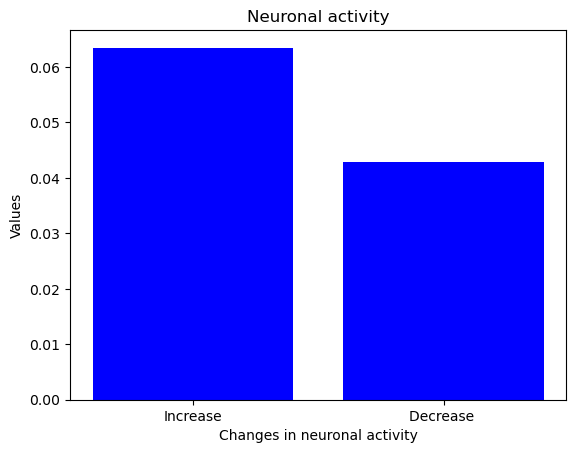

In [ ]:
x1 = ['Increase', 'Decrease ']
y1 = [(Pre_Trace[indices_0]/Pre_Trace[indices_0].max()).mean(),(Pos_Trace[indices_1]/Pos_Trace[indices_1].max()).mean()]
#error1=[np.std(Pre_Trace[indices_0]/Pre_Trace[indices_0].max()),np.std(Pos_Trace[indices_1]/Pos_Trace[indices_1].max())]

# Plotting the bar plot
plt.bar(x1, y1, capsize=5, color='blue')

# Adding labels and title
plt.xlabel('Changes in neuronal activity')
plt.ylabel('Values')
plt.title('Neuronal activity')

# Displaying the plot
plt.show()

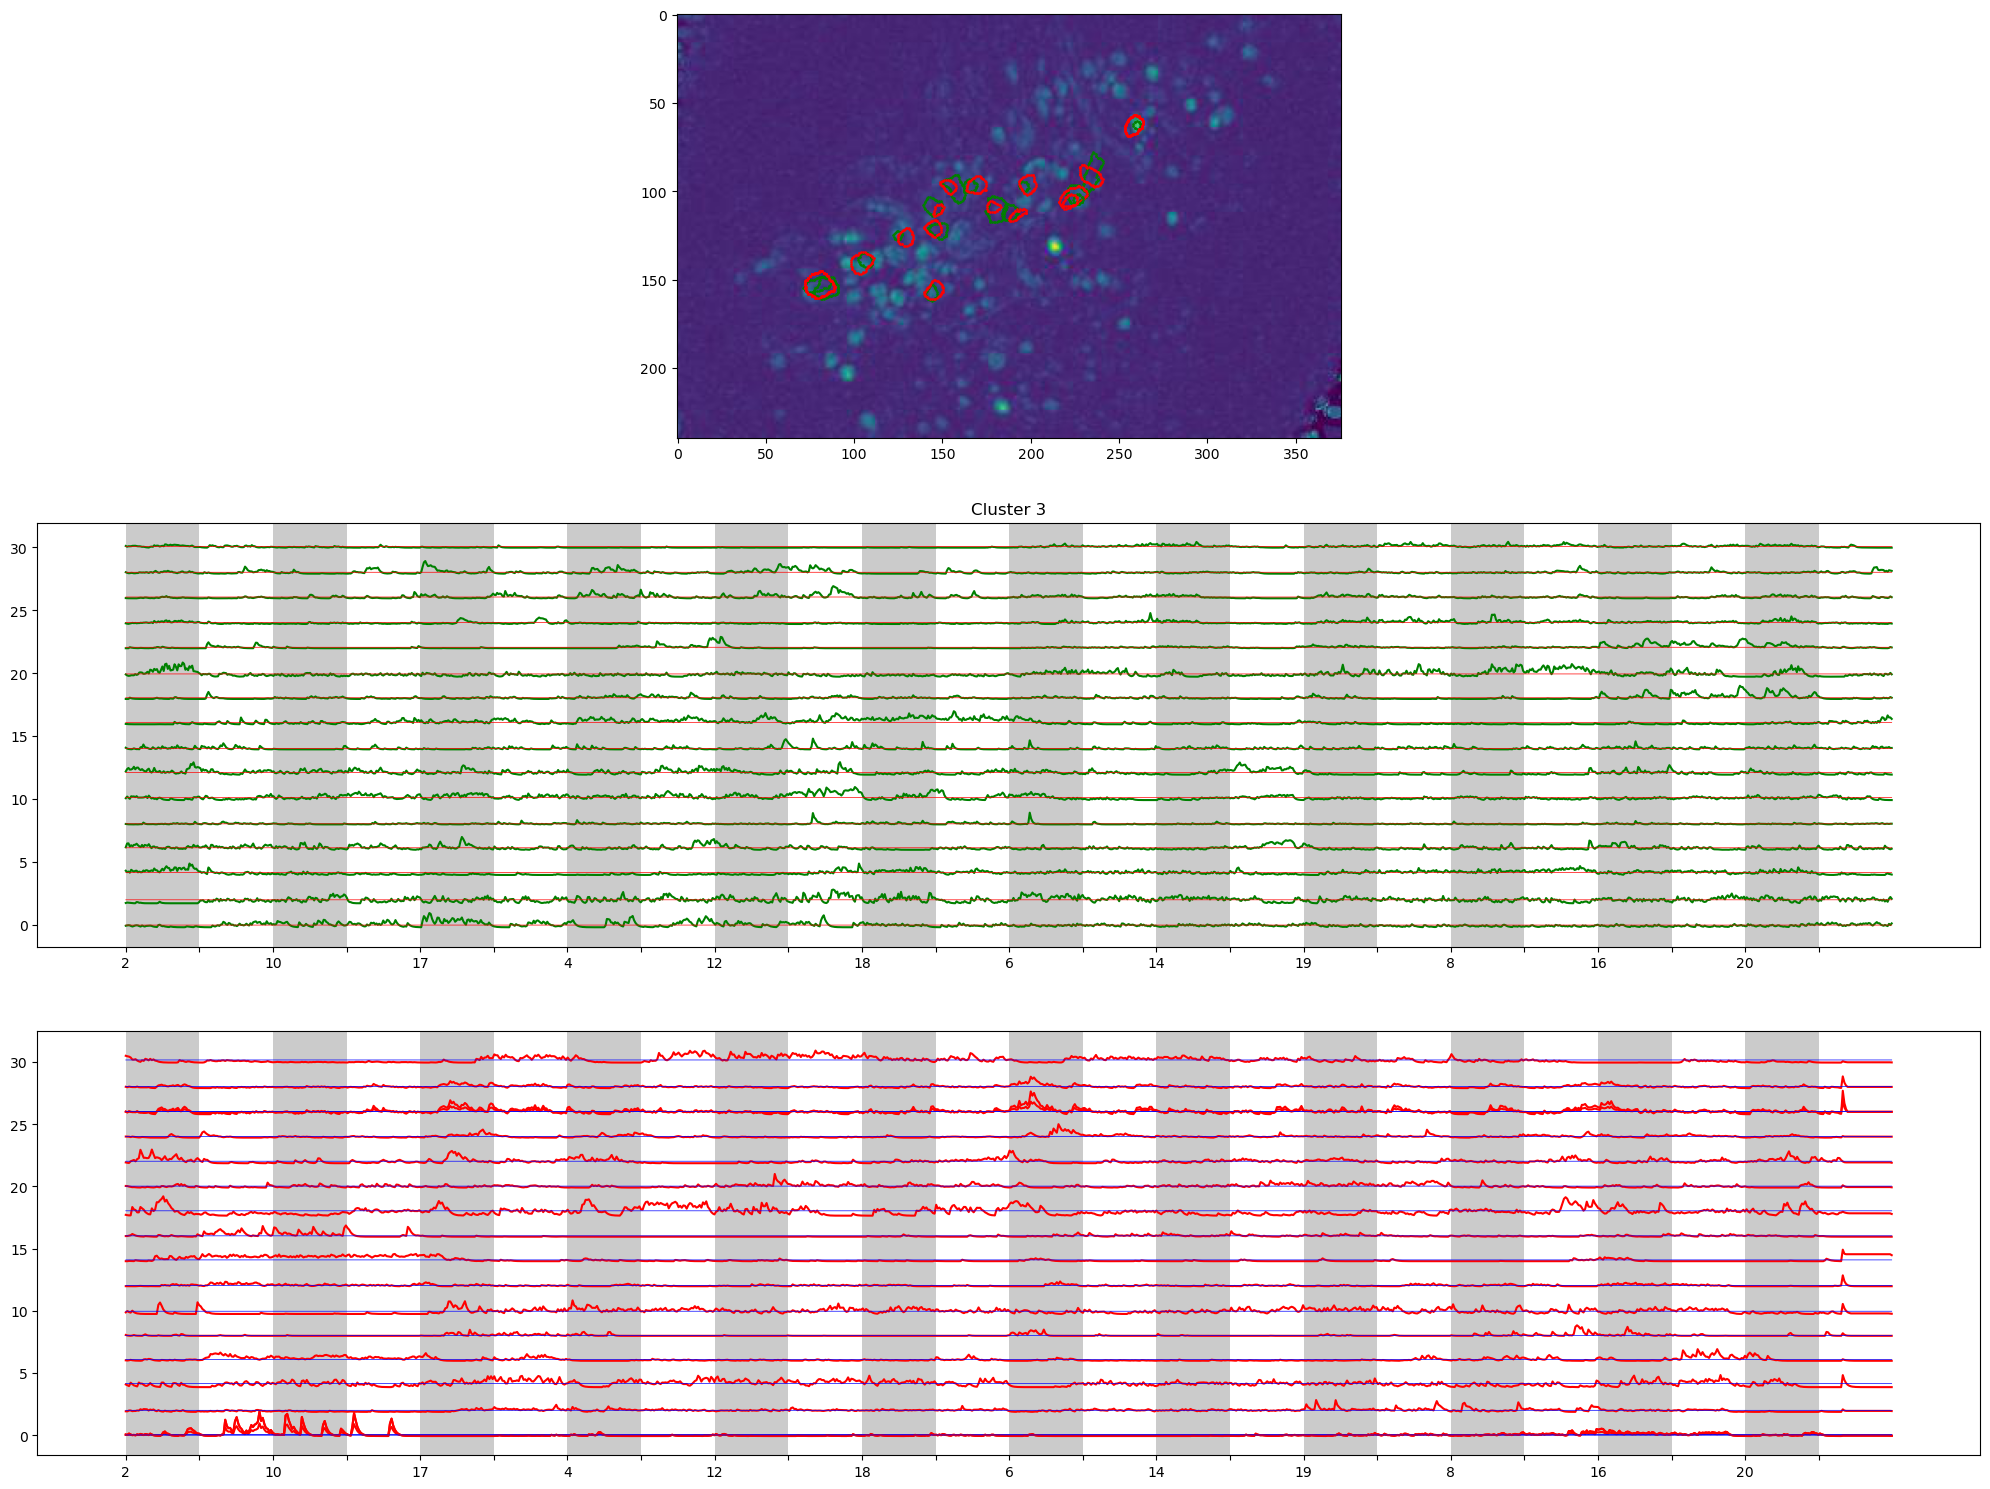

In [ ]:

%matplotlib inline
o=3
Ma=2
if len(Pre_C12[o])!=0:
    fig = plt.figure(figsize=(20,15))
    gs = gridspec.GridSpec(3, 1)
    ax1 = fig.add_subplot(gs[1, 0])
    ax2 = fig.add_subplot(gs[2, 0])
    ax3 = fig.add_subplot(gs[0, 0])
else:
    print('No Neurons in this cluster')
for l,i in enumerate(Pre_Trace[Pre_C12[o]]):
    trace=i[963::10]+(Ma*l/1.0)
    ax1.plot(Pre_x[::10],trace,c=f'g')
    ax1.plot(Pre_x[::10],(i.mean()*np.ones(len(trace))+Ma*l/1),c='r',lw=0.5)
    ax1.set_xticks(Ttick)
    ax1.set_xticklabels(protocol)
    ax1.set_title(f'Cluster {o}')
    for k in range(len(globals()[f'idx{Pre_C12[o][l]}_coord'][:,0])):
        xa = globals()[f'idx{Pre_C12[o][l]}_coord'][k,0]
        ya = globals()[f'idx{Pre_C12[o][l]}_coord'][k,1]
        ax3.scatter(x=xa, y=ya,s = 0.8, c='g')
    ax3.annotate(f'{f[0]} {f[1]}', (xa, ya),(xa+5, ya+5),color='white')
    for d, f in enumerate(matches):
        if f[0]==Pre_C12[o][l]:
            ant=d-1

            if matches[d+1][0]==f[0]:
                trace1=Pos_Trace[f[1]][164::10]+Pos_Trace[matches[d+1][1]][164::10]+(Ma*l/1.0)
                ax2.plot(Pos_x[::10],trace1,c='r')
                ax2.plot(Pos_x[::10],(Pos_Trace[f[1]].mean()*np.ones(len(trace1))+Ma*l/1),c='b',lw=0.5)
                ax2.set_xticks(Ttick)
                ax2.set_xticklabels(protocol)
            elif matches[ant][0]==f[0]:
                continue
            else:
                trace1=Pos_Trace[f[1]][164::10]+(Ma*l/1.0)
                ax2.plot(Pos_x[::10],trace1,c='r')
                ax2.plot(Pos_x[::10],(Pos_Trace[f[1]].mean()*np.ones(len(trace1))+Ma*l/1),c='b',lw=0.5)
                ax2.set_xticks(Ttick)
                ax2.set_xticklabels(protocol)


            for k in range(len(globals()[f'idx{f[1]}_coord1'][:,0])):
                xa = globals()[f'idx{f[1]}_coord1'][k,0]
                ya = globals()[f'idx{f[1]}_coord1'][k,1]
                ax3.scatter(x=xa, y=ya,s = 0.8, c='r')
            ax3.annotate(f'{f[0]} {f[1]}', (xa, ya),(xa+5, ya+5),color='white')

for i in range(0, 24, 1):
    if i % 2 == 0:
        ax1.axvspan(i*.5, i*.5+.5, facecolor='#9999', alpha=0.5)
        ax2.axvspan(i*.5, i*.5+.5, facecolor='#9999', alpha=0.5)



ax3.imshow(PnrPre)

plt.tight_layout()
plt.subplots_adjust(hspace=0.2)
plt.savefig(f"F:/IC/caimandata/ClustesteTraceroverlap.svg",format='svg')
plt.show()

([<matplotlib.patches.Wedge at 0x1eccd2d2c50>,
 [Text(-0.9177557692579248, 0.6064027935240691, 'Cluster 0'),
  Text(-1.0077192991868826, 0.441023598060578, 'Cluster 1'),
  Text(0.08021383510720621, -1.0970714382652544, 'Cluster 2'),
  Text(0.9328529528439387, 0.5829111153257799, 'Cluster 3'),
  Text(0.8795483753032047, 0.6606017374345099, 'Cluster 4'),
  Text(0.4410236688226948, 1.007719268218173, 'Cluster 5'),
  Text(-0.08021380300869282, 1.0970714406121795, 'Cluster 6'),
  Text(-0.08021380300869282, 1.0970714406121795, 'Cluster 7'),
  Text(-0.4153015840091651, 1.0185895121782271, 'Cluster 8'),
  Text(-0.7097367511889761, 0.84040094241482, 'Cluster 9'),
  Text(-0.7565567333141282, 0.7985123100347641, 'Cluster 10'),
  Text(-0.822114175317565, 0.7308408053344586, 'Cluster 11')],
 [Text(-0.5005940559588681, 0.33076516010403767, '3.6%'),
  Text(-0.5496650722837542, 0.24055832621486067, '1.8%'),
  Text(0.04375300096756702, -0.5984026026901388, '63.6%'),
  Text(0.508828883369421, 0.31795151

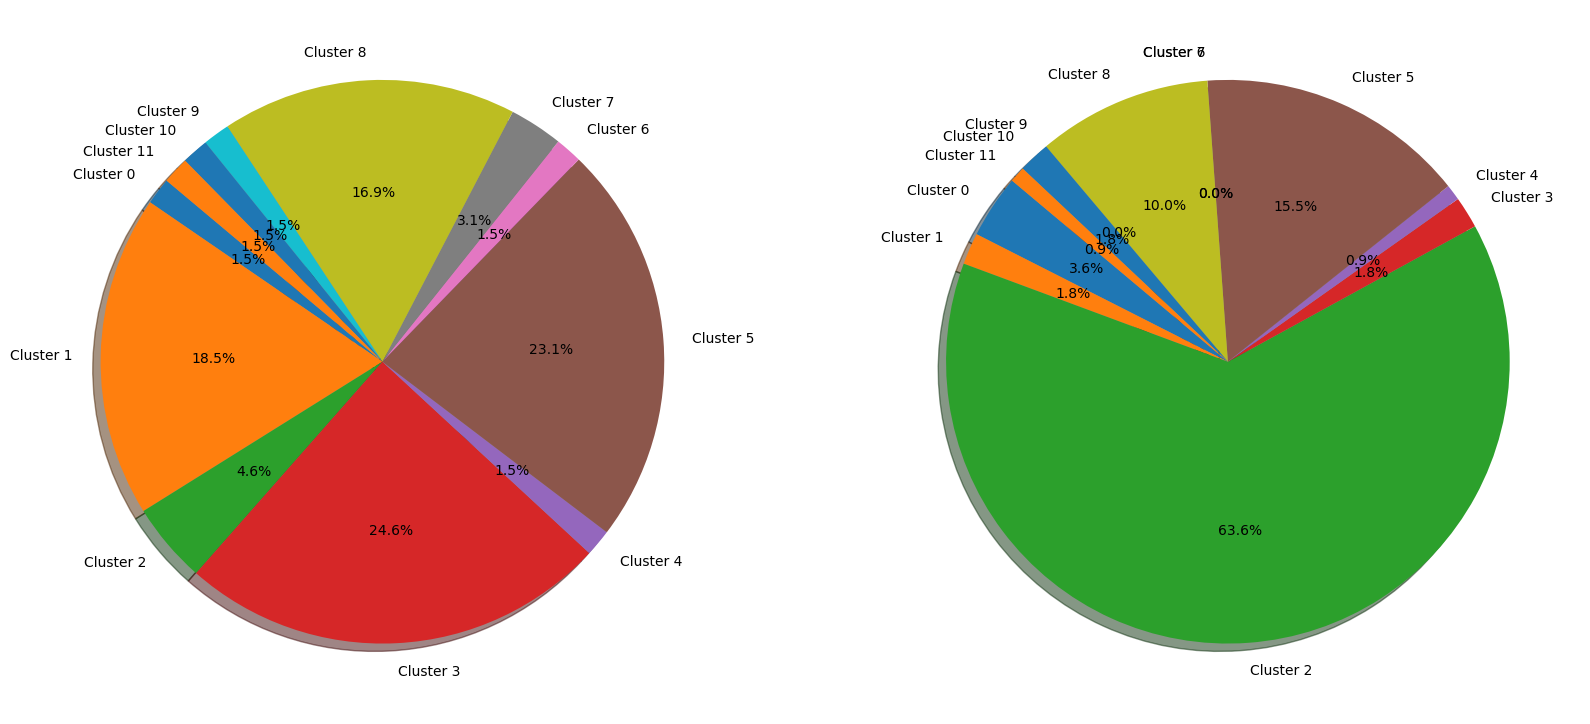

In [ ]:
fig=plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(1, 2)
pie1 = fig.add_subplot(gs[0, 0])
pie2 = fig.add_subplot(gs[0, 1])
pie1.pie([len(Pre_C12[i]) for i in range(len(Pre_C12))],labels=[f'Cluster {i}' for i in range(len(Pre_C12)) ],autopct='%1.1f%%',shadow=True, startangle=140)
pie2.pie([len(Pos_C12[i] )for i in range(len(Pos_C12))],labels=[f'Cluster {i}' for i in range(len(Pos_C12)) ],autopct='%1.1f%%',shadow=True, startangle=140)
#plt.savefig(f"F:/IC/caimandata/PieDistribution.svg",format='svg')

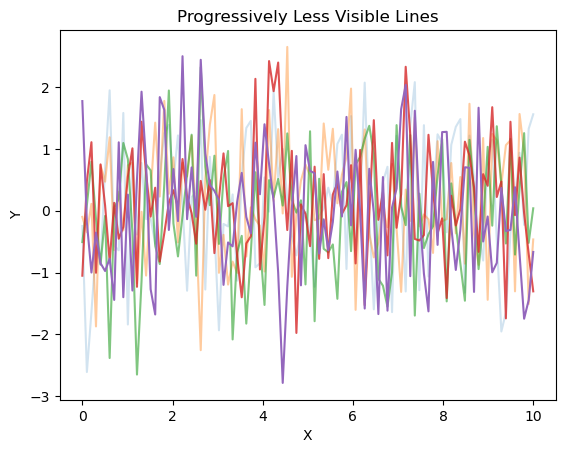

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
x = np.linspace(0, 10, 100)
y = np.random.randn(100, 5)

# Create the line plot with progressively less visible lines
for i in range(5):
    plt.plot(x, y[:, i], alpha=(i+1)/5)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Progressively Less Visible Lines')

# Display the plot
plt.show()

In [ ]:
Pre_Trace[Pre_C12[o]].std()

26.58079940310775

In [ ]:
%matplotlib inline
o=9
fig,ax=plt.subplots(1,1,figsize=(20,15))
Ma=np.amax(Pos_Trace[Pos_C[o]])
for l,i in enumerate(Pos_Trace[Pos_C[o]]):
    trace=i[164::10]+(Ma*l/1.0)
    ax.plot(trace,c='black')
    ax.plot(i.mean()*np.ones(len(trace))+Ma*l/1,c='r',lw=0.5)
    ax.set_xticks(Postimes[::55])
    ax.set_xticklabels(protocol)
    ax.set_title(f'Cluster {o}')


for i in range(25):
    if i%2==0:
        ax.axvspan(i*50,i*50+50,facecolor='#9999',alpha=0.5)

def NormPlot(cluster,Pre_Trace,Pre_C,Pre_x):
    fig,ax=plt.subplots(1,1,figsize=(20,15))
    Ma=np.amax(Pre_Trace[Pre_C[cluster]])
    for l,i in enumerate(Pre_Trace[Pre_C[cluster]]):
        trace=i[963::10]+(Ma*l/1.0)
        ax.plot(trace,c='black')
        ax.plot(i.mean()*np.ones(len(trace))+Ma*l/1,c='r',lw=0.5)
        ax.set_xticks(Pretimes[::55])
        ax.set_xticklabels(protocol)
        ax.set_title(f'Cluster {cluster}')
    for i in range(25):
        if i%2==0:
            ax.axvspan(i*50,i*50+50,facecolor='#9999',alpha=0.5)
    return plt.show()

NameError: name 'plt' is not defined

<Axes: >

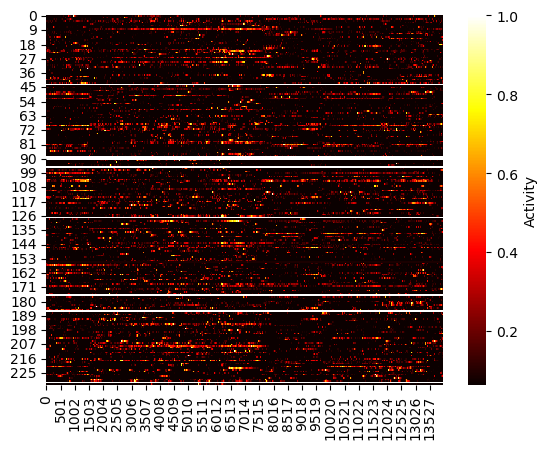

In [ ]:
sns.heatmap(Pre_Trace[Pre_Trace[indices_0].mean(axis=1).argsort()],vmin=Pre_Trace[indices_0].mean(),vmax=1,cmap='hot',cbar_kws={'label': 'Activity'})

In [ ]:
len(globals()[f'idx{j[1]}_coord1'][:,0])

43

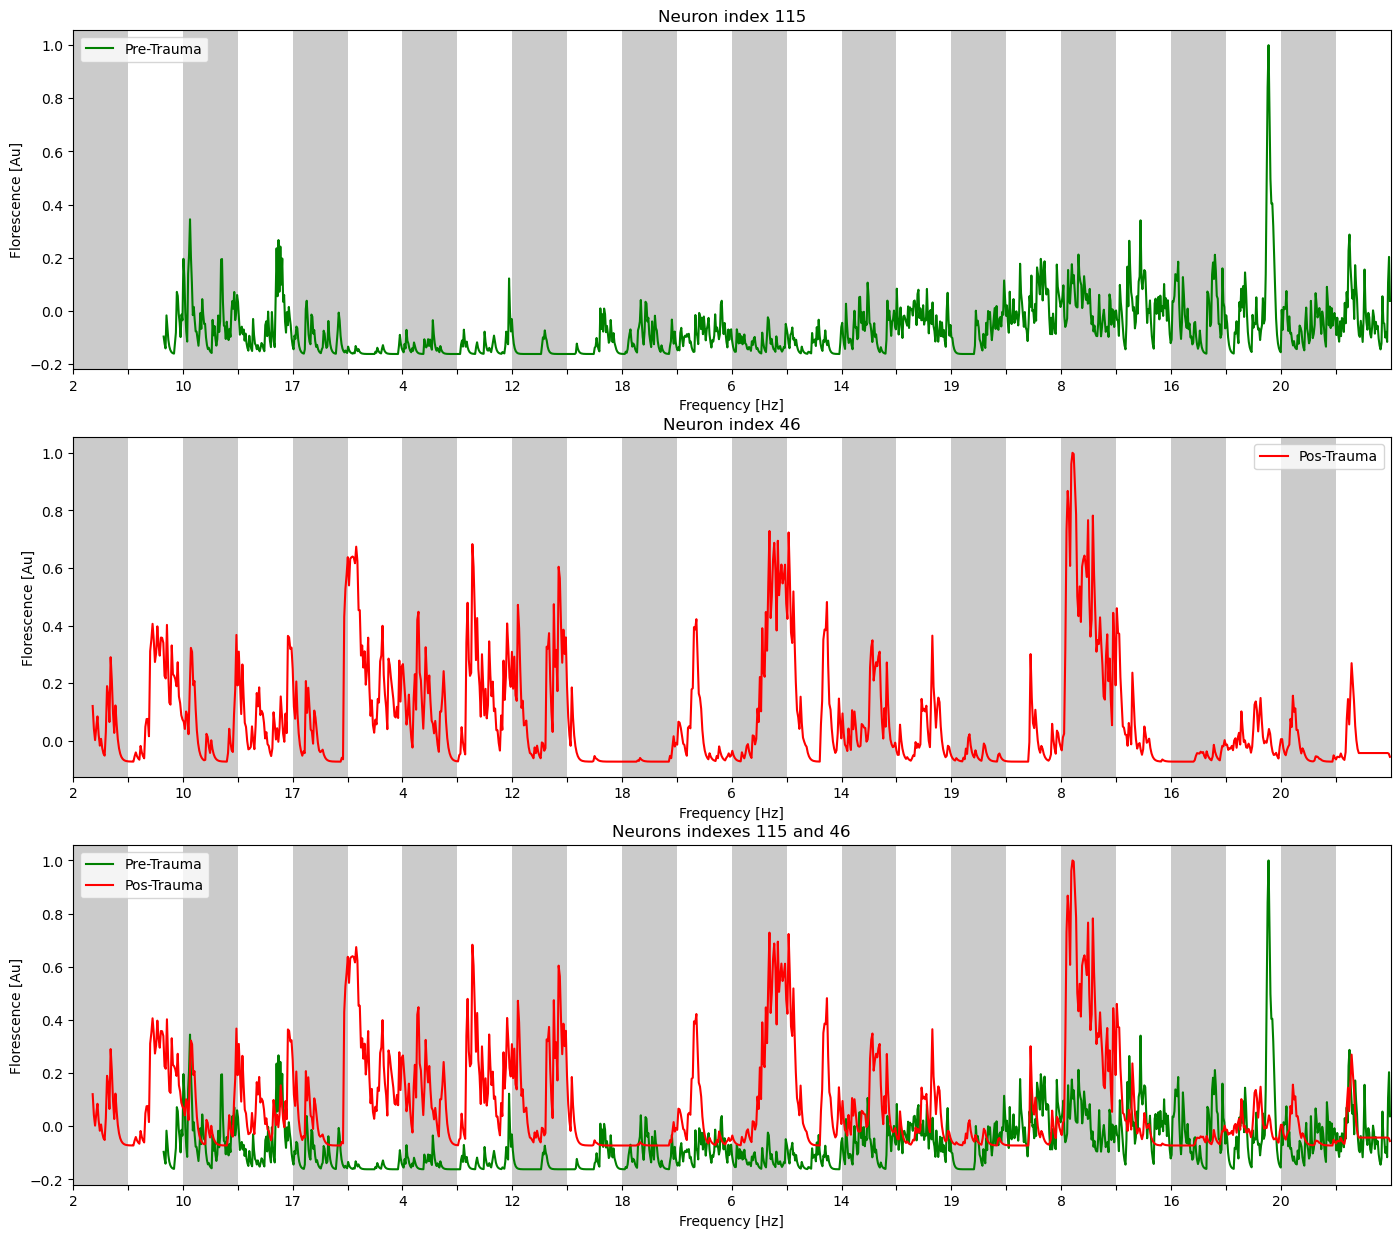

In [ ]:
Pre_x=np.linspace(0,12,len(Pre_Trace[0][::]))
Pos_x = np.linspace(0, 12, len(Pos_Trace[164][::]))
Pair=matches[202]
fig, ax = plt.subplots(3, 1, figsize=(17,15))
ax[0].plot(Pre_x[963::10],(Pre_Trace[Pair[0]][963::10])/Pre_Trace[Pair[0]][963::10].max(),c='g')
ax[1].plot(Pos_x[164::10],(Pos_Trace[Pair[1]][164::10])/Pos_Trace[Pair[1]][164::10].max(),c='r')
ax[2].plot(Pre_x[963::10],(Pre_Trace[Pair[0]][963::10])/Pre_Trace[Pair[0]][963::10].max(),c='g')
ax[2].plot(Pos_x[164::10],(Pos_Trace[Pair[1]][164::10])/Pos_Trace[Pair[1]][164::10].max(),c='r')

ax[0].set_title(f'Neuron index {Pair[0]}')
ax[1].set_title(f'Neuron index {Pair[1]}')
ax[2].set_title(f'Neurons indexes {Pair[0]} and {Pair[1]}')

ax[0].set_xlabel('Frequency [Hz]')
ax[1].set_xlabel('Frequency [Hz]')
ax[2].set_xlabel('Frequency [Hz]')

ax[0].set_ylabel('Florescence [Au]')
ax[1].set_ylabel('Florescence [Au]')
ax[2].set_ylabel('Florescence [Au]')

ax[0].set_xticks(Ttick)
ax[1].set_xticks(Ttick)
ax[2].set_xticks(Ttick)

ax[0].set_xticklabels(protocol)
ax[1].set_xticklabels(protocol)
ax[2].set_xticklabels(protocol)

ax[0].set_xlim(0,12)
ax[1].set_xlim(0,12)
ax[2].set_xlim(0,12)
ax[0].legend(['Pre-Trauma'])
ax[1].legend(['Pos-Trauma'])
ax[2].legend(['Pre-Trauma','Pos-Trauma'])
for i in range(24):
    if i %2 ==0:
        ax[0].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
        ax[1].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
        ax[2].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)

#plt.savefig(f'F:/IC/caimandata/PrePosMatch1.svg',format='svg')

plt.show()

#### Running clusterization
##### 12 clusters all data

In [ ]:
# Convert the raw traces to a feature matrix
PreX12 = np.vstack(APre_X)
PosX12 = np.vstack(APos_X)
# Perform K-means clustering with 11 clusters
Prekmeans = KMeans(n_clusters=12, random_state=0).fit(PreX12)
Poskmeans = KMeans(n_clusters=12, random_state=0).fit(PosX12)
# Assign each raw trace to a cluster
APrelabels = Prekmeans.predict(PreX12)
APoslabels = Poskmeans.predict(PosX12)
# Create a matrix where each row corresponds to a raw trace and each column corresponds to a cluster
Precluster_matrix = np.zeros((len(Pre_Trace), 12))
Poscluster_matrix = np.zeros((len(Pos_Trace), 12))
for i in range(len(Pre_Trace)):
    Precluster_matrix[i, APrelabels[i]] = 1
for i in range(len(Pos_Trace)):
    Poscluster_matrix[i, APoslabels[i]] = 1

Pre_Indices0,Pre_Indices1,Pre_Indices2,Pre_Indices3,Pre_Indices4,Pre_Indices5,Pre_Indices6,Pre_Indices7,Pre_Indices8,Pre_Indices9,Pre_Indices10,Pre_Indices11 = np.where(APrelabels == 0)[0],np.where(APrelabels == 1)[0],np.where(APrelabels == 2)[0],np.where(APrelabels == 3)[0],np.where(APrelabels == 4)[0],np.where(APrelabels == 5)[0],np.where(APrelabels == 6)[0],np.where(APrelabels == 7)[0],np.where(APrelabels == 8)[0],np.where(APrelabels == 9)[0],np.where(APrelabels == 10)[0],np.where(APrelabels == 11)[0]
Pos_Indices0,Pos_Indices1,Pos_Indices2,Pos_Indices3,Pos_Indices4,Pos_Indices5,Pos_Indices6,Pos_Indices7,Pos_Indices8,Pos_Indices9,Pos_Indices10,Pos_Indices11 = np.where(APoslabels == 0)[0],np.where(APoslabels == 1)[0],np.where(APoslabels == 2)[0],np.where(APoslabels == 3)[0],np.where(APoslabels == 4)[0],np.where(APoslabels == 5)[0],np.where(APoslabels == 6)[0],np.where(APoslabels == 7)[0],np.where(APoslabels == 8)[0],np.where(APoslabels == 9)[0],np.where(APoslabels == 10)[0],np.where(APoslabels == 11)[0]


Pre_Indices=[Pre_Indices0,Pre_Indices1,Pre_Indices2,Pre_Indices3,Pre_Indices4,Pre_Indices5,Pre_Indices6,Pre_Indices7,Pre_Indices8,Pre_Indices9,Pre_Indices10,Pre_Indices11]
Pos_Indices=[Pos_Indices0,Pos_Indices1,Pos_Indices2,Pos_Indices3,Pos_Indices4,Pos_Indices5,Pos_Indices6,Pos_Indices7,Pos_Indices8,Pos_Indices9,Pos_Indices10,Pos_Indices11]

Pre_C = [[] for _ in range(12)]
Pos_C = [[] for _ in range(12)]

for i in range(12):
  for j in Pre_Indices[i]:
    #if j in Pre_Idx:
    Pre_C[i].append(j)
  Pre_C[i] = np.array(Pre_C[i], dtype=int)

for i in range(12):
  for j in Pos_Indices[i]:
    #if j in Pos_pIdx:
    Pos_C[i].append(j)
  Pos_C[i] = np.array(Pos_C[i], dtype=int)

PreClusters = Pre_C
PosClusters = Pos_C
PreClustersNames = [f'Pre_C{i+1}' for i in range(12)]
PosClustersNames = [f'Pos_C{i+1}' for i in range(12)]

print(f'Pre_C1: {Pre_C[0]}\nPre_C2: {Pre_C[1]}\nPre_C3: {Pre_C[2]}\nPre_C4: {Pre_C[3]}\nPre_C5: {Pre_C[4]}\nPre_C6: {Pre_C[5]}\nPre_C7: {Pre_C[6]}\nPre_C8: {Pre_C[7]}\nPre_C9: {Pre_C[8]}\nPre_C10: {Pre_C[9]}\nPre_C11: {Pre_C[10]}\nPre_C12: {Pre_C[11]}\n')
print(f'Pos_C1: {Pos_C[0]}\nPos_C2: {Pos_C[1]}\nPos_C3: {Pos_C[2]}\nPos_C4: {Pos_C[3]}\nPos_C5: {Pos_C[4]}\nPos_C6: {Pos_C[5]}\nPos_C7: {Pos_C[6]}\nPos_C8: {Pos_C[7]}\nPos_C9: {Pos_C[8]}\nPos_C10: {Pos_C[9]}\nPos_C11: {Pos_C[10]}\nPos_C12: {Pos_C[11]}')

#Pre_x = np.linspace(0, 12, len(Pre_Trace[963::10]))
#

#print(Pre_C2,"\n", Pos_C11)





c:\Users\IC\anaconda3\envs\caiman\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Pre_C1: [156 231 358 404]
Pre_C2: [  0   1   2   4   5   7   8   9 344 401 403 405 406 408 410 411 413 414]
Pre_C3: [ 22  31  35  38  40  74  77  85  92  96 112 113 122 124 127 131 140 152
 155 160 163 166 185 190 206 214 246 265 270 271 283 297 328 333 347 352
 357 372 417]
Pre_C4: [ 94  95 102 104 106 115 134 180 191 196 201 207 255 257 262 263 291 293
 303 306]
Pre_C5: [ 12  26  29  41  87  91 121 123 126 130 135 138 153 159 164 170 171 187
 208 233 268 292 294 311 314 325 421]
Pre_C6: [407]
Pre_C7: [  3  30  33  36  39  62  64  65  66  67  80  98 103 107 108 110 116 117
 145 146 147 165 179 183 188 195 205 216 219 224 247 250 251 253 254 256
 260 261 280 284 285 286 295 296 298 299 305 308 310 331 332 336 354 355
 378 381 402 412 415]
Pre_C8: [100 128 139 143 144 154 158 161 236 237 245 249 274 276 278 373]
Pre_C9: [111]
Pre_C10: [ 10  11  13  14  15  16  17  19  20  23  25  27  28  32  34  37  43  45
  46  48  49  50  51  52  53  54  55  57  59  60  63  68  70  76  78  81
  82  83

c:\Users\IC\anaconda3\envs\caiman\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


##### 4 clusters  all data

##### 2 clusters  all data

In [ ]:
PreX2 = np.vstack(APre_X)
PosX2 = np.vstack(APos_X)
# Perform K-means clustering with 4
Prekmeans3 = KMeans(n_clusters=2, random_state=0).fit(PreX2)
Poskmeans3 = KMeans(n_clusters=2, random_state=0).fit(PosX2)
# Assign each raw trace to a cluster
APrelabels2 = Prekmeans3.predict(PreX2)
APoslabels2 = Poskmeans3.predict(PosX2)
# Create a matrix where each row corresponds to a raw trace and each column corresponds to a cluster
Precluster_matrix3 = np.zeros((len(Pre_Trace), 2))
Poscluster_matrix3 = np.zeros((len(Pos_Trace), 2))

for i in range(len(Pre_Trace)):
    Precluster_matrix3[i, APrelabels2[i]] = 1
for i in range(len(Pos_Trace)):
    Poscluster_matrix3[i, APoslabels2[i]] = 1

Pre_Indices03,Pre_Indices13= np.where(APrelabels2 == 0)[0],np.where(APrelabels2 == 1)[0]
Pos_Indices03,Pos_Indices13= np.where(APoslabels2 == 0)[0],np.where(APoslabels2 == 1)[0]


Pre_Indices3=[Pre_Indices03,Pre_Indices13]
Pos_Indices3=[Pos_Indices03,Pos_Indices13]

Pre_C3 = [[] for _ in range(2)]
Pos_C3 = [[] for _ in range(2)]

for i in range(2):
  for j in Pre_Indices3[i]:
      Pre_C3[i].append(j)
  Pre_C3[i] = np.array(Pre_C3[i], dtype=int)

for i in range(2):
  for j in Pos_Indices3[i]:
      Pos_C3[i].append(j)
  Pos_C3[i] = np.array(Pos_C3[i], dtype=int)

PreClusters3 = Pre_C3
PosClusters3 = Pos_C3
PreClustersNames3 = [f'Pre_C{i+1}' for i in range(12)]
PosClustersNames3 = [f'Pos_C{i+1}' for i in range(12)]

print(f'Pre_C1: {Pre_C3[0]}\nPre_C2: {Pre_C3[1]}')
print(f'Pos_C1: {Pos_C3[0]}\nPos_C2: {Pos_C3[1]}')

Pre_C1: [  3   6  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43
  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 25

c:\Users\IC\anaconda3\envs\caiman\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\IC\anaconda3\envs\caiman\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


####  Caiman selected Neurons Clusters

In [ ]:
CPreX12 = np.vstack(CPre_X)
CPosX12 = np.vstack(CPos_X)
# Perform K-means clustering with 4 clusters
Prekmeans4 = KMeans(n_clusters=12, random_state=0).fit(CPreX12)
Poskmeans4 = KMeans(n_clusters=12, random_state=0).fit(CPosX12)
# Assign each raw trace to a cluster
CPrelabels12 = Prekmeans4.predict(CPreX12)
CPoslabels12 = Poskmeans4.predict(CPosX12)
# Create a matrix where each row corresponds to a raw trace and each column corresponds to a cluster
Precluster_matrix12 = np.zeros((len(CPre_X), 12))
Poscluster_matrix12 = np.zeros((len(CPos_X), 12))
for i in range(len(CPre_X)):
  Precluster_matrix12[i, CPrelabels12[i]] = 1
for i in range(len(CPos_X)):
  Poscluster_matrix12[i, CPoslabels12[i]] = 1

Pre_Indices02,Pre_Indices12,Pre_Indices22,Pre_Indices32,Pre_Indices42,Pre_Indices52,Pre_Indices62,Pre_Indices72,Pre_Indices82,Pre_Indices92,Pre_Indices102,Pre_Indices112 = np.where(CPrelabels12 == 0)[0],np.where(CPrelabels12 == 1)[0],np.where(CPrelabels12 == 2)[0],np.where(CPrelabels12 == 3)[0],np.where(CPrelabels12 == 4)[0],np.where(CPrelabels12 == 5)[0],np.where(CPrelabels12 == 6)[0],np.where(CPrelabels12 == 7)[0],np.where(CPrelabels12 == 8)[0],np.where(CPrelabels12 == 9)[0],np.where(CPrelabels12 == 10)[0],np.where(CPrelabels12 == 11)[0]
Pos_Indices02,Pos_Indices12,Pos_Indices22,Pos_Indices32,Pos_Indices42,Pos_Indices52,Pos_Indices62,Pos_Indices72,Pos_Indices82,Pos_Indices92,Pos_Indices102,Pos_Indices112 = np.where(CPoslabels12 == 0)[0],np.where(CPoslabels12 == 1)[0],np.where(CPoslabels12 == 2)[0],np.where(CPoslabels12 == 3)[0],np.where(CPoslabels12 == 4)[0],np.where(CPoslabels12 == 5)[0],np.where(CPoslabels12 == 6)[0],np.where(CPoslabels12 == 7)[0],np.where(CPoslabels12 == 8)[0],np.where(CPoslabels12 == 9)[0],np.where(CPoslabels12 == 10)[0],np.where(CPoslabels12 == 11)[0]


Pre_Indices12=[Pre_Indices02,Pre_Indices12,Pre_Indices22,Pre_Indices32,Pos_Indices42,Pos_Indices52,Pos_Indices62,Pos_Indices72,Pos_Indices82,Pos_Indices92,Pos_Indices102,Pos_Indices112]
Pos_Indices12=[Pos_Indices02,Pos_Indices12,Pos_Indices22,Pos_Indices32,Pos_Indices42,Pos_Indices52,Pos_Indices62,Pos_Indices72,Pos_Indices82,Pos_Indices92,Pos_Indices102,Pos_Indices112]

Pre_C12 = [[] for _ in range(12)]
Pos_C12 = [[] for _ in range(12)]

for i in range(12):
  for j in Pre_Indices12[i]:
    if j in Pre_Idx:
      Pre_C12[i].append(j)
  Pre_C12[i] = np.array(Pre_C12[i], dtype=int)

for i in range(12):
  for j in Pos_Indices12[i]:
    if j in Pos_pIdx:
      Pos_C12[i].append(j)
  Pos_C12[i] = np.array(Pos_C12[i], dtype=int)

PreClusters12 = Pre_C12
PosClusters12 = Pos_C12
PreClustersNames12 = [f'Pre_C{i+1}' for i in range(12)]
PosClustersNames12 = [f'Pos_C{i+1}' for i in range(12)]

print(f'Pre_C1: {Pre_C12[0]}\nPre_C2: {Pre_C12[1]}\nPre_C3: {Pre_C12[2]}\nPre_C4: {Pre_C12[3]} Pre_C5: {Pre_C12[4]}\nPre_C6: {Pre_C12[5]}\nPre_C7: {Pre_C12[6]}\nPre_C8: {Pre_C12[7]} Pre_C9: {Pre_C12[8]}\nPre_C10: {Pre_C12[9]}\nPre_C11: {Pre_C12[10]}\nPre_C12: {Pre_C12[11]}')
print(f'Pos_C1: {Pos_C12[0]}\nPos_C2: {Pos_C12[1]}\nPos_C3: {Pos_C12[2]}\nPos_C4: {Pos_C12[3]}\nPos_C5: {Pos_C12[4]}\nPos_C6: {Pos_C12[5]}\nPos_C7: {Pos_C12[6]}\nPos_C8: {Pos_C12[7]}\nPos_C9: {Pos_C12[8]}\nPos_C10: {Pos_C12[9]}\nPos_C11: {Pos_C12[10]}\nPos_C12: {Pos_C12[11]}')

PreBase=np.array([])
PosBase=np.array([])

def Clusterize(data,bool,n_clusters):
    if bool == 0:
      data = np.vstack(data)

    elif bool == 1:
      data = np.vstack(data)
    else:
      data=np.vstack(data[0])
      data1=np.vstack(data[1])


    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data)
    return kmeans.labels_




for i in Pre_C12:
    if i.size==0:
        continue
    else:
        PreBase=np.append(PreBase,i.mean())
for i in Pos_C12:
    if i.size==0:
        continue
    else:
        PosBase=np.append(PosBase,i.mean())


Pre_C1: [150]
Pre_C2: [ 67  88  97  98 113 117 159 187 211 219 245 262]
Pre_C3: [  6 261 267]
Pre_C4: [ 69 110 122 128 129 135 143 149 171 176 196 199 246 248 266 271] Pre_C5: [256]
Pre_C6: [ 28  39  67  86 102 112 114 115 116 119 144 154 185 191 281]
Pre_C7: [200]
Pre_C8: [260 266] Pre_C9: [ 10  17  33  38 127 128 150 176 202 246 283]
Pre_C10: [130]
Pre_C11: [69]
Pre_C12: [143]
Pos_C1: [  9  55 152 232]
Pos_C2: [265 267]
Pos_C3: [ 11  13  18  20  24  25  26  29  43  53  59  61  62  70  83  84  85  90
  93  97  98  99 104 109 118 120 125 129 131 132 133 136 137 138 139 141
 142 147 156 184 186 194 196 198 203 205 211 214 215 219 220 222 223 225
 227 230 231 233 234 236 239 243 248 249 251 252 255 257 259 269]
Pos_C4: [  3 199]
Pos_C5: [256]
Pos_C6: [ 12  19  28  39  50  63  66  67  80  89  91 100 102 112 140 193 277]
Pos_C7: []
Pos_C8: []
Pos_C9: [  1  17  21  38  46  54  79  96 128 151 192]
Pos_C10: []
Pos_C11: [52 69]
Pos_C12: [143]


c:\Users\IC\anaconda3\envs\caiman\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\IC\anaconda3\envs\caiman\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [ ]:
CPreX4 = np.vstack(CPre_X)
CPosX4 = np.vstack(CPos_X)
# Perform K-means clustering with 4 clusters
Prekmeans4 = KMeans(n_clusters=4, random_state=0).fit(CPreX4)
Poskmeans4 = KMeans(n_clusters=4, random_state=0).fit(CPosX4)
# Assign each raw trace to a cluster
CPrelabels4 = Prekmeans4.predict(CPreX4)
CPoslabels4 = Poskmeans4.predict(CPosX4)
# Create a matrix where each row corresponds to a raw trace and each column corresponds to a cluster
Precluster_matrix4 = np.zeros((len(CPre_X), 4))
Poscluster_matrix4 = np.zeros((len(CPos_X), 4))
for i in range(len(CPre_X)):
  Precluster_matrix4[i, CPrelabels4[i]] = 1
for i in range(len(CPos_X)):
  Poscluster_matrix4[i, CPoslabels4[i]] = 1

Pre_Indices02,Pre_Indices12,Pre_Indices22,Pre_Indices32 = np.where(CPrelabels4 == 0)[0],np.where(CPrelabels4 == 1)[0],np.where(CPrelabels4 == 2)[0],np.where(CPrelabels4 == 3)[0]
Pos_Indices02,Pos_Indices12,Pos_Indices22,Pos_Indices32 = np.where(CPoslabels4 == 0)[0],np.where(CPoslabels4 == 1)[0],np.where(CPoslabels4 == 2)[0],np.where(CPoslabels4 == 3)[0]


Pre_Indices2=[Pre_Indices02,Pre_Indices12,Pre_Indices22,Pre_Indices32]
Pos_Indices2=[Pos_Indices02,Pos_Indices12,Pos_Indices22,Pos_Indices32]

Pre_C4 = [[] for _ in range(4)]
Pos_C4 = [[] for _ in range(4)]

for i in range(4):
  for j in Pre_Indices2[i]:
    if j in Pre_Idx:
      Pre_C4[i].append(j)
  Pre_C4[i] = np.array(Pre_C4[i], dtype=int)

for i in range(4):
  for j in Pos_Indices2[i]:
    if j in Pos_pIdx:
      Pos_C4[i].append(j)
  Pos_C4[i] = np.array(Pos_C4[i], dtype=int)

PreClusters4 = Pre_C4
PosClusters4 = Pos_C4
PreClustersNames4 = [f'Pre_C{i+1}' for i in range(12)]
PosClustersNames4 = [f'Pos_C{i+1}' for i in range(12)]

print(f'Pre_C1: {Pre_C4[0]}\nPre_C2: {Pre_C4[1]}\nPre_C3: {Pre_C4[2]}\nPre_C4: {Pre_C4[3]}')
print(f'Pos_C1: {Pos_C4[0]}\nPos_C2: {Pos_C4[1]}\nPos_C3: {Pos_C4[2]}\nPos_C4: {Pos_C4[3]}')

Pre_C1: [ 16  18  55  62  85 106 108 124 178 184 262]
Pre_C2: [  9  10  15  17  22  28  30  33  35  38  39  41  61  64  67  69  83  86
  88  92  97  98  99 102 103 107 110 112 113 114 115 116 117 119 120 122
 123 127 128 129 130 132 134 135 142 143 144 149 150 154 155 159 162 164
 167 171 175 176 185 187 191 196 199 200 202 203 205 206 211 215 219 225
 237 238 240 242 243 245 246 247 248 250 251 252 253 254 256 260 266 271]
Pre_C3: []
Pre_C4: [  6 261 267]
Pos_C1: [ 17  55 152 232]
Pos_C2: [265 267]
Pos_C3: [  1  28  38  46  50  52  54  66  69  79  89 128 143 256]
Pos_C4: [  3   9  11  12  13  18  19  20  21  24  25  26  29  39  43  53  59  61
  62  63  67  70  80  83  84  85  90  91  93  96  97  98  99 100 102 104
 109 112 118 120 125 129 131 132 133 136 137 138 139 140 141 142 147 151
 156 184 186 192 193 194 196 198 199 203 205 211 214 215 219 220 222 223
 225 227 230 231 233 234 236 239 243 248 249 251 252 255 257 259 269 277]


c:\Users\IC\anaconda3\envs\caiman\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\IC\anaconda3\envs\caiman\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [ ]:
CPreX2 = np.vstack(CPre_X)
CPosX2 = np.vstack(CPos_X)
# Perform K-means clustering with 2 clusters
Prekmeans2 = KMeans(n_clusters=2, random_state=0).fit(CPreX2)
Poskmeans2 = KMeans(n_clusters=2, random_state=0).fit(CPosX2)
# Assign each raw trace to a cluster
CPrelabels2 = Prekmeans2.predict(CPreX2)
CPoslabels2 = Poskmeans2.predict(CPosX2)
# Create a matrix where each row corresponds to a raw trace and each column corresponds to a cluster
Precluster_matrix2 = np.zeros((len(CPre_X), 2))
Poscluster_matrix2 = np.zeros((len(CPos_X), 2))
for i in range(len(CPre_X)):
    Precluster_matrix2[i, CPrelabels2[i]] = 1
for i in range(len(CPos_X)):
    Poscluster_matrix2[i, CPoslabels2[i]] = 1

Pre_Indices03,Pre_Indices13= np.where(CPrelabels2 == 0)[0],np.where(CPrelabels2 == 1)[0]
Pos_Indices03,Pos_Indices13= np.where(CPoslabels2 == 0)[0],np.where(CPoslabels2 == 1)[0]


Pre_Indices2=[Pre_Indices03,Pre_Indices13]
Pos_Indices2=[Pos_Indices03,Pos_Indices13]

Pre_C2 = [[] for _ in range(2)]
Pos_C2 = [[] for _ in range(2)]

for i in range(2):
  for j in Pre_Indices3[i]:
    if j in Pre_Idx:
      Pre_C2[i].append(j)
  Pre_C2[i] = np.array(Pre_C2[i], dtype=int)

for i in range(2):
  for j in Pos_Indices3[i]:
    if j in Pos_pIdx:
      Pos_C2[i].append(j)
  Pos_C2[i] = np.array(Pos_C2[i], dtype=int)

PreClusters2 = Pre_C2
PosClusters2 = Pos_C2
PreClustersNames2 = [f'Pre_C{i+1}' for i in range(2)]
PosClustersNames2 = [f'Pos_C{i+1}' for i in range(2)]

print(f'Pre_C1: {Pre_C2[0]}\nPre_C2: {Pre_C2[1]}')
print(f'Pos_C1: {Pos_C2[0]}\nPos_C2: {Pos_C2[1]}')



Pre_C1: [  6  10  15  16  17  18  22  28  30  33  35  38  39  41  55  61  62  64
  67  69  83  85  86  88  92  97  98  99 102 103 106 107 108 110 112 113
 114 115 116 117 119 120 122 123 124 127 128 129 130 132 134 135 142 143
 144 149 150 154 155 159 162 164 167 171 175 176 178 184 185 187 191 196
 199 200 202 203 205 206 211 215 219 225 237 238 240 242 243 245 246 247
 248 250 251 252 253 254 256 260 261 262 266 267 271 279 281 283 286 288
 289 291 292 293 296 297 298 302 303 305 308 311 315 321 325 328 329 333
 334 336 339 343 355 356 359 360 365 369 376 377 393 394 412 416 417 419
 421]
Pre_C2: [  9 344 408 411]
Pos_C1: [  3   9  11  12  13  17  18  19  20  21  24  25  26  28  29  38  39  43
  46  50  52  53  54  55  59  61  62  63  66  67  69  70  79  80  83  84
  85  89  90  91  93  96  97  98  99 100 102 104 109 112 118 120 125 128
 129 131 132 133 136 137 138 139 140 141 142 143 147 151 152 156 184 186
 192 193 194 196 198 199 203 205 211 214 215 219 220 222 223 225 227 230
 23

c:\Users\IC\anaconda3\envs\caiman\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\IC\anaconda3\envs\caiman\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [ ]:
%matplotlib Qt


fig,ax=plt.subplots(2,2,figsize=(20,10))

ax[0,0].set_title('Pre 12 AClusters ')
ax[0,1].set_title('Pre 2 CClusters ')
ax[1,0].set_title('Pos 12 AClusters ')
ax[1,1].set_title('Pos 2 CClusters ')

sns.heatmap(Pre_Trace[np.argsort(APrelabels)], vmin=Pre_Trace.std(), cmap='hot', ax=ax[0,0])
sns.heatmap(Pre_Trace[np.argsort(CPrelabels2)], vmin=Pre_Trace.std(),  cmap='hot', ax=ax[0,1])
#sns.heatmap(Pre_Trace[np.argsort(CPrelabels4)]-Pre_Trace[np.argsort(CPrelabels4)].min(), vmin=Pre_Trace[Pre_idx].max()/Pre_Trace[Pre_idx].mean(), vmax=500, cmap='hot', ax=ax[0,2])
#sns.heatmap(Pre_Trace[np.argsort(CPrelabels12)]-Pre_Trace[np.argsort(CPrelabels12)].min(), vmin=Pre_Trace[Pre_idx].max()/Pre_Trace[Pre_idx].mean(), vmax=500, cmap='hot', ax=ax[0,3])
sns.heatmap(Pos_Trace[np.argsort(APoslabels)], vmin=Pos_Trace.std(),  cmap='hot',ax=ax[1,0])
sns.heatmap(Pos_Trace[np.argsort(CPoslabels2)], vmin=Pos_Trace.std(),  cmap='hot',ax=ax[1,1])
#sns.heatmap(Pos_Trace[np.argsort(CPoslabels4)]-Pos_Trace[np.argsort(CPoslabels4)].min(), vmin=2*os_Trace.std(), vmax=250, cmap='hot', ax=ax[1,2])
#sns.heatmap(Pos_Trace[np.argsort(CPoslabels12)]-Pos_Trace[np.argsort(CPoslabels12)].min(), vmin=2*Pos_Trace.std(), vmax=250, cmap='hot', ax=ax[1,3])
ax[0,0].set_xticks(np.arange(0,14000,600))
ax[0,1].set_xticks(np.arange(0,14000,600))
ax[1,0].set_xticks(np.arange(0,11000,460))
ax[1,1].set_xticks(np.arange(0,11000,460))
ax[0,0].set_xticklabels(protocol)
ax[0,1].set_xticklabels(protocol)
ax[1,0].set_xticklabels(protocol)
ax[1,1].set_xticklabels(protocol)
ax[0,0].set_ylabel('Neurons#')
ax[0,1].set_ylabel('Neurons#')
ax[1,0].set_ylabel('Neurons#')
ax[1,1].set_ylabel('Neurons#')
ax[0,0].set_yticklabels(np.argsort(APrelabels)[:25])
ax[0,1].set_yticklabels(np.argsort(CPrelabels2)[:25])
ax[1,0].set_yticklabels(np.argsort(APoslabels)[:25])
ax[1,1].set_yticklabels(np.argsort(CPoslabels2)[:24])
for i in range(14000):
    ax[0,0].axvline((i*700),(i*700)+1663 , c='w')
    ax[0,1].axvline((i*550),(i*550)+714, c='w')
    ax[1,0].axvline((i*700),(i*700)+1663 , c='w')
    ax[1,1].axvline((i*550),(i*550)+714, c='w')
    #ax[0,2].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
    #ax[0,3].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
    #ax[1,2].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
    #ax[1,3].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)

#plt.savefig(f"F:/IC/caimandata/HeatMap.png",format='png')
plt.tight_layout()

In [ ]:
from scipy import stats
t_stat, p_val = stats.ttest_ind(Pre_Trace[indices_0].mean(axis=1), Pos_Trace[indices_1].mean(axis=1))
print(f'T-test statistic: {t_stat}\np-value: {p_val}')

T-test statistic: 1.397929845081872
p-value: 0.16280203540468283


In [ ]:
Pre_Trace_zscore = stats.zscore((Pre_Trace[indices_0]).mean(axis=1))
Pos_Trace_zscore = stats.zscore((Pos_Trace[indices_1]).mean(axis=1))

t_stat, p_val = stats.ttest_ind(Pre_Trace_zscore, Pos_Trace_zscore)
print(Pre_Trace_zscore,Pos_Trace_zscore)
print(f'T-test statistic: {t_stat}\np-value: {p_val}')

[ 1.37031528e-01  4.98941820e+00 -1.65894929e-01 -2.31316240e-01
 -2.35014503e-01 -2.41149560e-01 -2.65142214e-02  5.78938639e-02
 -2.26986549e-01 -4.92354187e-01 -4.56774767e-01  2.06400848e-01
  1.67605383e-02 -3.97511583e-01  1.03491649e-01 -2.83269141e-01
 -3.14451277e-01 -4.10639788e-01 -2.89205347e-01 -3.67993466e-01
 -5.29374737e-01 -1.73582072e-01 -1.73582072e-01  4.86100414e-01
  4.86100414e-01  4.86100414e-01  4.86100414e-01  1.38722687e-02
 -1.01680167e-01  3.06641622e-01 -1.51800302e-02 -1.51800302e-02
 -3.13350275e-01 -3.36927529e-01 -3.36927529e-01 -1.60873284e+00
 -1.60873284e+00 -1.60873284e+00 -5.58077598e-01 -1.07414690e+00
 -4.48225867e-01 -4.48225867e-01 -4.07974839e-01 -4.07974839e-01
 -4.79722849e-01 -4.99111217e-02 -2.00255649e-01 -1.74333714e-01
 -6.57300354e-01 -6.57300354e-01 -4.35271975e-01 -6.22962943e-01
 -6.22962943e-01  1.89294168e-02 -6.93170584e-02  3.93595519e-01
  4.35074055e-02  4.35074055e-02  1.91045630e-01  1.43814749e-02
  2.59593901e-01 -2.46478

In [ ]:
plt.hist(Pre_Trace_zscore, bins=20, alpha=0.5,  color='g')

(array([ 3.,  2., 24., 48., 97., 27., 23.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  2.,  0.,  0.,  0.,  0.,  7.]),
 array([-1.60873284, -1.27882529, -0.94891774, -0.61901018, -0.28910263,
         0.04080492,  0.37071247,  0.70062003,  1.03052758,  1.36043513,
         1.69034268,  2.02025023,  2.35015779,  2.68006534,  3.00997289,
         3.33988044,  3.669788  ,  3.99969555,  4.3296031 ,  4.65951065,
         4.9894182 ]),
 <BarContainer object of 20 artists>)

In [ ]:
highMe=np.array([])
for l,i in enumerate(Pre_Trace):
    if np.mean(i)>=5:
        l=int(l)
        highMe=np.append(highMe,l)
        highMe=highMe.astype(int)
PoshighMe=np.array([])
for l,i in enumerate(Pos_Trace):
    if np.mean(i)>=3:
        l=int(l)
        PoshighMe=np.append(PoshighMe,l)
        PoshighMe=PoshighMe.astype(int)
print(len(highMe))

159


In [ ]:
matches

[(6, 429),
 (9, 1),
 (10, 3),
 (15, 3),
 (16, 18),
 (17, 13),
 (18, 17),
 (22, 12),
 (28, 13),
 (30, 9),
 (33, 19),
 (35, 11),
 (38, 21),
 (39, 12),
 (41, 24),
 (55, 24),
 (61, 20),
 (62, 29),
 (64, 28),
 (67, 25),
 (69, 24),
 (83, 59),
 (83, 432),
 (85, 39),
 (85, 61),
 (85, 83),
 (85, 91),
 (86, 50),
 (88, 63),
 (92, 432),
 (97, 52),
 (97, 54),
 (98, 50),
 (99, 430),
 (99, 434),
 (102, 39),
 (102, 83),
 (102, 91),
 (103, 53),
 (106, 61),
 (107, 46),
 (107, 55),
 (108, 38),
 (108, 62),
 (110, 43),
 (112, 432),
 (113, 43),
 (114, 53),
 (115, 46),
 (115, 55),
 (116, 38),
 (117, 61),
 (117, 91),
 (119, 99),
 (120, 66),
 (122, 98),
 (123, 102),
 (123, 104),
 (124, 89),
 (127, 100),
 (128, 109),
 (129, 96),
 (130, 102),
 (132, 80),
 (134, 83),
 (135, 100),
 (142, 85),
 (143, 97),
 (144, 112),
 (149, 129),
 (150, 69),
 (154, 93),
 (155, 67),
 (155, 84),
 (155, 90),
 (159, 138),
 (162, 132),
 (164, 136),
 (167, 139),
 (171, 131),
 (175, 142),
 (176, 118),
 (176, 143),
 (178, 125),
 (184, 128

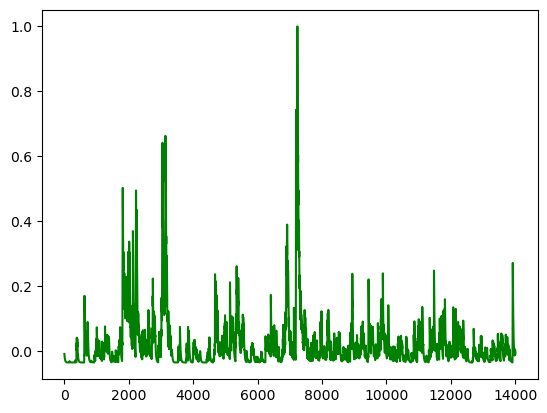

In [ ]:
plt.plot(Pre_Trace[indices_0[5]]/Pre_Trace[indices_0[5]].max(),c='g')
#print(f'Relative error {((Pos_Trace[int(indices_1[3])].std()-Pre_Trace[int(indices_0[3])].std())/Pre_Trace[int(indices_0[3])].std())*100}%')


In [ ]:
print(np.isin(PoshighMe,Pos_idx))

In [ ]:

acc=np.diff(np.diff(Pos_Trace[Pos_idx]))**2
fig,ax=plt.subplots(5,2,figsize=(20,15))
for l,i in enumerate(acc[2:7]):
    ax[l,0].set_title(f'Neuron {Pos_idx[2+l]}')
    ax[l,0].plot(Pos_Trace[Pos_idx[2+l]])
    ax[l,1].plot(abs(i))
    ax[l,1].plot(i.std()*np.ones(len(acc[10])))
    print(i)

In [ ]:
def numbers_above_std(arr):
    std = np.std(arr)
    return arr[arr > std]

# Example usage
result = numbers_above_std(acc[9])
print(result)
#np.where(result==acc[10])

plt.plot(result)
plt.plot(np.std(acc[9])*np.ones(len(result)))

In [ ]:
Pre_Trace[highMe].std()

31.336691530613354

In [ ]:
print(Pre_Trace[highMe].argmax(axis=1))


[ 2104  3441  6200  2672  7982 11320   589  2999 13391   573  5138  6222
  4472   343  7770   961  9608   719  4599  2416  6560  6446  4183  1051
  9846  6846 10466  3082  3124  4481 13248 13936  6833 13118  8618  1327
  3449  6230  9413  8614  6966  7980  1489  6196  6374  6474 12564  6735
  1393  3447  6198  3282  6136   486  6205  6237  6868  1250  6229  2395
  6205  6230  1479  7894  6777  1361 12174  7407   769   579  8410  3728
 11612  1451  6212  3897  7116  7081  4717  5372 13548  5265 12885  1905
  4764  8523  5879  4499  6175 10741  5996  3746  2179   722  6446  4601
  7802  2692 12286  7738  3105  4779  3985  2648  7052  6467  8212   147
 11179  6485  2765  3902  4261  6186   148  7973  8222  6278  9089 11431
   799 12285   547 12567  7140 13464  3512  6447 11547  6110  6441  4769
   896  5450  6467  4802  5419  8846  4764  9872  7143  2695  3875 11168
  5299  1743   174  3976  3134    22  4266  8256  8817  6493   350   718
  1635  8229  6205]


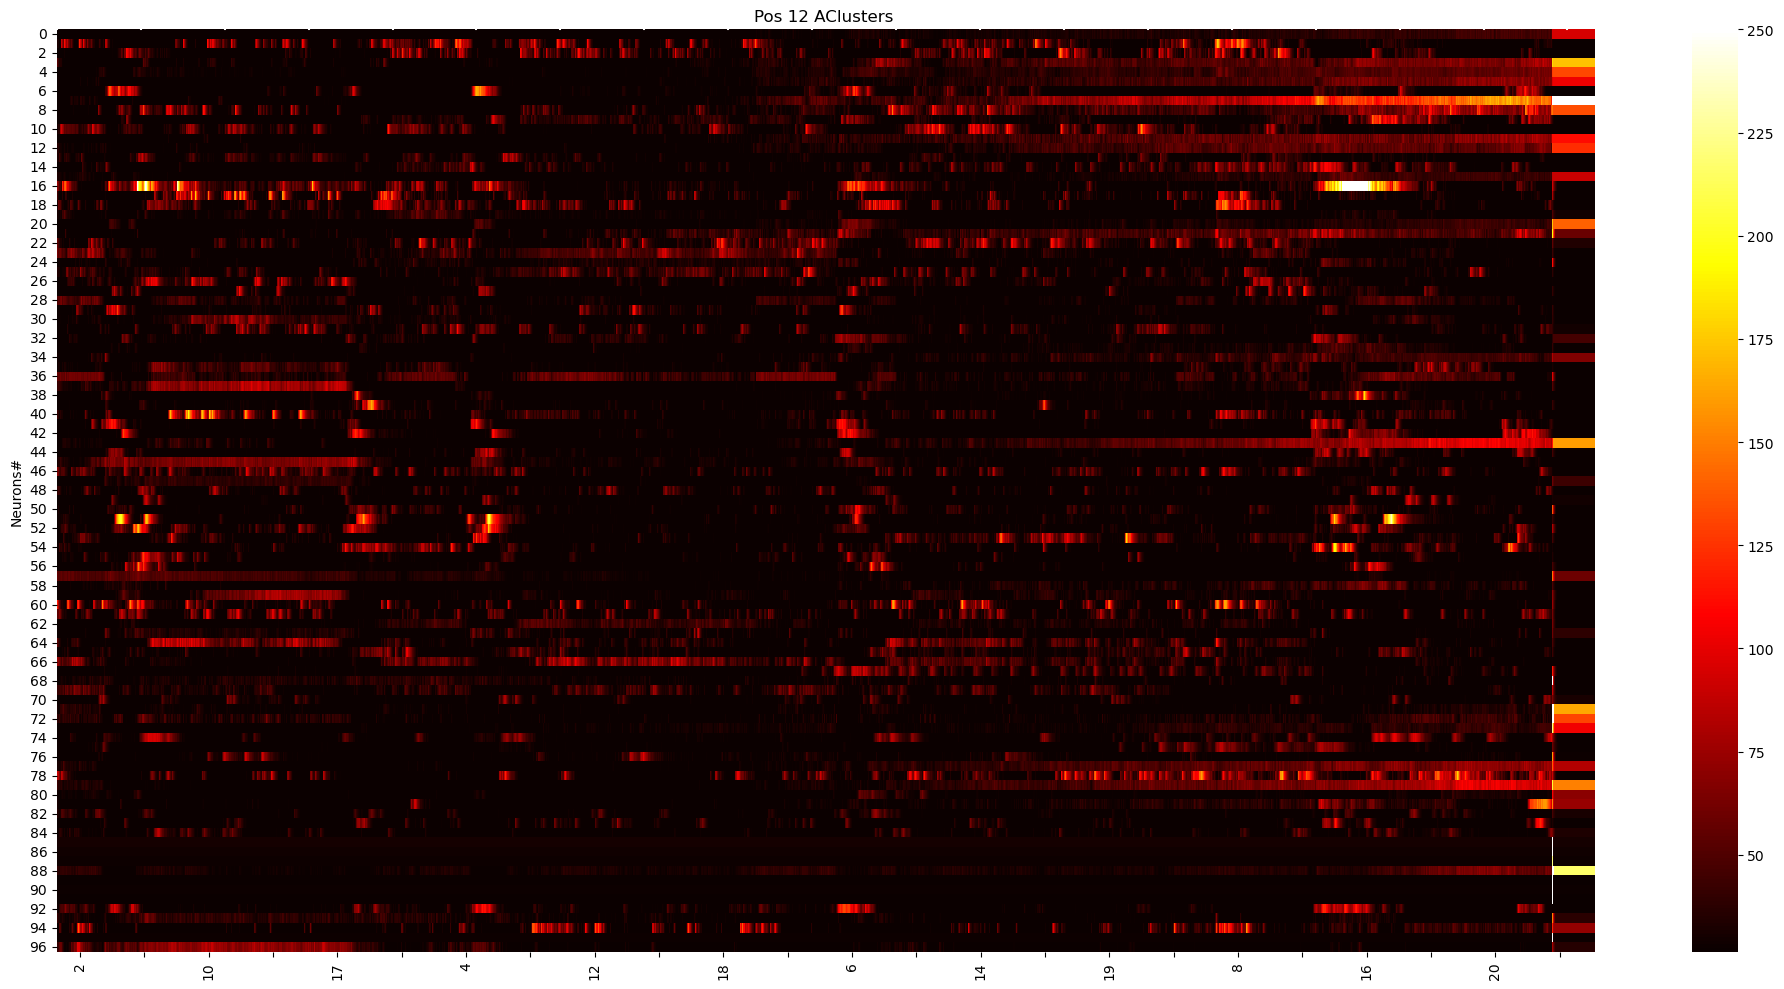

In [ ]:
%matplotlib inline


fig,ax=plt.subplots(1,1,figsize=(20,10))

#ax.set_title('Pre 12 AClusters ')
#ax.set_title('Pre 2 CClusters ')
ax.set_title('Pos 12 AClusters ')
#ax.set_title('Pos 2 CClusters ')

#sns.heatmap(Pre_Trace[highMe]-Pre_Trace[highMe].min(), vmin=2*Pre_Trace.std(), vmax=500, cmap='hot')
#ax.set_yticklabels(highMe[:53])
#sns.heatmap(Pre_Trace[np.argsort(CPrelabels2)]-Pre_Trace[np.argsort(CPrelabels2)].min(), vmin=Pre_Trace.std(), vmax=500, cmap='hot', ax=ax[0,1])
#sns.heatmap(Pre_Trace[np.argsort(CPrelabels4)]-Pre_Trace[np.argsort(CPrelabels4)].min(), vmin=Pre_Trace[Pre_idx].max()/Pre_Trace[Pre_idx].mean(), vmax=500, cmap='hot', ax=ax[0,2])
#sns.heatmap(Pre_Trace[np.argsort(CPrelabels12)]-Pre_Trace[np.argsort(CPrelabels12)].min(), vmin=Pre_Trace[Pre_idx].max()/Pre_Trace[Pre_idx].mean(), vmax=500, cmap='hot', ax=ax[0,3])
#sns.heatmap(Pos_Trace[np.argsort(APoslabels)]-Pos_Trace[np.argsort(APoslabels)].min(), vmin=2*Pos_Trace.std(), vmax=250, cmap='hot',ax=ax[1,0])
#sns.heatmap(Pos_Trace[np.argsort(CPoslabels2)]-Pos_Trace[np.argsort(CPoslabels2)].min(), vmin=2*Pos_Trace.std(), vmax=250, cmap='hot',ax=ax[1,1])
#sns.heatmap(Pos_Trace[np.argsort(CPoslabels4)]-Pos_Trace[np.argsort(CPoslabels4)].min(), vmin=2*Pos_Trace.std(), vmax=250, cmap='hot', ax=ax[1,2])
sns.heatmap(Pos_Trace[PoshighMe]-Pos_Trace[PoshighMe].min(), vmin=2.5*Pos_Trace.std(), vmax=250, cmap='hot')
ax.set_xticks(np.arange(164,11000,460))
#ax[0,1].set_xticks(np.arange(0,14000,600))
#ax[1,0].set_xticks(np.arange(0,11000,460))
#ax[1,1].set_xticks(np.arange(0,11000,460))
ax.set_xticklabels(protocol)
#ax[0,1].set_xticklabels(protocol)
#ax[1,0].set_xticklabels(protocol)
#ax[1,1].set_xticklabels(protocol)
ax.set_ylabel('Neurons#')
#ax[0,1].set_ylabel('Neurons#')
#ax[1,0].set_ylabel('Neurons#')
#ax[1,1].set_ylabel('Neurons#')
#ax.set_yticklabels(np.argsort(APrelabels)[:54])
#ax[0,1].set_yticklabels(np.argsort(CPrelabels2)[:25])
#ax[1,0].set_yticklabels(np.argsort(APoslabels)[:25])
#ax[1,1].set_yticklabels(np.argsort(CPoslabels2)[:24])
#ax.set_xlim(1,14000)
ax.set_xlim(1,11000)
for i in range(11000):
    ax.axvline((i*600),(i*600)+(963+600) , c='w')
    #ax.axvline((i*600),(i*600)+(963+600) , c='w')
    #ax[0,1].axvline((i*550),(i*550)+714, c='w')
    #ax[1,0].axvline((i*700),(i*700)+1663 , c='w')
    #ax[1,1].axvline((i*550),(i*550)+714, c='w')
    #ax[0,2].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
    #ax[0,3].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
    #ax[1,2].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
    #ax[1,3].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)

#plt.savefig(f"F:/IC/caimandata/zoomposHeatMap.png",format='png')
plt.tight_layout()

#### Stimulos on or off array

In [ ]:
%matplotlib Qt
Stimonpre=np.array([])
Stimoffpre=np.array([])
Stimonpos=np.array([])
Stimoffpos=np.array([])

Spre=np.array([])
Spre1=np.array([])
Spos=np.array([])
Spos1=np.array([])
j=2
for i in range(24):
    if i%2==0:
        Spre=np.append(Spre,Pre_Trace[matches[j][0]][963+(i*600):(i*600)+(600+963)])
        Spos=np.append(Spos,Pos_Trace[matches[j][1]][164+(i*600):(i*600)+(164+600)])

        #print(f'{963+(i*600)} : {(i*600)+(600+963)}')

        #Spre1=np.append(Spre1,np.ones(len(Pre_Trace[matches[j][0]][963+(i*600):(i*600)+(963+600)]))*Pre_Trace[matches[j][0]].mean())
        #Spos1=np.append(Spos1,np.ones(len(Pos_Trace[matches[j][1]][164+(i*600):(i*600)+(164+600)]))*Pos_Trace[matches[j][1]].mean())


    else:
        Spre1=np.append(Spre1,Pre_Trace[matches[j][0]][963+(i*600):(i*600)+(600+963)])
        Spos1=np.append(Spos1,Pos_Trace[matches[j][1]][164+i*600:(i*600)+(164+600)])


        #Spre=np.append(Spre,np.ones(len(Pre_Trace[matches[j][0]][963+(i*600):(i*600)+(600+963)]))*Pre_Trace[matches[j][0]].mean())
        #Spos=np.append(Spos,np.ones(len(Pos_Trace[matches[j][1]][164+i*600:(i*600)+(164+600)]))*Pos_Trace[matches[j][1]].mean())
Spre=Spre-Spre.min()
fig,ax=plt.subplots(2,1,figsize=(8,5))
ax[0].plot(np.linspace(0,12,len(Pre_Trace[0][963::10])),(Pre_Trace[matches[j][0]][963::10]))
ax[0].plot(np.linspace(0,12,len(Pre_Trace[0][963::10])),np.ones(len((Pre_Trace[matches[j][0]][963::10]))))
ax[1].plot(np.linspace(0,12,len(Pos_Trace[0][164::10])),(Pos_Trace[matches[j][1]][164::10]))
ax[1].plot(np.linspace(0,12,len(Pos_Trace[0][164::10])),np.ones(len((Pos_Trace[matches[j][1]][164::10]))))
ax[0].set_title('Pre')
ax[1].set_title('Pos')
ax[0].set_xticklabels(protocol)
ax[1].set_xticklabels(protocol)
ax[0].set_ylabel('F/F0')
ax[1].set_ylabel('F/F0')
ax[0].set_xlim(0,12)
ax[1].set_xlim(0,12)
ax[0].set_xticks(Ttick)
ax[1].set_xticks(Ttick)
for i in range(0,24,1):
    if i%2==0:
        ax[0].axvspan(i/2,(i/2)+0.5,facecolor='#9999',alpha=0.5)
        ax[1].axvspan(i/2,(i/2)+0.5,facecolor='#9999',alpha=0.5)
plt.show()


C:\Users\IC\AppData\Local\Temp\ipykernel_11924\1695023201.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(protocol)
C:\Users\IC\AppData\Local\Temp\ipykernel_11924\1695023201.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(protocol)


In [ ]:
len(Pre_Trace[0][963::])/600
len(Pos_Trace[0][164::])/600

18.06

In [ ]:
print(soon)
for i in range(int(len(Pre_Trace[0][963::])/600)):
    if i%2!=0:
        soon=np.append(soon,(Pre_Trace[matches[j][0]][963+(i*600):(i+1*600)+(963)]))
        print(f'{963+(i*600)}:{((i+1)*600)+(963)}\n{len(soon)}')

In [ ]:

soon_list=[]
soof_list=[]
cmatrix=[]
preiterations = int(len(Pre_Trace[0][963:]) / 600) ##How many frames are going to be analyzed in that interval
positerations = int(len(Pos_Trace[0][164:]) / 600)
for o in range(len(np.array(cle[2].index))):
    for i in range(preiterations):
        if i % 2 != 0:
            start = 963 + (i * 600)
            end = start + 600
            slice_to_append = Pre_Trace[matches[o][0]][start:end]# Slicing the trace to be analyzed

            # Append slice_to_append to soon_list
            soon_list.append(slice_to_append)# Append slice_to_append to soon_list

            #print(f'{start}:{end}\n{sum(len(s) for s in soon_list)}')
#Repeating the same process for the post-stimulus trace
    for i in range(positerations):
        if i % 2 != 0:
            posstart = 164 + (i * 600)
            posend = posstart + 600
            posslice = Pos_Trace[matches[o][1]][posstart:posend]

            # Append slice_to_append to soon_list
            soof_list.append(posslice)

            #print(f'{posstart}:{posend}\n{sum(len(s) for s in soof_list)}')

    # Convert the list to a numpy array
    soon = np.concatenate(soon_list)
    soof = np.concatenate(soof_list)
    if len(np.where(soon>=Pre_Trace[matches[o][0]].mean())[0]) :# compare the number of elements in the array that are greater than the mean of the pre-stimulus trace
        cmatrix.append(round(len(np.where(soof>=Pre_Trace[matches[o][0]].std())[0])/len(np.where(soon>=Pre_Trace[matches[o][0]].std())[0]),3))# if they are check how many of them are greater than the std of the pre-stimulus trace

print(len(np.where(np.array(cmatrix)>1)[0])/len(cmatrix)*100)

69.76744186046511



In [ ]:
plt.plot(soon-soon.min(),c='g')
    plt.plot(np.ones(len(soon))*Pre_Trace[matches[j][0]].std())
    plt.show()
    #print(len(soon))
    #print(len(soof))
    plt.plot(soof-soof.min(),c='r')
    plt.plot(np.ones(len(soof))*Pre_Trace[matches[j][0]].mean())


In [ ]:
lll=np.array([])
#Pre_Trace[matches[j][0]][963+(i*600):(i+1*600)+(963)])
#Pos_Trace[matches[j][1]][164+(i*600):(i+1*600)+(164)]
for i in range(12):
    star=963+(i*600)
    end=((i+1)*600)+(963)
    if i%2==0:
        lll=np.append((lll),Pre_Trace[10][star:end])
    #lll=np.append((lll),Pre_Trace[10][star:end])
    print(f'{star}\n {end}')
    print(lll[0:5])
print(len(lll))


963
 1563
[ 0.00096287 -0.00132105  0.00640761  0.00381076  0.03960113]
1563
 2163
[ 0.00096287 -0.00132105  0.00640761  0.00381076  0.03960113]
2163
 2763
[ 0.00096287 -0.00132105  0.00640761  0.00381076  0.03960113]
2763
 3363
[ 0.00096287 -0.00132105  0.00640761  0.00381076  0.03960113]
3363
 3963
[ 0.00096287 -0.00132105  0.00640761  0.00381076  0.03960113]
3963
 4563
[ 0.00096287 -0.00132105  0.00640761  0.00381076  0.03960113]
4563
 5163
[ 0.00096287 -0.00132105  0.00640761  0.00381076  0.03960113]
5163
 5763
[ 0.00096287 -0.00132105  0.00640761  0.00381076  0.03960113]
5763
 6363
[ 0.00096287 -0.00132105  0.00640761  0.00381076  0.03960113]
6363
 6963
[ 0.00096287 -0.00132105  0.00640761  0.00381076  0.03960113]
6963
 7563
[ 0.00096287 -0.00132105  0.00640761  0.00381076  0.03960113]
7563
 8163
[ 0.00096287 -0.00132105  0.00640761  0.00381076  0.03960113]
3600


In [ ]:
fig,ax=plt.subplots(1,1)
plt.scatter(Pre_CenterOfMass[matches[j][0]][1],Pre_CenterOfMass[matches[j][0]][0],c='g')
plt.scatter(Pos_CenterOfMass[matches[j][1]][1],Pos_CenterOfMass[matches[j][1]][0],c='r')
plt.imshow(PnrPre)
plt.show()

In [ ]:
j=64
asf=[963+i*600 for i in range(23) if i%2==0]
asg=[963+((i*600)) for i in range(23) if i%2!=0]
plt.plot(np.ones(len(Pre_Trace[0])),c='y')
plt.plot(Pre_Trace[j])
plt.vlines(asf,0,20,colors='g')
plt.vlines(asg,0,20,colors='r')
#plt.plot(Spre-Spre.min())


In [ ]:
fig,ax=plt.subplots(3,1,figsize=(15,15))
Pre_x=np.linspace(0,12,len(Pre_Trace[0]))
ax[0].plot(Pre_x[::],Pre_Trace[j][::])
ax[1].plot(Pre_x[963:],Spre-Spre.min())
ax[2].plot(Pre_x[963:],Spre1-Spre1.min())
ax[0].set_title('Pre'),ax[1].set_title('Only sound'),ax[2].set_title('Only Silence')
ax[0].set_xticks(Ttick)
ax[1].set_xticks(Ttick)
ax[2].set_xticks(Ttick)

ax[0].set_xticklabels(protocol)
ax[1].set_xticklabels(protocol)
ax[2].set_xticklabels(protocol)
for i in range(0,24,1):
    if i%2==0:
        ax[0].axvspan(i/2,(i/2)+0.5,facecolor='#9999',alpha=0.5)
        ax[1].axvspan(i/2,(i/2)+0.5,facecolor='#9999',alpha=0.5)
        ax[2].axvspan(i/2,(i/2)+0.5,facecolor='#9999',alpha=0.5)

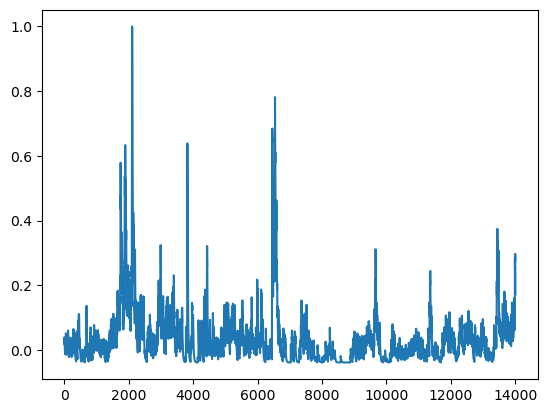

In [ ]:
plt.plot(Pre_Trace1[10])

In [ ]:
for i in range(0,7000,600):
    plt.axvline(x=i, c='r')
plt.plot(Spre)
plt.plot(Spre1)

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
Pos_x=np.linspace(0,12,len(Pos_Trace[0]))

nrm=(Pos_Trace[Pos_idx]/Pos_Trace[Pos_idx].std()).mean()
#plt.plot(Pos_x,Pos_Trace[9]*nrm)
plt.plot(Pos_x,nrm*np.ones(len(Pos_x)))
for i in range(len(Pos_Trace)):
    plt.plot(Pos_x[164:-350:10],(Pos_Trace[i][164:-350:10]-Pos_Trace[i][164:-350:10].min())*nrm)
for i in range(0,24,1):
    if i%2==0:
        ax.axvspan(i/2,(i/2)+0.5,facecolor='#9999',alpha=0.5)

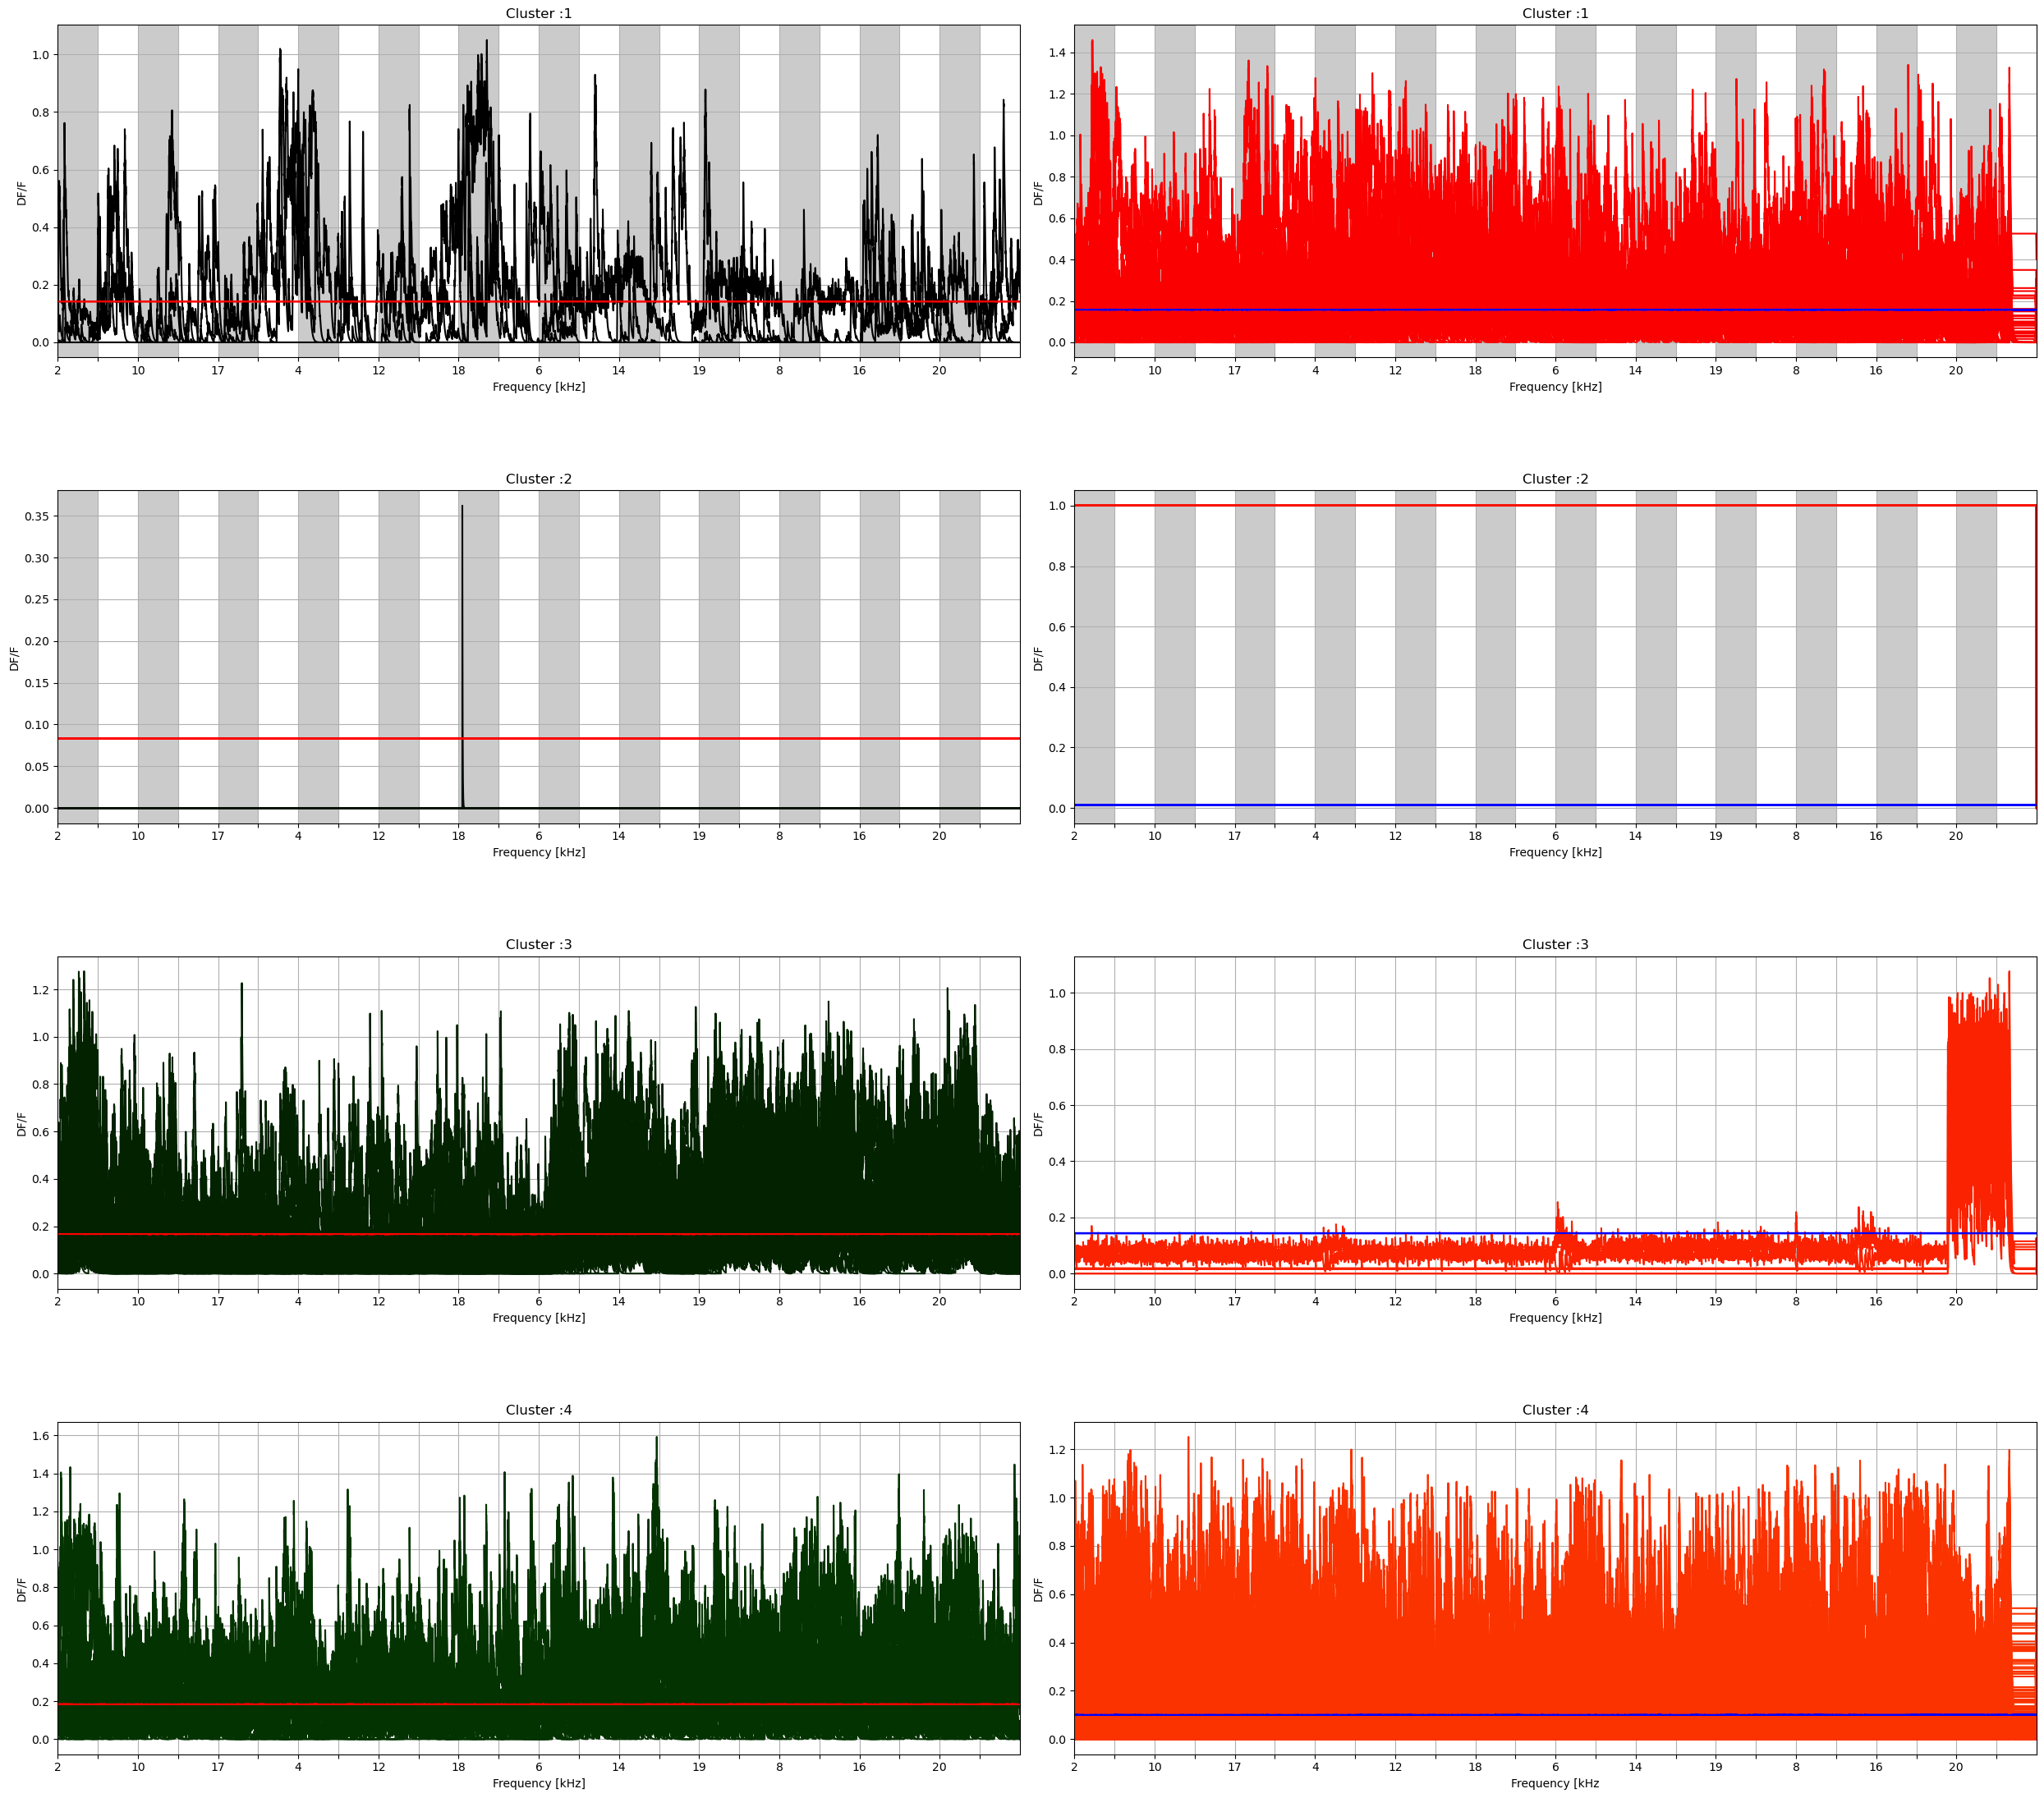

In [ ]:
%matplotlib inline

fig,ax=plt.subplots(4,2,figsize=(25,22))
#Griding
ax[0,0].grid(),ax[1,0].grid(),ax[2,0].grid(),ax[3,0].grid()
ax[0,1].grid(),ax[1,1].grid(),ax[2,1].grid(),ax[3,1].grid()
ax[0,0].set_xlim(1,12),ax[1,0].set_xlim(1,12),ax[2,0].set_xlim(1,12),ax[3,0].set_xlim(1,12)
ax[0,1].set_xlim(1,12),ax[1,1].set_xlim(1,12),ax[2,1].set_xlim(1,12),ax[3,1].set_xlim(1,12)

ax[0,0].set_xticks(Ttick),ax[1,0].set_xticks(Ttick),ax[2,0].set_xticks(Ttick),ax[3,0].set_xticks(Ttick)
ax[0,1].set_xticks(Ttick),ax[1,1].set_xticks(Ttick),ax[2,1].set_xticks(Ttick),ax[3,1].set_xticks(Ttick)

ax[0,0].set_xticklabels(protocol),ax[1,0].set_xticklabels(protocol),ax[2,0].set_xticklabels(protocol),ax[3,0].set_xticklabels(protocol)
ax[0,1].set_xticklabels(protocol),ax[1,1].set_xticklabels(protocol),ax[2,1].set_xticklabels(protocol),ax[3,1].set_xticklabels(protocol)

ax[0,0].set_xlabel('Frequency [kHz]'),ax[1,0].set_xlabel('Frequency [kHz]'),ax[2,0].set_xlabel('Frequency [kHz]'),ax[3,0].set_xlabel('Frequency [kHz]')
ax[0,1].set_xlabel('Frequency [kHz]'),ax[1,1].set_xlabel('Frequency [kHz]'),ax[2,1].set_xlabel('Frequency [kHz]'),ax[3,1].set_xlabel('Frequency [kHz')

ax[0,0].set_ylabel('DF/F'),ax[1,0].set_ylabel('DF/F'),ax[2,0].set_ylabel('DF/F'),ax[3,0].set_ylabel('DF/F')
ax[0,1].set_ylabel('DF/F'),ax[1,1].set_ylabel('DF/F'),ax[2,1].set_ylabel('DF/F'),ax[3,1].set_ylabel('DF/F')

for j,k in enumerate(PreClusters):
    for i in k:
        if j < ax.shape[0] and 0 < ax.shape[1]:
            ax[j,0].plot(Pre_x,Pre_Trace[i][963::]-Pre_Trace[i][963::].min(),c=f'#0{j}{j}{j}00')
            ax[j,0].plot(Pre_x,(Pre_Trace[Pre_C[j]].std())*np.ones(len(Pre_x)),c='r')
            ax[j,0].set_title(f'Cluster :{j+1}')

for j,k in enumerate(PosClusters):
    for i in k:
        if j < ax.shape[0] and 1 < ax.shape[1]:
            ax[j,1].plot(Pos_x,Pos_Trace[i][164::]-Pos_Trace[i][164::].min(),c=f'#FA{j}{j}00')
            ax[j,1].plot(Pos_x,(Pos_Trace[Pos_C[j]].std())*np.ones(len(Pos_x)),c='b')
            ax[j,1].set_title(f'Cluster :{j+1}')

for i in range(0,24,1):
    if i%2==0:
        ax[0,0].axvspan(i/2,(i/2)+0.5,facecolor='#9999',alpha=0.5)
        ax[0,1].axvspan(i/2,(i/2)+0.5,facecolor='#9999',alpha=0.5)
        ax[1,0].axvspan(i/2,(i/2)+0.5,facecolor='#9999',alpha=0.5)
        ax[1,1].axvspan(i/2,(i/2)+0.5,facecolor='#9999',alpha=0.5)
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)


In [ ]:
matches

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(25,22))
ax.plot(Pre_x[::600], Pre_Trace[10][::600],c='b',marker='o')
ax.plot(Pos_x[::366], Pos_Trace[3][::366],c='y',marker='x')
ax.set_xlabel('protocol [s]')
ax.set_ylabel('DF/F')
ax.set_title('Comparative Neurons')
ax.legend(['Pre','Pos'])
ax.grid()
plt.setp(ax, xticks=np.arange(0,12,0.5), xticklabels=protocol)
plt.show()

In [ ]:
sile=np.array([])
fig=plt.figure(figsize=(25,10))
plt.plot(Pre_x,Pre_Trace[55][::])
for i in range(0,14000,600):
    plt.axvline(x=i/1000, c='r')


In [ ]:

fig,ax=plt.subplots(12,3,figsize=(25,22))
for i, j in enumerate(PreClusters2):
    if len(j)==0:
        continue
    else:
        for k in j:
            ax[i,0].plot(Pre_x[963::10],Pre_Trace[k][963::10]-Pre_Trace[k][963::10].min())
            ax[i,0].plot(Pre_x,(Pre_Trace[Pre_C2[i]].std())*np.ones(len(Pre_x)),c='r')
            ax[i,0].set_title(f'Cluster :{i+1}')
for i, j in enumerate(PreClusters4):
    if len(j)==0:
        continue
    else:
        for k in j:
            ax[i,1].plot(Pre_x[963::10],Pre_Trace[k][963::10]-Pre_Trace[k][963::10].min())
            ax[i,1].plot(Pre_x,(Pre_Trace[Pre_C4[i]].std())*np.ones(len(Pre_x)),c='r')
            ax[i,1].set_title(f'Cluster :{i+1}')
for i, j in enumerate(PreClusters12):
    if len(j)==0:
        continue
    else:
        for k in j:
            ax[i,2].plot(Pre_x[963::10],Pre_Trace[k][963::10]-Pre_Trace[k][963::10].min())
            ax[i,2].plot(Pre_x,(Pre_Trace[Pre_C12[i]].std())*np.ones(len(Pre_x)),c='r')
            ax[i,2].set_title(f'Cluster :{i+1}')
        plt.show()

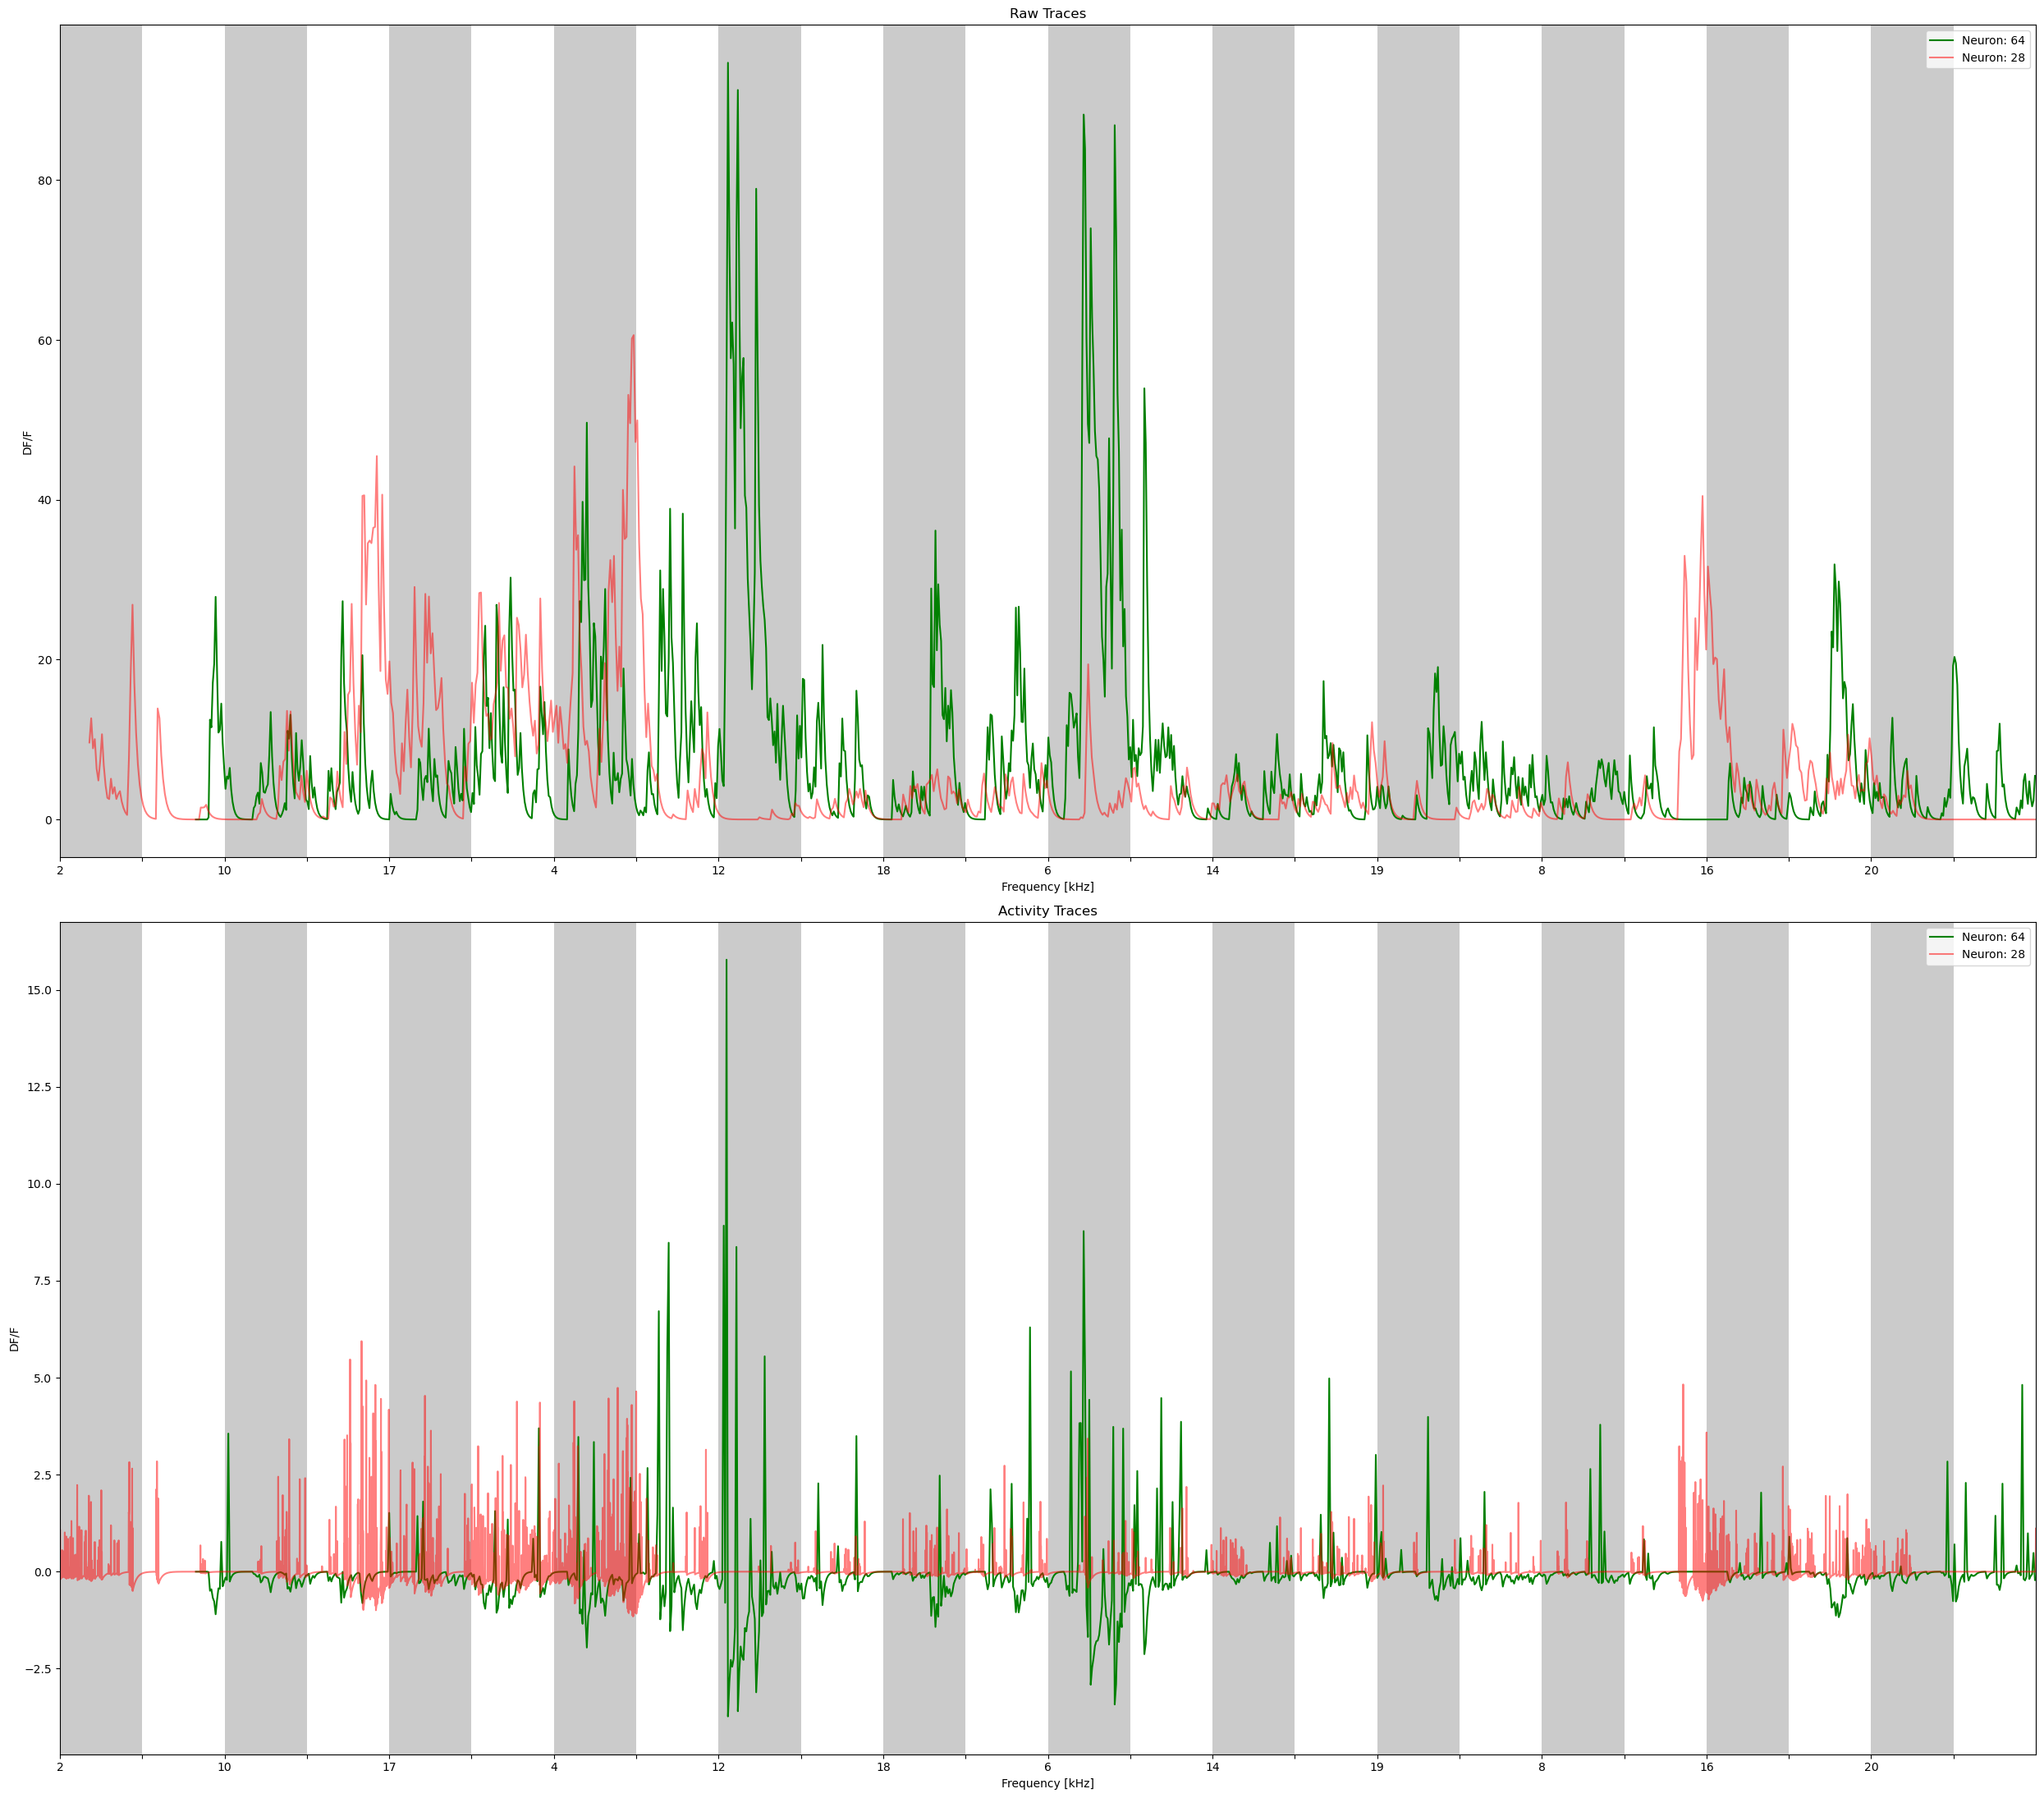

In [ ]:
PreActivity = np.diff(Pre_Trace[:])
PosActivity = np.diff(Pos_Trace[:])
PreActivity.shape
index=18
Pre_x=np.linspace(0,12,len(Pre_Trace[0]))
Pos_x=np.linspace(0,12,len(Pos_Trace[0]))
fig,ax=plt.subplots(2,1,figsize=(25,22))


ax[1].plot(Pre_x[963::10],PreActivity[matches[index][0]][963::10]/Pre_Trace[matches[index][0]][963::10].mean(),c='g')
ax[1].plot(Pos_x[1::],(PosActivity[matches[index][1]][::])/Pos_Trace[matches[index][1]][1::].mean(),c='r',alpha=0.5)

ax[0].plot(Pre_x[963::10],Pre_Trace[matches[index][0]][963::10]-Pre_Trace[matches[index][0]][963::10].min(),c='g')
ax[0].plot(Pos_x[164::10],Pos_Trace[matches[index][1]][164::10]-Pos_Trace[matches[index][1]][164::10].min(),alpha=0.5,c='r')



ax[0].set_title('Raw Traces')
ax[0].set_xlabel('Frequency [kHz]')
ax[0].set_ylabel('DF/F')
ax[0].legend([f'Neuron: {matches[index][0]}',f'Neuron: {matches[index][1]}'])

ax[0].set_xticks(Ttick)
ax[0].set_xticklabels(protocol)
ax[0].set_xlim(0,12)

ax[1].set_title('Activity Traces')
ax[1].set_xlabel('Frequency [kHz]')
ax[1].set_ylabel('DF/F')
ax[1].legend([f'Neuron: {matches[index][0]}',f'Neuron: {matches[index][1]}'])
ax[1].set_xticks(Ttick)
ax[1].set_xticklabels(protocol)
ax[1].set_xlim(0,12)

for i in range(0,24,1):
    if i%2==0:
        ax[0].axvspan(i/2,(i/2)+0.5,facecolor='#9999',alpha=0.5)
        ax[1].axvspan(i/2,(i/2)+0.5,facecolor='#9999',alpha=0.5)
plt.tight_layout()
#plt.savefig(f"F:/IC/caimandata/Activity.svg",format='svg')


In [ ]:
matches

In [ ]:
from sklearn.decomposition import PCA

fig,ax=plt.subplots(1,2,figsize=(20,16))
scaler = StandardScaler()
Pos_Trace_scaled = scaler.fit_transform(Pos_Trace)
Pre_Trace_scaled = scaler.fit_transform(Pre_Trace)
# Assume X is your data
pca = PCA(n_components=3)  # Reduce to 2 dimensions
PreX_pca = pca.fit_transform(Pre_Trace_scaled)
PosX_pca = pca.fit_transform(Pos_Trace_scaled)


PreX_pcaexplained_variance_ratio = pca.explained_variance_ratio_
PosX_pcaexplained_variance_ratio = pca.explained_variance_ratio_

Pren_components=np.arange(1,len(PreX_pcaexplained_variance_ratio)+1)
Posn_components=np.arange(1,len(PosX_pcaexplained_variance_ratio)+1)

ax[0].scatter(PreX_pca[:,0], PreX_pca[:,1],cmap='viridis',c=APrelabels )
ax[1].scatter(PosX_pca[:,0],PosX_pca[:,1],cmap='viridis',c=APoslabels)
ax[0].set_title('Pre')
ax[1].set_title('Pos')
ax[0].set_xlabel('PCA 1')
ax[0].set_ylabel('PCA 2')
ax[1].set_xlabel('PCA 1')
ax[1].set_ylabel('PCA 2')


plt.show()
plt.plot(Pren_components, PreX_pcaexplained_variance_ratio, 'go-')
plt.plot(Posn_components,PosX_pcaexplained_variance_ratio,'r-*')

plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()
print(f'PReX:{PreX_pcaexplained_variance_ratio}\n PosX:{PosX_pcaexplained_variance_ratio}')

PReX:[0.83359627 0.02045496 0.01438618]
 PosX:[0.83359627 0.02045496 0.01438618]


In [ ]:

from mpl_toolkits.mplot3d import Axes3D
angle_of_view=10

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=angle_of_view, azim=90)

# Scatter plot the PCA results
ax.scatter(PreX_pca[:,0], PreX_pca[:, 1], PreX_pca[:, 2],c=APrelabels, cmap='viridis', label='Pre', s=50)

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D Plot')

# Show the plot
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
angle_of_view=15

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=angle_of_view, azim=55)

# Scatter plot the PCA results
ax.scatter(PosX_pca[:,0], PosX_pca[:, 1], PosX_pca[:, 2],c=APoslabels, cmap='viridis', label='Pre', s=50)

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D Plot')

In [ ]:
#sns.histplot(PreX_pca[:,0],PreX_pca[:,1],kde=True)#bins=(int(round(1 + 3.22*np.log(len(PreX_pca)))))
plt.hist(PreX_pca[:,0])
plt.hist(PreX_pca[:,1])
plt.hist(PreX_pca[:,2])

In [ ]:
Pre_C12

In [ ]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=.95)+1
plt.plot(cumsum)
plt.vlines(d,0,1,colors='r',linestyles='dashed')
plt.hlines(.95,0,120,colors='r',linestyles='dashed')
print(f'PreX:{d}')

## Vizualization of cluster

In [ ]:
%matplotlib Qt
fig,ax=plt.subplots(2,2,figsize=(20,10))
sns.heatmap(Pre_Trace[np.argsort(APrelabels2)],vmin=Pre_Trace[np.argsort(APrelabels2)].min(), vmax=Pre_Trace[np.argsort(APrelabels2)].max(), cmap='hot',ax=ax[0,0])
sns.heatmap(Pos_Trace[np.argsort(APoslabels2)][164::],vmin=Pos_Trace[np.argsort(APoslabels2)].min(), vmax=250, cmap='hot',ax=ax[1,0])
sns.heatmap(Pre_Trace[np.argsort(CPrelabels2)],vmin=Pre_Trace[np.argsort(CPrelabels2)].min(), vmax=Pre_Trace[np.argsort(CPrelabels2)].max(), cmap='hot',ax=ax[0,1])
sns.heatmap(Pos_Trace[np.argsort(CPoslabels2)][164::],vmin=Pos_Trace[np.argsort(CPoslabels2)].min(), vmax=250, cmap='hot',ax=ax[1,1])
ax[0,0].set_title('Pre 2 Clusters')
ax[1,0].set_title('Pos 2 Clusters')
ax[0,1].set_title('Pre Caiman 2 Clusters')
ax[1,1].set_title('Pos Caiman 2 Clusters')

Text(0.5, 1.0, 'Pos Caiman 2 Clusters')

In [ ]:
%matplotlib Qt
fig,ax=plt.subplots(2,1,figsize=(20,10))
sns.heatmap(Pre_Trace[np.argsort(CPrelabels2)],vmin=20, vmax=500, cmap='hot',ax=ax[0])
sns.heatmap(Pos_Trace[np.argsort(CPoslabels2)][164::],vmin=0, vmax=250, cmap='hot',ax=ax[1])

In [ ]:
%matplotlib Qt
fig,ax=plt.subplots(2,3,figsize=(20,10))
sns.heatmap(Pre_Trace[np.argsort(Prelabels)], vmin=Pre_Trace.std(), vmax=1, cmap='hot', ax=ax[0,0])
sns.heatmap(Pre_Trace[np.argsort(Prelabels1)], vmin=Pre_Trace.std(), vmax=1, cmap='hot', ax=ax[0,1])
sns.heatmap(Pre_Trace[np.argsort(Prelabels2)], vmin=Pre_Trace.std(), vmax=1, cmap='hot', ax=ax[0,2])
sns.heatmap(Pos_Trace[np.argsort(Poslabels)], vmin=Pos_Trace.std(), vmax=1, cmap='hot',ax=ax[1,0])
sns.heatmap(Pos_Trace[np.argsort(Poslabels1)], vmin=Pos_Trace.std(), vmax=1, cmap='hot',ax=ax[1,1])
sns.heatmap(Pos_Trace[np.argsort(Prelabels2)], vmin=Pos_Trace.std(), vmax=1, cmap='hot', ax=ax[1,2])
ax[0,0].set_title('Pre 12 Clusters ')
ax[0,1].set_title('Pre 4 Clusters ')
ax[0,2].set_title('Pre 4 Clusters ')
ax[1,0].set_title('Pos 12 Clusters ')
ax[1,1].set_title('Pos 4 Clusters ')
ax[1,2].set_title('Pos 4 Clusters ')

NameError: name 'Prelabels' is not defined

In [ ]:
%matplotlib inline
fig,ax=plt.subplots(2,1)
sns.heatmap(np.corrcoef(Pre_Trace[Pre_C12[1]]), cmap='hot',ax=ax[0])
sns.heatmap(np.corrcoef(Pos_Trace[Pos_C12[8]]), cmap='hot',ax=ax[1])


In [ ]:
gs = gridspec.GridSpec(2, 2)

# Create a figure
fig = plt.figure()
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 2], height_ratios=[2, 1])
# Add subplots to the figure using the gridspec
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

In [ ]:
image_path = r'F:/IC/caimandata/posPnrResult.jpg'
image_data = plt.imread(image_path)
plt.imshow(image_data)


In [ ]:
for j in PreClusters12:
    if j.size==0:
        continue
    else:
        fig,ax=plt.subplots(1,1)
        for l,i in enumerate(j):
            for k in range(len(globals()[f'idx{i}_coord'][:,0])):
                xa = globals()[f'idx{i}_coord'][k,0]
                ya = globals()[f'idx{i}_coord'][k,1]
                plt.scatter(x=xa, y=ya,s = 0.8, c=f'#10{l}{l}{l}0')

            plt.imshow(PnrPre)
            plt.title(f'Cluster {l+1}')
        plt.savefig(f"F:/IC/caimandata/PRECluster{l+1}.svg",format='svg')
            #ax.plot(Pre_x,Pre_Trace[i]-Pre_Trace[i].min())
            #ax.plot(Pre_x,(Pre_Trace[Pre_C12[0]].std())*np.ones(len(Pre_x)))
            #ax.set_title(f'Cluster :{j+1}')


In [ ]:
Pre_C12

In [ ]:
Pre_CenterOfMass[Pre_C12[8][l]][1]

In [ ]:

fig,ax=plt.subplots(1,1)
for l,i in enumerate(Pre_C12[8]):
    for k in range(len(globals()[f'idx{i}_coord'][:,0])):
        xa = globals()[f'idx{i}_coord'][k,0]
        ya = globals()[f'idx{i}_coord'][k,1]
        plt.scatter(x=xa, y=ya,s = 0.8, c=f'#16{l+1}{l+2}{l}2')
    plt.annotate(f'{i}',(Pre_CenterOfMass[Pre_C12[8][l]][1],Pre_CenterOfMass[Pre_C12[8][l]][0]),(Pre_CenterOfMass[Pre_C12[8][l]][1]+5,Pre_CenterOfMass[Pre_C12[8][l]][0]-5),color='w')
    plt.imshow(PnrPos)
plt.title(f'Cluster {9}')
#ax.set_title(f'Cluster :{j+1}')
plt.savefig(f"F:/IC/caimandata/PRECluster{8}.svg",format='svg')


In [ ]:
fig,ax=plt.subplots(1,1)
for l,i in enumerate(Pre_C12[8]):
    for k in range(len(globals()[f'idx{i}_coord'][:,0])):
        xa = globals()[f'idx{i}_coord'][k,0]
        ya = globals()[f'idx{i}_coord'][k,1]
        plt.scatter(x=xa, y=ya,s = 0.8, c=f'#16{l+1}{l+2}{l}2')
    plt.annotate(f'{i}',(Pre_CenterOfMass[Pre_C12[8][l]][1],Pre_CenterOfMass[Pre_C12[8][l]][0]),(Pre_CenterOfMass[Pre_C12[8][l]][1]+5,Pre_CenterOfMass[Pre_C12[8][l]][0]-5),color='w')
    plt.imshow(PnrPos)
plt.title(f'Cluster {9}')
#ax.set_title(f'Cluster :{j+1}')
plt.savefig(f"F:/IC/caimandata/PRECluster{l+1}.svg",format='svg')

In [ ]:
for j in PosClusters12:
    if j.size==0:
        continue
    else:
        fig,ax=plt.subplots(1,1)
        for l,i in enumerate(j):
            for k in range(len(globals()[f'idx{i}_coord1'][:,0])):
                xa = globals()[f'idx{i}_coord1'][k,0]
                ya = globals()[f'idx{i}_coord1'][k,1]
                plt.scatter(x=xa, y=ya,s = 0.8, c='r',label=f'Neuron {i}')
            plt.imshow(PnrPos)
            plt.title(f'Cluster {l+1}')
        plt.savefig(f"F:/IC/caimandata/PosCluster{l+1}.svg",format='svg')

## Table

Counter({(102, 91): 10, (85, 39): 9, (115, 46): 5, (115, 55): 5, (176, 118): 5, (283, 225): 5, (41, 24): 4, (69, 24): 4, (106, 61): 4, (155, 90): 4, (205, 140): 4, (411, 416): 4, (83, 59): 3, (97, 54): 3, (113, 43): 3, (114, 53): 3, (130, 102): 3, (175, 142): 3, (184, 128): 3, (211, 156): 3, (242, 233): 3, (248, 184): 3, (250, 198): 3, (251, 193): 3, (298, 230): 3, (305, 231): 3, (417, 70): 3, (6, 429): 2, (9, 1): 2, (33, 19): 2, (64, 28): 2, (120, 66): 2, (142, 85): 2, (159, 138): 2, (171, 131): 2, (240, 214): 2, (297, 252): 2, (333, 259): 2, (339, 277): 2, (343, 295): 2, (344, 301): 2, (360, 343): 2, (377, 334): 2, (416, 26): 2, (10, 3): 1, (15, 3): 1, (16, 18): 1, (17, 13): 1, (18, 17): 1, (22, 12): 1, (28, 13): 1, (30, 9): 1, (35, 11): 1, (38, 21): 1, (39, 12): 1, (55, 24): 1, (61, 20): 1, (62, 29): 1, (67, 25): 1, (83, 432): 1, (85, 61): 1, (85, 83): 1, (85, 91): 1, (86, 50): 1, (88, 63): 1, (92, 432): 1, (97, 52): 1, (98, 50): 1, (99, 430): 1, (99, 434): 1, (102, 39): 1, (102, 83

C:\Users\IC\AppData\Local\Temp\ipykernel_12256\515479608.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  Pairscheck=[i for i in matches if np.where(CheckNeed==i[1])[0]]


         0      1
0    1.000  0.000
2    0.135  0.028
3    0.109  0.276
4    0.112  0.398
5    0.102  0.503
..     ...    ...
266  1.000  0.451
267  1.000  0.463
268  0.150  0.168
269  0.356  0.027
270  0.356  0.003

[268 rows x 2 columns]


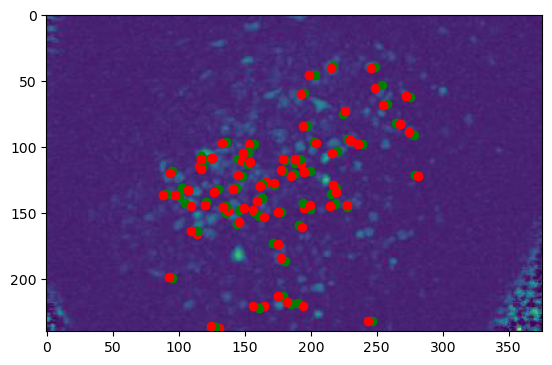

In [ ]:

dortedmathces=sorted(matches)
counted_values = Counter(dortedmathces)
print((counted_values))

matchescp=matches.copy()
matchescp=np.array(matchescp)

Pssbcheck=Counter(matchescp[:,1])
CheckNeed=np.array([])
CheckNeed=[i for i in Pssbcheck if Pssbcheck[i]<2]

print(CheckNeed)

Pairscheck=[i for i in matches if np.where(CheckNeed==i[1])[0]]
print(Pairscheck)

for i in range(len(Pairscheck)):
    plt.scatter(Pre_CenterOfMass[Pairscheck[i][0]][1],Pre_CenterOfMass[Pairscheck[i][0]][0],c='g')
    plt.scatter(Pos_CenterOfMass[Pairscheck[i][1]][1],Pos_CenterOfMass[Pairscheck[i][1]][0],c='r')
    plt.imshow(PnrPos)
#plt.savefig(f'F:/IC/CAIMANDATA/CheckNeed.svg',format='svg')


def clean_data(Astd_df):
    # Drop duplicate rows across all columns
    Astd_df = Astd_df.drop_duplicates()
    # Round columns 0, 1 (Number of decimals: 3)
    Astd_df = Astd_df.round({0: 3, 1: 3})
    return Astd_df

# Loaded variable 'Astd' from kernel state
Astd_df = pd.DataFrame(Astd if len(Astd.shape) > 2 else Astd)

Astd_df_clean = clean_data(Astd_df)
print(Astd_df_clean)


In [ ]:
for i in range(len(matches)):
    plt.scatter(Pre_CenterOfMass[matches[i][0]][1],Pre_CenterOfMass[matches[i][0]][0],c='g')
    plt.scatter(Pos_CenterOfMass[matches[i][1]][1],Pos_CenterOfMass[matches[i][1]][0],c='r')
    plt.imshow(PnrPos)
plt.savefig(f'F:/IC/CAIMANDATA/CheckNeed.svg',format='svg')

In [ ]:
Pre_Trace = fpre['estimates']['C']#[np.unique(PreNormalNeurons)]
Pos_Trace= fpos['estimates']['C']#[np.unique(PosNormalNeurons)]
Pos_Trace = np.hstack((Pos_Trace, np.zeros((435, 1))))

# Convert the raw traces to a feature matrix
PreX = np.vstack((Pre_Trace[indices_0],Pos_Trace[indices_1]))
#PosX = np.vstack(Pos_Trace)
# Perform K-means clustering with 11 clusters
kmeans = KMeans(n_clusters=12, random_state=0).fit(PreX)
#Poskmeans = KMeans(n_clusters=12, random_state=0).fit(PosX)
# Assign each raw trace to a cluster
alabels = kmeans.predict(PreX)
#Poslabels = Poskmeans.predict(PosX)
# Create a matrix where each row corresponds to a raw trace and each column corresponds to a cluster
aPrecluster_matrix = np.zeros((len(PreX), 12))
#Poscluster_matrix = np.zeros((len(Pos_Trace), 12))
for i in range(len(Pre_Trace)):
    aPrecluster_matrix[i, alabels[i]] = 1
#for i in range(len(Pos_Trace)):
    #Poscluster_matrix[i, Poslabels[i]] = 1

In [ ]:
matchesdf = pd.DataFrame(index=range(len(dortedmathces)), columns=['Pair','Cluster_Pre','Cluster_Pos','Pre_CoM','Pos_CoM','Pre_max','Pos_max','Pre_activity','Pos_activity','gain','Gain activity','Pre_Mean','Pos_Mean','Pre_Std','Pos_Std','Pre_CV','Pos_CV','Pre_Skew','Pos_Skew','Pre_Kurt','Pos_Kurt'])
#Paramcheck= pd.DataFrame(index=range(len(Pairscheck)),columns=['Pair','Pre_data_max','Pos_data_max','Pre_data_activity','Pos_data_activity'])

for i in range(len(dortedmathces)):
  matchesdf['Pair'][i]=dortedmathces[i]

  matchesdf['Pre_max'][i]=round((Pre_Trace[dortedmathces[i][0]]-Pre_Trace[dortedmathces[i][0]].min()).max(),1)
  matchesdf['Pos_max'][i]=round((Pos_Trace[dortedmathces[i][1]]-Pos_Trace[dortedmathces[i][1]].min()).max(),1)

  matchesdf['Pre_activity'][i]=round(abs(np.diff(Pre_Trace[dortedmathces[i][0]][963::10])).mean(),1)
  matchesdf['Pos_activity'][i]=round(abs(np.diff(Pos_Trace[dortedmathces[i][1]][164::10])).mean(),1)

  matchesdf['gain'][i]=round(matchesdf['Pos_max'][i]/matchesdf['Pre_max'][i],1)
  matchesdf['Gain activity'][i]=round(matchesdf['Pos_activity'][i]/matchesdf['Pre_activity'][i],1)

  matchesdf['Pre_CoM'][i]=Pre_CenterOfMass[dortedmathces[i][0]]
  matchesdf['Pos_CoM'][i]=Pos_CenterOfMass[dortedmathces[i][1]]

  matchesdf['Cluster_Pre'][i]=PreClustersNames[[index for index, sublist in enumerate(PreClusters) if dortedmathces[i][0] in sublist][0]]
  matchesdf['Cluster_Pos'][i]=PosClustersNames[[index for index, sublist in enumerate(PosClusters) if dortedmathces[i][1] in sublist][0]]

  matchesdf['Pre_Mean'][i]=round(Pre_Trace[dortedmathces[i][0]].mean(),1)
  matchesdf['Pos_Mean'][i]=round(Pos_Trace[dortedmathces[i][1]].mean(),1)

  matchesdf['Pre_Std'][i]=round(Pre_Trace[dortedmathces[i][0]].std(),1)
  matchesdf['Pos_Std'][i]=round(Pos_Trace[dortedmathces[i][1]].std(),1)

  matchesdf['Pre_CV'][i]=round(Pre_Trace[dortedmathces[i][0]].std()/Pre_Trace[dortedmathces[i][0]].mean(),1)
  matchesdf['Pos_CV'][i]=round(Pos_Trace[dortedmathces[i][1]].std()/Pos_Trace[dortedmathces[i][1]].mean(),1)

  matchesdf['Pre_Skew'][i] = round(skew(Pre_Trace[dortedmathces[i][0]]), 1)
  matchesdf['Pos_Skew'][i] = round(skew(Pos_Trace[dortedmathces[i][1]]), 1)

  matchesdf['Pre_Kurt'][i] = round(kurtosis(Pre_Trace[dortedmathces[i][0]]), 1)
  matchesdf['Pos_Kurt'][i] = round(kurtosis(Pos_Trace[dortedmathces[i][1]]), 1)

display(matchesdf)


matchesdf.to_csv('Matches.csv',sep=',') # Save matchesdf as CSV file


C:\Users\IC\AppData\Local\Temp\ipykernel_12256\1179809647.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  matchesdf['Pair'][i]=dortedmathces[i]
C:\Users\IC\AppData\Local\Temp\ipykernel_12256\1179809647.py:7: FutureWarning: ChainedAssignm

Pair Cluster_Pre Cluster_Pos  \
0      (6, 429)      Pre_C7      Pos_C2   
1      (6, 429)      Pre_C7      Pos_C2   
2        (9, 1)      Pre_C7      Pos_C2   
3        (9, 1)      Pre_C7      Pos_C2   
4       (10, 3)      Pre_C9      Pos_C5   
..          ...         ...         ...   
266   (417, 70)      Pre_C5     Pos_C11   
267   (417, 70)      Pre_C5     Pos_C11   
268   (419, 70)      Pre_C7     Pos_C11   
269  (419, 232)      Pre_C7      Pos_C5   
270   (421, 99)      Pre_C3      Pos_C2   

                                     Pre_CoM  \
0    [20.916111953247317, 9.630921526140133]   
1    [20.916111953247317, 9.630921526140133]   
2    [0.4437934825076289, 2.710498577648469]   
3    [0.4437934825076289, 2.710498577648469]   
4    [68.64581724369464, 181.91158410687012]   
..                                       ...   
266   [129.9385703878504, 146.5205115031485]   
267   [129.9385703878504, 146.5205115031485]   
268   [131.048659436358, 143.06413162191052]   
269   [131.048659436358, 143.06413162191052]   
270  [118.80358106494043, 158.9925072688192]   

                                      Pos_CoM Pre_max Pos_max Pre_activity  \
0       [20.6713652368429, 8.352109096440357]     1.5    11.3          0.0   
1       [20.6713652368429, 8.352109096440357]     1.5    11.3          0.0   
2      [1.425655251135012, 2.350377381522119]     0.0     0.1          0.0   
3      [1.425655251135012, 2.350377381522119]     0.0     0.1          0.0   
4     [66.97027584083449, 181.96287106091677]   282.5   171.8          7.5   
..                                        ...     ...     ...          ...   
266  [130.15174660801136, 147.52824098324544]   193.4   108.3         12.3   
267  [130.15174660801136, 147.52824098324544]   193.4   108.3         12.3   
268  [130.15174660801136, 147.52824098324544]   235.2   108.3          4.8   
269  [131.38361135966656, 140.68857187533928]   235.2    87.8          4.8   
270  [119.79102909674093, 161.11902353464723]   679.8    55.1         27.0   

    Pos_activity gain  ... Pre_Mean Pos_Mean Pre_Std Pos_Std Pre_CV Pos_CV  \
0            0.1  7.5  ...      0.1      1.5     0.0     1.5    0.2    1.0   
1            0.1  7.5  ...      0.1      1.5     0.0     1.5    0.2    1.0   
2            0.0  inf  ...      0.0      0.1     0.0     0.0    0.0    0.0   
3            0.0  inf  ...      0.0      0.1     0.0     0.0    0.0    0.0   
4            9.4  0.6  ...      8.8     13.8    23.5    27.4    2.7    2.0   
..           ...  ...  ...      ...      ...     ...     ...    ...    ...   
266          5.0  0.6  ...     27.0      8.9    36.8    14.2    1.4    1.6   
267          5.0  0.6  ...     27.0      8.9    36.8    14.2    1.4    1.6   
268          5.0  0.5  ...      2.4      8.9    16.3    14.2    6.8    1.6   
269          4.3  0.4  ...      2.4      6.3    16.3    12.1    6.8    1.9   
270          1.3  0.1  ...     82.8      1.4   114.3     6.2    1.4    4.6   

    Pre_Skew Pos_Skew Pre_Kurt Pos_Kurt  
0       33.7      3.8   1277.8     13.2  
1       33.7      3.8   1277.8     13.2  
2        NaN   -104.9      NaN  10995.0  
3        NaN   -104.9      NaN  10995.0  
4        3.8      1.6     22.0      2.9  
..       ...      ...      ...      ...  
266      0.8      1.9     -0.1      5.2  
267      0.8      1.9     -0.1      5.2  
268      5.9      1.9     47.8      5.2  
269      5.9      2.0     47.8      5.2  
270      1.2      3.3      1.0     14.7  

[271 rows x 21 columns]

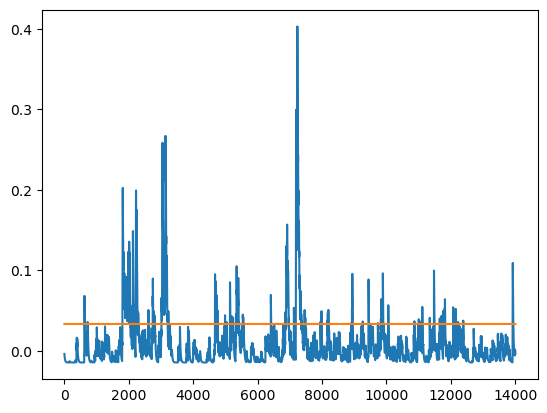

In [ ]:
Prenomr=Pre_Trace[indices_0]/Pre_Trace[indices_0].max()
Posnorm=Pos_Trace[indices_1]/Pos_Trace[indices_1].max()
plt.plot(Prenomr[5])
plt.plot(np.ones(len(Prenomr[3]))*Prenomr[5].std())

Mean activity: 0    0.189604
1    0.244761
dtype: float64 
 Std activity: 0    0.179934
1    0.219547
dtype: float64


<BarContainer object of 268 artists>

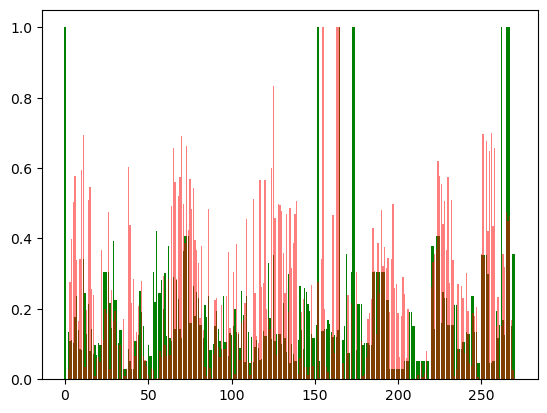

In [ ]:
print(f'Mean activity: {Astd_df_clean.mean()} \n Std activity: {Astd_df_clean.std()}')
plt.bar(Astd_df_clean.index, Astd_df_clean[0], color='g', label='Pre')
plt.bar(Astd_df_clean.index, Astd_df_clean[1], color='r',alpha=0.5, label='Pos')

<Axes: >

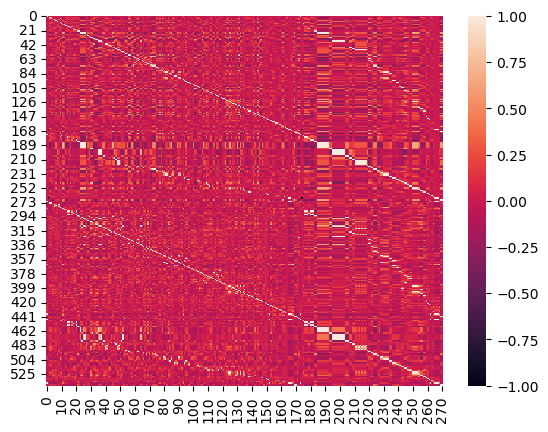

In [ ]:
a=np.corrcoef(Pre_Trace[indices_0])
b=np.corrcoef(Pos_Trace[indices_1])
c=np.vstack((a,b))
sns.heatmap(c)
#print(f'{a}\n{b}\n{c}')

c:\Users\IC\anaconda3\envs\caiman\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\IC\anaconda3\envs\caiman\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: >

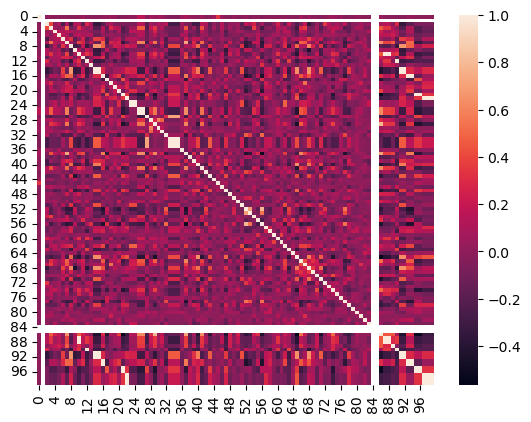

In [ ]:
sns.heatmap(np.corrcoef(Pre_Trace[indices_0[np.where(Astd_df_clean[0]<=Astd_df_clean[1])[0]]]))

<Axes: >

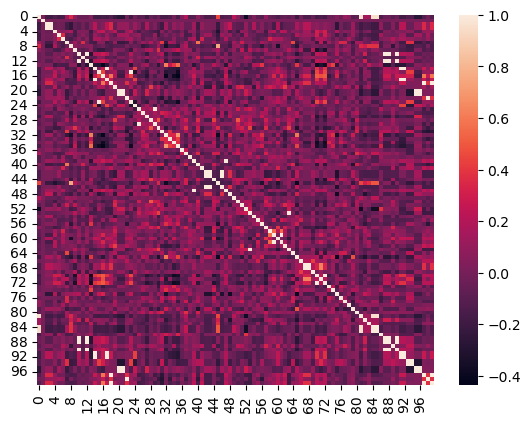

In [ ]:
sns.heatmap(np.corrcoef(Pos_Trace[indices_1[np.where(Astd_df_clean[0]<=Astd_df_clean[1])[0]]]))
#np.where(indices_0[Astd_df_clean[0]<Astd_df_clean[1]])

In [ ]:
sns.heatmap(matchesdf.iloc[:,15:17])

In [ ]:
for k in range(len(globals()[f'idx{index}_coord'][:,0])):
      xa = globals()[f'idx{index}_coord'][k,0]
      ya = globals()[f'idx{index}_coord'][k,1]
      plt.scatter(x=xa, y=ya,s = 0.8, c='g')
      plt.annotate(f"Match {match}", (Pre_CenterOfMass[match[0]][1], Pre_CenterOfMass[match[0]][0]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='black')

for select in PosClusters:
  for index in (select):
    index=int(index)
    for k in range(len(globals()[f'idx{index}_coord1'][:,0])):
      xa = globals()[f'idx{index}_coord1'][k,0]
      ya = globals()[f'idx{index}_coord1'][k,1]
      plt.scatter(x=xa, y=ya,s = 0.8, c='r')
      plt.annotate(f"Match {match}", (Pre_CenterOfMass[match[0]][1], Pre_CenterOfMass[match[0]][0]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='black')
plt.imshow(PnrPre)

In [ ]:
for j in PreClusters12:
    if j.size==0:
        continue
    elif j.size==1:
        continue
    else:
        fig,ax=plt.subplots(len(j),1,figsize=(15,len(j)*5))
        for l,i in enumerate(j):
            ax[l].plot(Pre_x[::10],Pre_Trace[i][::10]-Pre_Trace[i][::10].min())
            #ax[l].plot(Pre_x,(Pre_Trace[Pre_C12[l]].std())*np.ones(len(Pre_x)),c='r')
            ax[l].set_title(f'Neuron: {i}')
            ax[l].set_xticks(Ttick)
            ax[l].set_xticklabels(protocol)
            #ax[l].set_xlim(0,12)

            for i in range(0,24,1):
                if i%2==0:
                    ax[l].axvspan(i/2,(i/2)+0.5,facecolor='#9999',alpha=0.5)
        plt.show()
        plt.tight_layout()
        plt.title(f'Cluster {l+1}')
            #plt.savefig(f"F:/IC/caimandata/Cluster: {l+1}.svg",format='svg')
            #ax.plot(Pre_x,Pre_Trace[i]-Pre_Trace[i].min())
            #ax.plot(Pre_x,(Pre_Trace[Pre_C12[0]].std())*np.ones(len(Pre_x)))
            #ax.set_title(f'Cluster :{j+1}')

Aqui

In [ ]:
Pre_x=np.linspace(0,12,len(Pre_Trace[0]))
Pos_x=np.linspace(0,12,len(Pos_Trace[0]))

In [ ]:
%matplotlib inline
o=11
if len(Pre_C12[o])!=0:
    fig,ax=plt.subplots(2*len(Pre_C12[o][:5]),1,figsize=(15,20))
else:
    print('No Neurons in this cluster')
for l,i in enumerate(Pre_C12[o][:5]):
    ax[l*2].plot(Pre_x[::10],Pre_Trace[i][::10]-Pre_Trace[i][::10].min(),c=f'#10{l}{l}{l}0')
    ax[l*2].plot(Pre_x,(Pre_Trace[Pre_C12[o]].std())*np.ones(len(Pre_x)),c='r')
    ax[l*2].set_title(f'Neuron: {i}')
    ax[l*2].set_xticks(Ttick)
    ax[l*2].set_xticklabels(protocol)
    #ax[l].set_xlim(0,12)
    ax[l*2].set_ylabel('Fluorescence [AU]')
    ax[l*2].set_xlabel('Frequency [kHz]')
    for j in matches:
        if i==j[0]:
            ax[l*2+1].plot(Pos_x,(Pos_Trace[j[1]].std())*np.ones(len(Pos_x)),c='r')
            ax[l*2+1].plot(Pos_x[::10],Pos_Trace[j[1]][::10]-Pos_Trace[j[1]][::10].min(),c=f'#99{l}{l}{l}0')
            ax[l*2+1].set_title(f'Neuron: {j[1]}')
            ax[l*2+1].set_xticks(Ttick)
            ax[l*2+1].set_xticklabels(protocol)
            #ax[l].set_xlim(0,12)
            ax[l*2+1].set_ylabel('Fluorescence [AU]')
            ax[l*2+1].set_xlabel('Frequency [kHz]')
            for i in range(24):
                if i%2==0:
                    ax[l*2+1].axvspan(i/2,(i/2)+0.5,facecolor='#9999',alpha=0.5)
                    ax[l*2].axvspan(i/2,(i/2)+0.5,facecolor='#9999',alpha=0.5)


plt.tight_layout()
plt.subplots_adjust(hspace=0.7)
#plt.savefig(f"F:/IC/caimandata/Cluster{o}Trace.svg",format='svg')
plt.show()

No Neurons in this cluster


<Figure size 640x480 with 0 Axes>

## Beauty overlap

In [ ]:

##
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 8))


for k in range(len(globals()[f'idx{Pair[0]}_coord'][:,0])):
      xa = globals()[f'idx{Pair[0]}_coord'][k,0]
      ya = globals()[f'idx{Pair[0]}_coord'][k,1]
      ax1.scatter(x=xa, y=ya,s = 0.8, c='g')
      #ax1.annotate(f"Cell {Pair[0]}", (Pre_CenterOfMass[Pair[0]][1], Pre_CenterOfMass[Pair[0]][0]), textcoords="offset points", xytext=(10, 10), ha='center', fontsize=8, color='black')
ax1.set_title('Pre Trauma cell position')
ax1.imshow(PnrPre)

#ndex=int(3)
for k in range(len(globals()[f'idx{Pair[1]}_coord1'][:,0])):
      xa = globals()[f'idx{Pair[1]}_coord1'][k,0]
      ya = globals()[f'idx{Pair[1]}_coord1'][k,1]
      ax2.scatter(x=xa, y=ya,s = 0.8, c='r')
      #ax2.annotate(f"Cell {Pair[1]}", (Pos_CenterOfMass[Pair[1]][1], Pos_CenterOfMass[Pair[1]][0]), textcoords="offset points", xytext=(10, 10), ha='center', fontsize=8, color='black')
ax2.set_title('Pos Trauma cell position')
ax2.imshow(PnrPos)


#index=int(10)
for k in range(len(globals()[f'idx{Pair[0]}_coord'][:,0])):
      xa = globals()[f'idx{Pair[0]}_coord'][k,0]
      ya = globals()[f'idx{Pair[0]}_coord'][k,1]
      ax3.scatter(x=xa, y=ya,s = 0.8, c='g')
ax3.imshow(PnrPre)
index=int(3)
for k in range(len(globals()[f'idx{Pair[1]}_coord1'][:,0])):
      xa = globals()[f'idx{Pair[1]}_coord1'][k,0]
      ya = globals()[f'idx{Pair[1]}_coord1'][k,1]
      ax3.scatter(x=xa, y=ya,s = 0.8, c='r')
      #ax3.annotate(f"Cell {Pair}", (Pos_CenterOfMass[Pair[1]][1], Pos_CenterOfMass[Pair[1]][0]), textcoords="offset points", xytext=(10, 10), ha='center', fontsize=8, color='w')
ax3.set_title('Pre and Pos Trauma position overlapped')
ax3.imshow(PnrPre)
#plt.savefig(f'F:/IC/CAIMANDATA/Overlaped.sv$g',format='svg')
plt.show()


In [ ]:
print(len(np.unique(PossiblePre_idx))/len(PossiblePre_idx))
print(len(Pre_idx)/len(Pos_idx))

print(len(np.unique(PossiblePos_idx))/len(PossiblePos_idx))


print(f"Values:\n{len(not_repeated_values)}\n{len(repeated_values)}")

In [ ]:
import math

num_matches = len(matches)
num_rows = math.ceil(num_matches / 5)

fig, axs = plt.subplots(num_rows, 5, figsize=(20, num_rows*3))

for i, match in enumerate(matches):
    row = i // 5
    col = i % 5

    ax = axs[row, col]
    ax.scatter(Pre_CenterOfMass[match[0]][1], Pre_CenterOfMass[match[0]][0], c='g')
    ax.scatter(Pos_CenterOfMass[match[1]][1], Pos_CenterOfMass[match[1]][0], c='r')
    ax.annotate(f"Match {match}", (Pre_CenterOfMass[match[0]][1], Pre_CenterOfMass[match[0]][0]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='white')
    ax.imshow(PnrPre)

# Remove empty subplots
for i in range(num_matches, num_rows*5):
    row = i // 5
    col = i % 5
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


In [ ]:

Pre_repeated_positions = []
Pos_repeated_positions = []
for i in range(len(NewaPossible_Matches[0])):
    if NewaPossible_Matches[0][i] in NewaPossible_Matches[0][i+1:]:
        Pre_repeated_positions.append(i)
for i in range(len(NewaPossible_Matches[1])):
    if NewaPossible_Matches[1][i] in NewaPossible_Matches[1][i+1:]:
        Pos_repeated_positions.append(i)
print(Pos_repeated_positions)


In [ ]:
print(f'{len(NewaPossible_Matches[0][Pre_repeated_positions])}\n\n{len(NewaPossible_Matches[1][Pos_repeated_positions])}')


In [ ]:
PreNormalNeurons=np.array([])
PosNormalNeurons=np.array([])
for i in PossiblePre_idx:
  if len(globals()[f'idx{int(i)}_coord'][:,0])<=70:
    PreNormalNeurons=(np.append(PreNormalNeurons,int(i))).astype(int)
for i in PossiblePos_idx:
  if len(globals()[f'idx{int(i)}_coord1'][:,0])<=70:
    PosNormalNeurons=(np.append(PosNormalNeurons,int(i))).astype(int)
#print(len(PreNormalNeurons))
print((PreNormalNeurons))
print((PosNormalNeurons))


In [ ]:
test=np.where(Pre_Trace[:]==PreNormalNeurons[:])[0]
print(test)
np.unique(PreNormalNeurons)
pretes = fpre['estimates']['C'][np.unique(PreNormalNeurons)]
print(pretes)

In [ ]:
for i in PreNormalNeurons:
  testarr=np.stack(Pre_Trace[i])
print(np.shape(testarr))

In [ ]:
from sklearn.linear_model import LogisticRegression

# Combine the cluster matrices and create labels for each data point
X = np.vstack((Precluster_matrix, Poscluster_matrix))
y = np.concatenate((np.zeros(len(Pre_Trace)), np.ones(len(Pos_Trace))))

# Split the data into training and testing sets
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=95)

# Fit a logistic regression model on the training set
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
# Splitting the dataset into the Training set and Test set


# Creating a Polynomial Regression model
poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

# Predicting the output using the Test set
y_pred = lin_reg.predict(poly_reg.transform(X_test))

# Evaluating the performance of the model
r2_score(y_test, y_pred)


In [ ]:
#print(len(np.unique(NewaPossible_Matches[0])))
Pre_Trace1 = fpre['estimates']['C'][np.unique(NewaPossible_Matches[0])]

Pos_Trace1= fpos['estimates']['C'][np.unique(NewaPossible_Matches[1])]


In [ ]:

totals=np.stack((NewaPossible_Matches[0],NewaPossible_Matches[1]))
#
# Convert the raw traces to a feature matrix
PreX = np.vstack(Pre_Trace)
PosX = np.vstack(Pos_Trace)
# Perform K-means clustering with 11 clusters
Prekmeans = KMeans(n_clusters=35, random_state=0).fit(PreX)
Poskmeans = KMeans(n_clusters=35, random_state=0).fit(PosX)
# Assign each raw trace to a cluster
Prelabels = Prekmeans.predict(PreX)
Poslabels = Poskmeans.predict(PosX)
# Create a matrix where each row corresponds to a raw trace and each column corresponds to a cluster
Precluster_matrix = np.zeros((len(Pre_Trace), 35))
Poscluster_matrix = np.zeros((len(Pos_Trace), 35))
for i in range(len(Pre_Trace)):
    Precluster_matrix[i, Prelabels[i]] = 1
for i in range(len(Pos_Trace)):
    Poscluster_matrix[i, Poslabels[i]] = 1
# Create a heatmap of the cluster matrix
#

In [ ]:
for select in PreClusters:
  for index in (select):
    index=int(index)
    for k in range(len(globals()[f'idx{index}_coord'][:,0])):
      xa = globals()[f'idx{index}_coord'][k,0]
      ya = globals()[f'idx{index}_coord'][k,1]
      plt.scatter(x=xa, y=ya,s = 0.8, c='g')
      plt.annotate(f"Match {match}", (Pre_CenterOfMass[match[0]][1], Pre_CenterOfMass[match[0]][0]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='black')

for select in PosClusters:
  for index in (select):
    index=int(index)
    for k in range(len(globals()[f'idx{index}_coord1'][:,0])):
      xa = globals()[f'idx{index}_coord1'][k,0]
      ya = globals()[f'idx{index}_coord1'][k,1]
      plt.scatter(x=xa, y=ya,s = 0.8, c='r')
      plt.annotate(f"Match {match}", (Pre_CenterOfMass[match[0]][1], Pre_CenterOfMass[match[0]][0]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='black')
plt.imshow(PnrPre)

In [ ]:
tamanhoideal=np.array([])
for select in PreClusters:
  for index in (select):
    index=int(index)
    tamanhoideal=np.append(tamanhoideal,len(globals()[f'idx{index}_coord'][:,0]))
print(f'{tamanhoideal.std()+tamanhoideal.mean()}')

In [ ]:
# Convert the image to grayscale
gray = cv2.cvtColor(PnrPre-PnrPos, cv2.COLOR_BGR2GRAY)

# Apply a threshold to the grayscale image
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]

# Convert the thresholded image to binary
binary = cv2.threshold(thresh, 0, 255, cv2.THRESH_BINARY)[1]
# Display the binary image
cv2.imshow('Binary Image', binary)
cv2.waitKey(0)
cv2.destroyAllWindows()
#plt.imshow((PnrPre-PnrPos))

: 

: 

In [ ]:
indices = np.where(np.isin(Pre_C[6], Pre_idx))[0]
print(Pre_C[6][indices])
fig, axs = plt.subplots()
for index in (Pre_C[6][indices]):
    print(index)
    plt.plot(Pre_Trace[index], c='g')
    plt.show()

In [ ]:
PreSelecText=['Pre_C1', 'Pre_C2', 'Pre_C3', 'Pre_C4', 'Pre_C5', 'Pre_C6', 'Pre_C7', 'Pre_C8', 'Pre_C9', 'Pre_C10', 'Pre_C11', 'Pre_C12']
PosSelecText=['Pos_C1', 'Pos_C2', 'Pos_C3', 'Pos_C4', 'Pos_C5', 'Pos_C6', 'Pos_C7', 'Pos_C8', 'Pos_C9', 'Pos_C10', 'Pos_C11', 'Pos_C12']

select=Pre_C[1][indices]

fig, axs = plt.subplots(len(select), 1, figsize=(20, 25), constrained_layout=False)
x = np.linspace(0,12,len(Pre_Trace[0][963::10]))
for ax, index in zip(axs.flat,select):
    ax.set_title(f'ID={index}')
    ax.plot(x, Pre_Trace[index][963::10]-Pre_Trace[index][963::10].min(), lw=0.9)
    ax.set_xticks(np.arange(0,12,0.5))
    ax.set_xlim(0,12)
    ax.set_xlabel('Frequency [kHz]')
    ax.set_xticklabels(protocol)
    ax.set_ylabel('[DF/F]')
    ax.grid()
    for i in range(0, 24, 1):
        if i % 2 == 0:
            ax.axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
#fig.savefig(f"C:/Users/gabri/Desktop/Prog/LAbp/NeuroProg/Pesquisa/{PreSelecText[1]}.svg",format="svg")

In [ ]:
print(sorted(np.append(selectpre1,selectpre)))

In [ ]:
selectpre=Pre_C2[np.where(np.isin(Pre_C2, [35, 217, 227, 292, 484], assume_unique=True))[0]].astype(int)
selectpre1=Pre_C10[np.where(np.isin(Pre_C10, [24,187]))[0]]
selectpre=sorted(np.append(selectpre1,selectpre))
selectpos= Pos_C2


fig, axs = plt.subplots(len(selectpos), 2, figsize=(25, 17), constrained_layout=True)
x1 = np.linspace(0, 12, len(Pre_Trace[0][963::10]))
x2 = np.linspace(0, 12, len(Pos_Trace[0][164::10]))

for ax, index in zip(axs[:, 1].flat, selectpos):
    ax.set_title(f'ID={index}')
    ax.plot(x2, Pos_Trace[index][164::10] - Pos_Trace[index][164::10].min(), lw=0.9, c='r')
    ax.set_xticks(np.arange(0, 12, 0.5))
    ax.set_xlim(0, 12)
    ax.set_xlabel('Frequency [Hz]')
    ax.set_xticklabels(protocol)
    ax.set_ylabel('Fluorescence [Au]')
    ax.grid()
    for i in range(0, 24, 1):
        if i % 2 == 0:
            ax.axvspan(i / 2, (i / 2) + 0.5, facecolor='#9999', alpha=0.5)

for ax, indexe in zip(axs[:, 0].flat, selectpre):
    ax.set_title(f'ID={indexe}')
    ax.plot(x1, Pre_Trace[indexe][963::10] - Pre_Trace[indexe][963::10].min(), lw=0.9, c='g')
    ax.set_xticks(np.arange(0, 12, 0.5))
    ax.set_xlim(0, 12)
    ax.set_xlabel('Frequency [kHz]')
    ax.set_xticklabels(protocol)
    ax.set_ylabel('[DF/F]')
    ax.grid()
    for i in range(0, 24, 1):
        if i % 2 == 0:
            ax.axvspan(i / 2, (i / 2) + 0.5, facecolor='#9999', alpha=0.5)




In [ ]:
na=25
ao=13
fig,axs=plt.subplots(1,1,figsize=(25, 10), constrained_layout=True)
axs.plot(Pre_Trace[na][964::]-Pre_Trace[na][964::].min(),'g')
axs.plot(Pos_Trace[ao][164::]-Pos_Trace[ao][164::].min(),'r')
axs.set_xticks(np.arange(0,12,0.5))
axs.set_xlim(0,12)
axs.set_xlabel('Frequency [kHz]')
axs.set_xticklabels(protocol)
axs.set_ylabel('[DF/F]')

axs.grid()
for i in range(0, 24, 1):
    if i % 2 == 0:
        axs.axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)

plt.show()

plt.scatter(Pre_CenterOfMass[na][1],Pre_CenterOfMass[na][0],c='g')
plt.scatter(Pos_CenterOfMass[ao][1],Pos_CenterOfMass[ao][0],c='r')
plt.imshow(PnrPre)

In [ ]:
fig,axs=plt.subplots(1,1,figsize=(15, 10))
for i in matches[3:6]:
    axs.plot(x1,Pre_Trace[i[0]][963::10],'g')
    axs.plot(x2,Pos_Trace[i[1]][164::10],'r')
#plt.plot(x1,Pre_Trace[95][963::10]-Pre_Trace[95][963::10].min(), lw=0.9,c='g')
#plt.plot(x2,Pos_Trace[4][164::10]-Pos_Trace[63][164::10].min(), lw=0.9,c='r')

In [ ]:


fig, axs = plt.subplots(4, 4, figsize=(20, 20), constrained_layout=True)

for i, select in enumerate(PreClusters):
    row = i // 4
    col = i % 4
    for index in select:
        index = int(index)
        for k in range(len(globals()[f'idx{index}_coord'][:, 0])):
            xa = globals()[f'idx{index}_coord'][k, 0]
            ya = globals()[f'idx{index}_coord'][k, 1]
            axs[row, col].scatter(x=xa, y=ya, s=0.8, c='g')
            axs[row, col].set_title(f'PreCluster {i+1}')
            axs[row, col].set_xlabel('X')
            axs[row, col].set_ylabel('Y')
            #axs[row, col].set_xlim(0, image_width)  # Adjust the x-axis limits if needed
            #axs[row, col].set_ylim(0, image_height)  # Adjust the y-axis limits if needed
            axs[row, col].invert_yaxis()  # Invert the y-axis if needed
    axs[row, col].imshow(PnrPre)

plt.show()


In [ ]:
ajudst=Pos_Trace[index][-1]
print(ajudst)

In [ ]:
PreClusterMean = np.zeros((1, len(PreClusters)))
AllMean = np.vstack((AllMean, abs(Pre_Trace[index].mean())))
AllMean = np.vstack((AllMean, abs(Pos_Trace[index].mean())))


In [ ]:
print(np.shape(matches))

In [ ]:
Preshape = (1, len(Pre_Trace))
Posshape = (1, len(Pos_Trace))
PreClusterMax=np.zeros(shape)
print(PreClusterMax.shape)

In [ ]:
PosClusters12

## aqui

#### Move PRe bAse to Top

In [ ]:


for i in range(len(PreClusters12)):
  if PreClusters12[i].size==0:
    continue
  else:
    PreClusterSum=np.append(PreClusterSum,len(PreClusters12[i]))
    PreClusterSum=np.sum(PreClusterSum).astype(int)
    PosClustersSum=np.append(PosClustersSum,len(PosClusters12[i]))
    PosClustersSum=np.sum(PosClustersSum).astype(int)
for select, k in enumerate(PreClusters12):
  for index in k:
    PreClusterMean=np.append(PreClusterMean,(abs(Pre_Trace[index].mean())))
    PreClusterMax=np.append(PreClusterMax,(abs(Pre_Trace[index].max())))
    PreClusterStd=np.append(PreClusterStd,(abs(Pre_Trace[index].std())))
    PreClusterVelocity=np.append(PreClusterVelocity,(abs(np.diff(Pre_Trace[index][963::10])).mean())  )

for select,k in enumerate(PosClusters12):
  for index in k:
    PosClusterMean=np.append(PosClusterMean,(abs(Pos_Trace[index].mean())))
    PosClusterStd=np.append(PosClusterStd,(abs(Pos_Trace[index].std())))
    PosClusterMax=np.append(PosClusterMax,(abs(Pos_Trace[index].max())))
    PosClusterVelocity=np.append(PosClusterVelocity,(abs(np.diff(Pos_Trace[index][169::10])).mean()))

Result_Mean=np.append(PreClusterMean,PosClusterMean)
Result_Std=np.append(PreClusterStd,PosClusterStd)
Result_Max=np.append(PreClusterMax,PosClusterMax)
Result_MeanVelocity=np.append(PreClusterVelocity,PosClusterVelocity)

In [ ]:


fig, ax = plt.subplots(1, 4, figsize=(18, 5))
ax[0].hist(Result_Mean[np.isfinite(Result_Mean)], bins=20)
ax[0].set_xlabel('Mean')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Mean')
ax[1].hist(Result_Std[np.isfinite(Result_Std)], bins=20)
ax[1].set_xlabel('Std')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Std')
ax[2].hist(Result_Max[np.isfinite(Result_Max)], bins=20)
ax[2].set_xlabel('Max')
ax[2].set_ylabel('Frequency')
ax[2].set_title('Histogram of Max')
ax[3].hist(Result_MeanVelocity, bins=20)
ax[3].set_xlabel('Mean Activity')
ax[3].set_ylabel('Frequency')
ax[3].set_title('Histogram of Mean Activity')
print(f'{PreClusterVelocity.mean()} std: {PreClusterVelocity.std()}\n {PosClusterVelocity.mean() } std: {PosClusterVelocity.std()}')
#plt.savefig(f"C:/Users/gabri/Desktop/Prog/LAbp/NeuroProg/Pesquisa/Histogram of Mean Velocity.svg",format="svg")
plt.show()


In [ ]:
%matplotlib inline
# Define the data
periods = ['Pre Trauma', 'Pos Trauma']
mean_activities = [PreClusterVelocity.mean(), PosClusterVelocity.mean()]
std_activities = [PreClusterVelocity.std(), PosClusterVelocity.std()]

# Create the bar plot with error bars
plt.bar(periods,std_activities, yerr=mean_activities,  capsize=5)

# Add labels and title
plt.xlabel('Period')
plt.ylabel('Mean Activity')
plt.title('Comparison of Mean Activities')

# Show the plot
#plt.savefig(f"F:/IC/CAIMANDATA/Mean Activities.svg",format="svg")
plt.show()


In [ ]:
%matplotlib Qt
fig, axs = plt.subplots(len(Pre_C4), 1, figsize=(15, 16), constrained_layout=True)
x = np.linspace(0,12,len(Pre_Trace[0]))
for ax, index in zip(axs.flat,Pre_C4):
    ax.set_title(f'ID={index}')
    ax.plot(x, Pre_Trace[index], lw=0.9)
    ax.set_xticks(np.arange(0,12,0.5))
    ax.set_xlim(0,12)
    ax.set_xlabel('Frequency [Hz]')
    ax.set_xticklabels(protocol)
    ax.set_ylabel('Fluorescence [Au]')
    ax.grid()
    for i in range(0, 24, 1):
        if i % 2 == 0:
            ax.axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)

In [ ]:
plt.plot(PreClusterVelocity,c='g')
plt.plot(PosClusterVelocity,c='r')

In [ ]:
PreClusterVelocity

In [ ]:
print(f'{PreClusterVelocity.mean()}\n{PosClusterVelocity.mean()}')

In [ ]:
import numpy as np

matches_array = np.array([np.array(t) for t in matches])
matches_array


In [ ]:
Pre_Data = fpre['estimates']['S']#[np.unique(PreNormalNeurons)]
Pos_Data= fpos['estimates']['S']#[np.unique(PosNormalNeurons)]
Pos_Data = np.hstack((Pos_Data, np.zeros((435, 1))))

# Convert the raw traces to a feature matrix
#
# Convert the raw traces to a feature matrix
PreaX = np.vstack(Pre_Data)
PosaX = np.vstack(Pos_Data)
# Perform K-means clustering with 11 clusters
Preakmeans = KMeans(n_clusters=12, random_state=0).fit(PreaX)
Posakmeans = KMeans(n_clusters=12, random_state=0).fit(PosaX)
# Assign each raw trace to a cluster
Prealabels = Preakmeans.predict(PreaX)
Posalabels = Posakmeans.predict(PosaX)
# Create a matrix where each row corresponds to a raw trace and each column corresponds to a cluster
Preacluster_matrix = np.zeros((len(Pre_Data), 12))
Posacluster_matrix = np.zeros((len(Pos_Data), 12))
for i in range(len(Pre_Data)):
    Preacluster_matrix[i, Prealabels[i]] = 1
for i in range(len(Pos_Data)):
    Posacluster_matrix[i, Posalabels[i]] = 1

In [ ]:

print("Indices 0:", len(indices_0))
print("Indices 1:", len(indices_1))




In [ ]:
Pos_Trace[indices_1] += 0
Pos_Trace[indices_1].shape


In [ ]:
Pre_Trace[indices_0].reshape(-1, Pre_Trace.shape[1])

print(Pos_Trace[indices_1].shape)

In [ ]:
fig,axs=plt.subplots(1,1,figsize=(15, 15))
# Create the correlation matrix
correlation_matrix = np.corrcoef(Pre_Trace[indices_0], Pos_Trace[indices_1])

# Plot the correlation matrix
axs.imshow(correlation_matrix, cmap='coolwarm')

# Add a darker line in the middle section
axs.axvline(x=len(indices_0), color='black', linewidth=2)
axs.axhline(y=len(indices_1), color='black', linewidth=2)

axs.set_title('Correlation Matrix')
axs.set_xlabel('Pos_Trace')
axs.set_ylabel('Pre_Trace')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
# Limit Pre_Data and Pos_Data based on matches array
Pre_Data1 = Pre_Data[matches_array[:][0]]
Pos_Data2 = Pos_Data[matches_array[:][1]]
print(np.shape(Pre_Data[matches_array[:]]))


In [ ]:
matches[1]

In [ ]:
sorted_Preacluster = Preacluster_matrix[np.argsort(Prealabels)]
sorted_Posacluster = Posacluster_matrix[np.argsort(Posalabels)]
print(sorted_Preacluster)
print(sorted_Posacluster)

In [ ]:
data = Pre_Trace[13][963::10]

# Calculate the time interval between data points
time_interval = abs(np.mean(np.diff(data)))
#time_interval = abs(np.mean(np.diff(data)))


# Calculate the frequency
frequency = 1 / time_interval

print(f"The frequency of the given array is: {frequency} Hz")

Pre_data = fpre['estimates']['S'][20][964::10]#Pre_Trace[19][963::10]
Pos_data = fpos['estimates']['S'][13][164::10]

# Calculate the time interval between data points
Pre_time_interval = abs(np.mean(np.diff(Pre_data)))
Pos_time_interval = abs(np.mean(np.diff(Pos_data)))
#time_interval = abs(np.mean(np.diff(data)))


# Calculate the frequency
Pre_frequency = 1 / Pre_time_interval
Pos_frequency = 1 / Pos_time_interval


print(f"The frequency of the given array is: {frequency} Hz")
fig,ax=plt.subplots(1,2)
ax[0].specgram(Pre_data,Fs=Pre_frequency)
ax[1].specgram(Pos_data,Fs=Pos_frequency)


In [ ]:
fig,ax=plt.subplots(1,2)
ax[0].plot(Pre_Trace[13][963::10])
ax[0].plot(abs(np.diff(Pre_data)))

ax[1].plot(np.diff(Pos_data))

In [ ]:
from IPython.display import Audio

# Specify the sampling rate
sampling_rate = 4000

# Play the sound
Audio(Pre_Trace[25], rate=sampling_rate)


In [ ]:


# Define the parameters
duration = 5  # duration in seconds
frequency = 440  # frequency in Hz

# Generate the time axis
t = np.linspace(0, duration, int(duration * 44100), endpoint=False)

# Generate the sine wave
audio = np.sin(2 * np.pi * frequency * t)

# Play the audio
sd.play(audio, samplerate=44100)
sd.wait()


In [ ]:
plt.hist2d(PreClusterVelocity[:len(PosClusterVelocity)],PosClusterVelocity, bins=10)

In [ ]:
print(f'{PreClusterMean.mean()} std: {PreClusterMean.std()}\n {PosClusterMean.mean() } std: {PosClusterMean.std()}')

In [ ]:
# Assuming the array is stored in the variable 'data'
data = Pre_Trace[94][963::10]

# Calculate the time interval between data points
time_interval = abs(np.mean(np.diff(data)))
#time_interval = abs(np.mean(np.diff(data)))


# Calculate the frequency
frequency = 1 / time_interval

print(f"The frequency of the given array is: {frequency} Hz")


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
#protocol=np.array(['2Hz','Silence', '10Hz','Silence', '17Hz','Silence', '4Hz','Silence', '12Hz','Silence', '18Hz','Silence', '6Hz','Silence', '14Hz','Silence','19Hz','Silence', '8Hz','Silence', '16Hz','Silence', '20Hz','Silence'])
#protocol=protocol.astype(str)
Pretimes1 = np.arange(1, len(Pre_Trace[0][963::10]), 1)
Postimes1 = np.arange(1, len(Pos_Trace[0][169::10]), 1)

ax.plot(Pretimes1, np.diff(Pre_Trace[20][963::10]) / np.diff(Pretimes),c='g')
ax.plot(Postimes1, np.diff(Pos_Trace[13][169::10]) / np.diff(Postimes),c='r',alpha=0.5)
ax.set_xticks(Ttick)

ax.set_xlabel('Frequency [Hz]')
ax.set_title('Activity of Neurons  20 and 13')

ax.set_xticklabels(protocol)
ax.set_ylabel('DFluorescence/dt')


ax.grid()
#plt.savefig(f"C:/Users/gabri/Desktop/Prog/LAbp/NeuroProg/Pesquisa/Activity of Neurons  20 and 13.svg",format="svg")



In [ ]:
data=np.vstack((Result_Mean,Result_Std,Result_Max,Result_MeanVelocity))
dataframe=pd.DataFrame(data=data.T,columns=['Mean','Std','Max','Mean Velocity'])


In [ ]:
sns.heatmap(dataframe.corr(),annot=True)
#plt.savefig(f"C:/Users/gabri/Desktop/Prog/LAbp/NeuroProg/Pesquisa/Heatmap.svg",format="svg")

In [ ]:
sns.pairplot(dataframe, kind='reg', diag_kind='hist')
plt.savefig(f"C:/Users/gabri/Desktop/Prog/LAbp/NeuroProg/Pesquisa/Pairplot.svg",format="svg")

In [ ]:

print("Original shape:", Pos_Trace.shape)

# Add a column of zeros to the array
print("New shape:", Pos_Trace.shape)


In [ ]:
data[1]

In [ ]:
print((PreClusterMean))

In [ ]:
data={'AllMean':AllMean,'PreClusterMean':PreClusterMean,'PosClusterMean':PosClusterMean,'PreClusterMax':PreClusterMax,'PosClusterMax':PosClusterMax,'PreClusterStd':PreClusterStd,'PosClusterStd':PosClusterStd,'PreClusterVelocity':PreClusterVelocity,'PosClusterVelocity':PosClusterVelocity}

In [ ]:
print(len(PreClusterVelocity))

In [ ]:
display(data['AllMean'])

In [ ]:
print(PreClusterMean.mean(),PosClusterMean.mean())
print(f'{PreClusterSum}\n{PosClustersSum}')
print(len(Pos_Trace),len(PreClusters))
plt.hist(PreClusterMean,bins=12,alpha=0.5)
plt.hist(PosClusterMean,bins=12,alpha=0.5)
plt.show()
plt.hist(AllMean,bins=12,alpha=1)

In [ ]:
venn2(subsets =(len(Pre_Trace),len(Pos_Trace),len(matches)),set_labels = ('Pre Trauma Neurons', 'Pos Trauma Neurons','Overlaped Neurons'),set_colors=('green','red'))
plt.title('Neurons in both sessions with possible correlation between session')
#plt.savefig(f"F:/IC/CAIMANDATA/Matches.svg",format="svg")

In [ ]:
matches=np.array(matches)
print(len(np.unique(matches[:,1])))
print(len(np.unique(matches[:,0])))
#print(matches[:,(np.unique(matches[:,1]))])
print(matches[:,matches[:,1]])

In [ ]:
print(len(np.unique(NewaPossible_Matches[1])))

In [ ]:
select=Pos_C1
for index in (select):
  index=int(index)
  plt.annotate(f"Match {index}", (Pos_CenterOfMass[index][1], Pos_CenterOfMass[index][0]), textcoords="offset points", xytext=(0, -20), ha='center', fontsize=8, color='white')
  for k in range(len(globals()[f'idx{index}_coord1'][:,0])):
    xa = globals()[f'idx{index}_coord1'][k,0]
    ya = globals()[f'idx{index}_coord1'][k,1]
    plt.scatter(x=xa, y=ya,s = 0.8, c= 'r' )
plt.title('Pos Trauma Neurons cluster 1')
plt.imshow(PnrPos)

plt.savefig(f"C:/Users/gabri/Desktop/Prog/LAbp/NeuroProg/Pesquisa/Pos_Trauma_Neurons_cluster_1.svg",format="svg")

## Cluster Plots

In [ ]:
APrelabels
from collections import Counter

# Count occurrences in APos_X
APos_X_counts = Counter(APos_X.flatten())

# Count occurrences in APoslabels
APoslabels_counts = Counter(APoslabels)

# Count occurrences in APoslabels2
APoslabels2_counts = Counter(APoslabels2)

# Count occurrences in APre_X
APre_X_counts = Counter(APre_X.flatten())

# Count occurrences in APrelabels
APrelabels_counts = Counter(APrelabels)

# Print the counts
print("Counts in APos_X:")
print(APos_X_counts)
print()

print("Counts in APoslabels:")
print(APoslabels_counts)
print()

print("Counts in APoslabels2:")
print(APoslabels2_counts)
print()

print("Counts in APre_X:")
print(APre_X_counts)
print()

print("Counts in APrelabels:")
print(APrelabels_counts)

(0.0, 237.3)

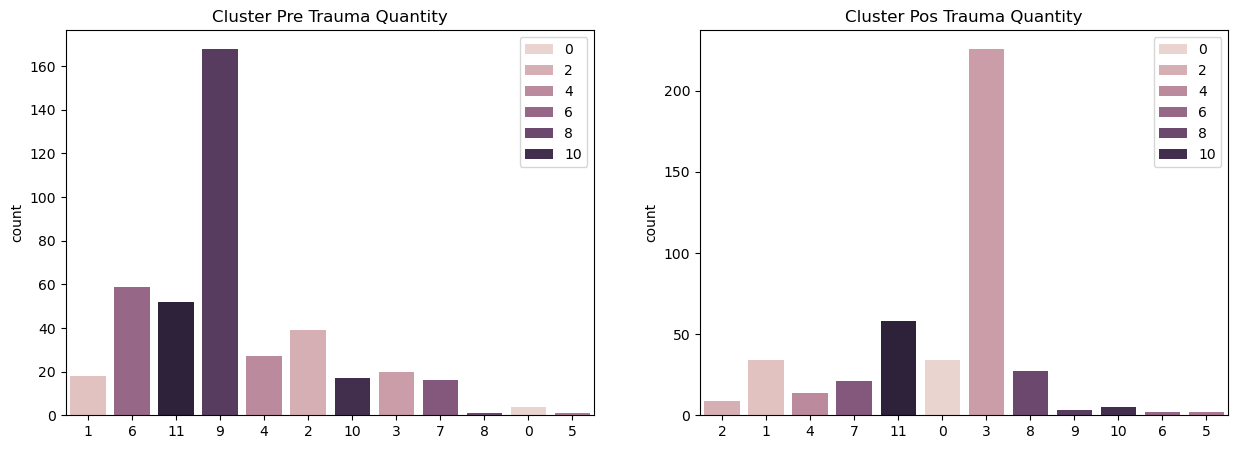

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Create a countplot of the cluster assignments
sns.countplot(x=APrelabels,order=APrelabels,hue=APrelabels ,ax=ax[0])
sns.countplot(x=APoslabels,order=APoslabels,hue=APoslabels ,ax=ax[1])
#for i in range(pd.Series.value_counts(APrelabels)):
    #if i==0:
        #continue
    #else:
        #ax[0].text(i, APrelabels[i], str(APrelabels[i]), ha='center', va='bottom')
#for i in range(len(pd.Series.value_counts(APoslabels))):
    #if i==0:
        #continue
    #else:
        #ax[1].text(i, APoslabels[i], str(APoslabels[i]), ha='center', va='bottom')

# Amplify the resolution of the smaller bars
ax[0].set_title("Cluster Pre Trauma Quantity")
ax[1].set_title("Cluster Pos Trauma Quantity")
ax[0].set_ylim(0, max(ax[0].get_ylim())*1)  # Amplify the y-axis limit of the first plot
ax[1].set_ylim(0, max(ax[1].get_ylim())*1 )  # Amplify the y-axis limit of the second plot

#Cluster_Quantity.svg",format="svg
#plt.savefig(f"F:/IC/CAIMANDATA/Cluster_Quantity1.svg",format="svg")

In [ ]:
import matplotlib.pyplot as plt

# Define the data for the bar plot
x = ['A', 'B', 'C', 'D']
y = [10, 15, 7, 12]

# Create the bar plot
plt.bar(x, y)

# Add labels on top of each bar
for i in range(len(x)):
    plt.text(i, y[i], str(y[i]), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Quantity')
plt.title('Bar Plot with Quantity on Top')

# Display the plot
plt.show()

In [ ]:
%matplotlib Qt
idx = widgets.IntText(value=0,min=0,max=11, description='Cluster :')
def update_frequency(change):
    selector = int(change['new'])  # Convert the value to an integer
    fig, ax = plt.subplots(len(Pre_C[selector]), 1, figsize=(15, 15), constrained_layout=True)
    for i, neuron in enumerate(Pre_C[selector]):
        ax[i].plot(np.linspace(0, 12, len(Pre_Trace[neuron][963::10])), Pre_Trace[neuron][963::10])
        ax[i].set_title(f'Neuron = {neuron}')
        ax[i].set_xticks(np.arange(0, 12, 0.5))
        ax[i].set_xticklabels(protocol)
        for j in range(0, 24, 1):
            if j % 2 == 0:
                ax[i].axvspan(j/2, (j/2)+0.5, facecolor='#9999', alpha=0.5)
    plt.show()
idx.observe(update_frequency, 'value')
display(idx)



### Showing only the good

In [ ]:

for i in range(len(Pre_C)):
    result1 =[idx for idx in Pre_C[i] if idx in Pre_idx]
    result2 =[idx for idx in Pos_C[i] if idx in Pos_idx]
    print(f'Pre Cluster{i} Good idx in {result1}\nPos Cluster{i} Good idx in {result2}\n\n')

Pre Cluster0 Good idx in [156, 231, 358, 404]
Pos Cluster0 Good idx in [16, 18, 21, 47, 48, 59, 63, 132, 218, 236, 344]


Pre Cluster1 Good idx in [0, 4, 5, 7, 9, 344, 401, 406, 408, 414]
Pos Cluster1 Good idx in [281, 282, 283, 284, 286, 287, 289, 290, 299, 374, 396, 407, 413, 415]


Pre Cluster2 Good idx in [22, 31, 40, 74, 77, 85, 92, 112, 113, 124, 127, 131, 160, 163, 185, 246, 265, 270, 271, 297, 347, 352, 357, 372]
Pos Cluster2 Good idx in [301, 303, 405, 411, 412, 416]


Pre Cluster3 Good idx in [255]
Pos Cluster3 Good idx in [17, 19, 20, 24, 25, 27, 28, 30, 31, 35, 36, 41, 42, 43, 44, 46, 49, 51, 53, 57, 67, 76, 78, 88, 91, 93, 94, 97, 99, 108, 111, 116, 122, 123, 131, 134, 138, 144, 145, 147, 148, 163, 169, 170, 171, 172, 174, 175, 176, 177, 179, 180, 181, 185, 187, 189, 190, 191, 193, 194, 195, 197, 198, 208, 220, 221, 223, 225, 227, 231, 233, 234, 235, 237, 238, 239, 243, 247, 252, 253, 254, 256, 257, 259, 261, 266, 271, 273, 274, 275, 276, 277, 280, 288, 292, 293, 296, 300,

In [ ]:
for i in matches:
    for k,j in enumerate(Pre_C12):
        if i[0] in j:
            #print(i[0])
            print(k)
            print('\n')

    for k,j in enumerate(Pos_C12):
        if i[1] in j:
            #print(i[1])
            print(k)
            #print('\n')


In [ ]:
for i in matches:
    [pair for pair in i if pair in Pre_idx]


In [ ]:
for i in range(len(Pre_C12)):
    print(np.where(np.isin(Pre_C12[i], matches, assume_unique=True)))

In [ ]:
for i in range(len(matches)):
    plt.scatter(Pre_CenterOfMass[matches[i][0]][1],Pre_CenterOfMass[matches[i][0]][0],c='g')
    plt.scatter(Pos_CenterOfMass[matches[i][1]][1],Pos_CenterOfMass[matches[i][1]][0],c='r')
    plt.imshow(PnrPre)

In [ ]:
for i in range(len(Pre_idx)):
    plt.scatter(Pre_CenterOfMass[Pre_idx[i]][1],Pre_CenterOfMass[Pre_idx[i]][0],c='g')
    plt.imshow(PnrPos)

In [ ]:
for i in range(len(Pos_idx)):
    plt.scatter(Pos_CenterOfMass[Pos_idx[i]][1],Pos_CenterOfMass[Pos_idx[i]][0],c='r')
    plt.imshow(PnrPos)

In [ ]:
print(len(Prelabels[Prelabels==3]))

In [ ]:
for i in range(12):

  print(f'Pre cluster number :{i}:{np.where(Prelabels==i)[0]} \n\n')
  print(f'Pos cluster number :{i}:{np.where(Poslabels==i)[0]} \n\n')

In [ ]:
print(len(PosX))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=35)
pca.fit(PreX)
a=np.cumsum(pca.explained_variance_ratio_)
#print(pca.components_)
#print(pca.explained_variance_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
print(a.max())

In [ ]:
pca.fit(PosX)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
a=np.cumsum(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
print(a.max())

In [ ]:
from sklearn.ensemble import IsolationForest
PreXclf = IsolationForest(contamination=0.1)  # Adjust the contamination parameter as needed
PreXclf.fit(PreX)
PreXpredictions = PreXclf.predict(PreX)
PreXoutliers = PreX[PreXpredictions == -1]
print(PreXoutliers[:])

PosXclf = IsolationForest(contamination=0.1)  # Adjust the contamination parameter as needed
PosXclf.fit(PosX)
PosXpredictions = PosXclf.predict(PosX)
PosXoutliers = PosX[PosXpredictions == -1]
print(PosXoutliers[:])



In [ ]:
PrePred=(np.where(PreXpredictions==-1)[0])
PoSpred=(np.where(PosXpredictions==-1)[0])
print(f'{len(PrePred)} Pre Trauma Outliers\n{len(PoSpred)} Pos Trauma Outliers')

In [ ]:
t=np.array([2,'Silence', 10,'Silence', 17,'Silence', 4,'Silence', 12,'Silence', 18,'Silence', 6,'Silence', 14,'Silence',19,'Silence', 8,'Silence', 16,'Silence', 20,'Silence'])
t=t.astype(str)
print(t)

In [ ]:
#print(np.where(predictions==-1)[0])
fig, axs = plt.subplots(len(Pre_Indices4), 1, figsize=(15, 30), constrained_layout=True)
x = np.linspace(0,12,len(Pre_Trace[0][963::7]))

for ax, index in zip(axs.flat,Pre_Indices4):
    ax.set_title(f'ID={index}')
    ax.plot(x, Pre_Trace[index][963::7], lw=0.9)
    ax.set_xticks(np.arange(0,12,0.5))
    ax.set_xlim(0,12)
    ax.set_xlabel('Frequency [Hz]')
    ax.set_xticklabels(protocol)
    ax.set_ylabel('Fluorescence [Au]')
    ax.grid()
    for i in range(0, 24, 1):
        if i % 2 == 0:
            ax.axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
plt.show()
#print(np.where(predictions==-1)[0])

In [ ]:
fig, axs = plt.subplots(len(PoSpred), 1, figsize=(15, 30), constrained_layout=True)
x = np.linspace(0,12,len(Pos_Trace[0][164::10]))
for ax, index in zip(axs.flat,PoSpred):
    ax.set_title(f'ID={index}')
    ax.plot(x, Pos_Trace[index][164::10], lw=0.9)
    ax.set_xticks(np.arange(0,12,0.5))
    ax.set_xlim(0,12)
    ax.set_xlabel('Time [Min]')
    ax.set_ylabel('Fluorescence [Au]')
    ax.grid()

In [ ]:
for index in (PrePred):
  index=int(index)
  if len(globals()[f'idx{index}_coord'][:,0]) <100:
    for k in range(len(globals()[f'idx{index}_coord'][:,0])):
      xa = globals()[f'idx{index}_coord'][k,0]
      ya = globals()[f'idx{index}_coord'][k,1]
      plt.scatter(x=xa, y=ya,s = 0.8, c= 'g' )
for index in (PoSpred):
  index=int(index)
  if len(globals()[f'idx{index}_coord'][:,0]) <100:
    for k in range(len(globals()[f'idx{index}_coord'][:,0])):
      xa = globals()[f'idx{index}_coord'][k,0]
      ya = globals()[f'idx{index}_coord'][k,1]
      plt.scatter(x=xa, y=ya,s = 0.8, c= 'r' )
plt.imshow(PnrPos)
plt.show()

In [ ]:
ch=120
fig, ax = plt.subplots(2 ,1, figsize=(15, 5), constrained_layout=True)
for k in range(len(globals()[f'idx{ch}_coord'][:,0])):
    xa = globals()[f'idx{ch}_coord'][k,0]
    ya = globals()[f'idx{ch}_coord'][k,1]
    ax[0].scatter(x=xa, y=ya,s = 0.8, c= 'r' )
ax[0].imshow(PnrPre)
print(len(globals()[f'idx{ch}_coord'][:,0]))
x = np.linspace(0,12,len(Pre_Trace[0][963::10]))

ax[1].set_title(f'ID={ch}')
ax[1].plot(x, Pre_Trace[ch][963::10], lw=0.9)
ax[1].set_xticks(np.arange(0,12,0.5))
ax[1].set_xlim(0,12)
ax[1].set_xlabel('Time [Min]')
ax[1].set_ylabel('Fluorescence [Au]')
ax[1].grid()


In [ ]:
fig, axs = plt.subplots(len(PrePred), 1, figsize=(15, 30), constrained_layout=True)
x =np.linspace(0,12, len(np.diff(Pre_Trace[13][963::10])))
for ax, index in zip(axs.flat,PrePred):
    ax.set_title(f'ID={index}')
    y = np.diff(Pre_Trace[index][963::10])/len(Pre_Trace[index][963::10])

    ax.plot(x, y, lw=0.9)
    ax.set_xticks(np.arange(0,12,0.5))
    ax.set_xlim(0,12)
    ax.set_xlabel('Time [Min]')
    ax.set_ylabel('Fluorescence [Au]')
    ax.grid()
plt.show()

In [ ]:
fig, axs = plt.subplots(len(PrePred), 1, figsize=(15, 30), constrained_layout=True)
x =np.linspace(0,12, len((Pre_Trace[13][963::10])))
for ax, index in zip(axs.flat,PrePred):
    ax.set_title(f'ID={index}')
    y =(Pre_Trace[index][963::10])

    ax.plot(x, y, lw=0.9)
    ax.set_xticks(np.arange(0,12,0.5))
    ax.set_xlim(0,12)
    ax.set_xlabel('Time [Min]')
    ax.set_ylabel('Fluorescence [Au]')
    ax.grid()
plt.show()

In [ ]:

x =np.linspace(0,12, len(np.diff(Pre_Trace[85][963::10])))
y = np.diff(Pre_Trace[121][963::10])
#print(len(y))
fig,ax=plt.subplots(2,1,figsize=(60, 10))
ax[0].plot(x, (y))
ax[1].plot(np.linspace(0,12, len((Pre_Trace[85][963::10]))), (Pre_Trace[121][963::10]))

# Set grid color to a darker shade of gray'

# Set grid color for both subplots
# Set xticks for both subplots
ax[0].set_xticks(np.arange(0,12,0.5))
ax[1].set_xticks(np.arange(0,12,0.5))
for i in range(0, 24, 1):
    if i % 2 == 0:
        ax[0].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
        ax[1].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# define the function to fit
def func(x, a, b, c):
    return a * x**2 + b * x + c

# create some sample data
x = np.linspace(0, 10, 100)
y = 2 * x**2 + 3 * x + 1 + np.random.normal(scale=0.5, size=len(x))

# fit the function to the data
popt, pcov = curve_fit(func, x, y)

# plot the data and the fitted function
fig, ax = plt.subplots()
ax.plot(x, y, 'b.', label='data')
ax.plot(x, func(x, *popt), 'r-', label='fit')
ax.legend()

# show the plot
plt.show()

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# define the function to fit
def func(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

# create some sample data
x=np.linspace(0,12,len(np.diff(Pre_Trace[index][963::10])))
y =  np.diff(Pre_Trace[index][963::10])

# fit the function to the data
popt, pcov = curve_fit(Vau,y,x)

# plot the data and the fitted function
fig, ax = plt.subplots()
ax.plot(x, y, 'b.', label='data')
ax.plot(x, func(x, *popt), 'r-', label='fit')
ax.legend()

# show the plot
plt.show()

In [ ]:
plt.plot(np.linspace(0,12, len(Vau)), (Vau))

In [ ]:



# Convert the raw traces to a feature matrix
PreX = np.vstack(Pre_Trace)
PosX = np.vstack(Pos_Trace)
# Perform K-means clustering with 11 clusters
Prekmeans = KMeans(n_clusters=12, random_state=0).fit(PreX)
Poskmeans = KMeans(n_clusters=12, random_state=0).fit(PosX)
# Assign each raw trace to a cluster
Prelabels = Prekmeans.predict(PreX)
Poslabels = Poskmeans.predict(PosX)
# Create a matrix where each row corresponds to a raw trace and each column corresponds to a cluster
Precluster_matrix = np.zeros((len(Pre_Trace), 12))
Poscluster_matrix = np.zeros((len(Pos_Trace), 12))
for i in range(len(Pre_Trace)):
    Precluster_matrix[i, Prelabels[i]] = 1
for i in range(len(Pos_Trace)):
    Poscluster_matrix[i, Poslabels[i]] = 1

## Audio Protocol

In [ ]:
%matplotlib inline
import numpy as np
from scipy.signal import butter, filtfilt
import sounddevice as sd


# create a sound stimulation array

centre_frequencies = np.array([[2, 4, 6, 8], [10, 12, 14, 16], [17, 18, 19, 20]]) * 1000  # Center frequencies to be tested
Fs = 48000
band = 500  # Band around the frequency
SFTime = 30  # Sound stimulus duration in seconds
random_seed = 0  # Random seed for reproducibility
np.random.seed(random_seed)

sounds = {}

for ii in range(centre_frequencies.shape[1]):
    for jj in range(centre_frequencies.shape[0]):
        S1 = np.random.randn(Fs * SFTime)
        b, a = butter(4, centre_frequencies[jj][ii] / (Fs/2), btype='low')
        sounds[(ii, jj)] = {'c': filtfilt(b, a, S1)}

# Play sounds

# Play in 4 amplitudes
# You will have to measure the levels with a sound level meter
#amps = [0.25, 0.5, 0.75, 1]
asd=np.array([])
kk=0.6
for ii in range(centre_frequencies.shape[1]):
    for jj in range(centre_frequencies.shape[0]):
        #sd.play((amps[kk] * sounds[(ii, jj)]['c']), Fs)
        Stimuli=np.concatenate((asd,kk* sounds[(ii, jj)]['c']))
        plt.plot(kk * sounds[(ii, jj)]['c'])
        print(f'{len(kk * sounds[(ii, jj)]["c"])}')
        print(f'Freq = {centre_frequencies[jj, ii]}')
        #print(f'{jj}  ')
        plt.show()
        #sd.wait()
            #
#sd.play(Stimuli, Fs)
  # Wait until the sound finishes playing'''

In [ ]:
len(Stimuli)

In [ ]:
print(matches[1][1])

In [ ]:
#print(type(Neuron[0]))
plt.plot(Pre_Trace[Neuron[0]])
plt.show()

In [ ]:
%matplotlib Qt
fig,ax=plt.subplots(2,1)
Neuron = matches[3]
Ttick=np.arange(0,12,0.5)
ax[0].set_xticks(Ttick)#Tickrate X axis
ax[1].set_xticks(Ttick)#Tickrate X axis
ax[0].plot(Pre_Trace[Neuron[0]])
ax[1].plot((Pos_Trace[Neuron[1]]))
ax[0].set_xticklabels(protocol)
ax[0].set_title(f'Neuron index {Neuron[0]}')
ax[1].set_xticklabels(protocol)
ax[1].set_title(f'Neuron index {Neuron[1]}')
for i in range(0, 24, 1):
    if i % 2 == 0:
        ax[0].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
        ax[1].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
plt.subplots_adjust(wspace=1.75,hspace=0.4)
plt.show()

In [ ]:
%matplotlib inline
Neuron = matches[60]
fig,ax=plt.subplots(2,1,figsize=(25, 10))
ax[0].plot(np.linspace(0,12, len((Pre_Trace[Neuron[0]][963::10]))),(Pre_Trace[Neuron[0]][963::10]))
ax[0].set_xticks(np.arange(0,12,0.5))
ax[0].set_xticklabels(protocol)
ax[0].set_title(f'Neuron index {Neuron[0]}')
ax[0].set_ylabel('Df/F')
ax[0].set_xlabel('Frequency [kHz]')
ax[1].plot(np.linspace(0,12, len((Pos_Trace[Neuron[1]][::10]))),(Pos_Trace[Neuron[1]][::10]))
ax[1].set_xticks(np.arange(0,12,0.5))
ax[1].set_xticklabels(protocol)
ax[1].set_title(f'Neuron index {Neuron[1]}')
ax[1].set_ylabel('Df/F')
ax[1].set_xlabel('Frequency [kHz]')
for i in range(0, 24, 1):
    if i % 2 == 0:
        ax[0].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
        ax[1].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)


In [ ]:
idx = widgets.SelectionSlider(options=matches, description='Neuron :')
def update_frequency(change):
    Neuron = int(change['new'])  # Convert the value to an integer
 fig,ax=plt.subplots(2,1)
    ax[0].plot(np.linspace(0,12,len(Pre_Trace[Neuron[0]])),Pre_Trace[[Neuron[0]]])
    ax[1].plot((Pos_Trace[[Neuron[1]]]))

    Ttick=np.arange(0,12,0.5)
    ax[0].set_xticklabels(protocol)
    ax[0].set_xticks(Ttick)#Tickrate X axis
    ax[0].set_title(f'Neuron index {Neuron}')
    ax[1].set_xticklabels(protocol)
    ax[1].set_xticks(Ttick)#Tickrate X axis
    ax[1].set_title(f'Neuron index {Neuron}')
    for i in range(0, 24, 1):
        if i % 2 == 0:
            ax[0].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
            ax[1].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
    plt.subplots_adjust(wspace=1.75,hspace=0.4)
    plt.show()
idx.observe(update_frequency, 'value')
display(idx)

In [ ]:
idx = widgets.SelectionSlider(options=Pre_idx, description='Neuron :')
def update_frequency(change):
    Neuron = int(change['new'])  # Convert the value to an integer
    fig,ax=plt.subplots(2,1)
    ax[0].plot(Pre_Trace[Pre_idx[Neuron]])
    ax[1].plot(np.diff(Pre_Trace[Pre_idx[Neuron]]))

    Ttick=np.arange(0,12,0.5)
    ax[0].set_xticklabels(protocol)
    ax[0].set_xticks(Ttick)#Tickrate X axis
    ax[0].set_title(f'Neuron index {Neuron}')
    ax[1].set_xticklabels(protocol)
    ax[1].set_xticks(Ttick)#Tickrate X axis
    ax[1].set_title(f'Neuron index {Neuron}')
    for i in range(0, 24, 1):
        if i % 2 == 0:
            ax[0].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
            ax[1].axvspan(i/2, (i/2)+0.5, facecolor='#9999', alpha=0.5)
    plt.subplots_adjust(wspace=1.75,hspace=0.4)
    plt.show()
idx.observe(update_frequency, 'value')
display(idx)

In [ ]:

Fs=48000
# Compute the spectrogram
spectrogram = librosa.feature.melspectrogram(y=np.diff(Pre_Trace[Pre_idx[26]]), sr=Fs)

# Convert to dB scale
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Display the spectrogram
plt.figure(figsize=(10, 4))
print(spectrogram[0])
librosa.display.specshow(spectrogram_db, sr=14000, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()
fig,ax=plt.subplots(1,1,figsize=(15, 10))
ax.plot(np.diff(Pre_Trace[Pre_idx[26]]))
plt.show()

In [ ]:
"""
Cell generated by Data Wrangler.
"""


In [ ]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(Astd_df_clean):
    # Filter rows based on column: 1
    Astd_df_clean = Astd_df_clean[Astd_df_clean[1] < 1]
    return Astd_df_clean

Astd_df_clean_1 = clean_data(Astd_df_clean.copy())
Astd_df_clean_1.head()